
# Academia Model Fitness
    

<b>
OBJETIVO: DESENVOLVER UMA ESTRATÉGIA DE RETENÇÃO DE CLIENTES <b>

1 - Você deve:

   - Aprender a predizer a probabilidade de rotatividade (para o mês seguinte) para cada cliente
   - Elabore retratos de usuários típicos: selecione os grupos mais marcantes e descreva suas principais características
   - Analise os fatores que mais impactam a rotatividade
   - Tire conclusões básicas e desenvolva recomendações sobre como melhorar o serviço de clientes:
   - Identifique grupos alvo
   - Sugira medidas para diminuir a rotatividade
   - Descreva qualquer outro padrão que você vir com respeito às interações com clientes


2 - O conjunto de dados inclui os seguintes campos:

 - 'Churn' — a rotatividade do mês em questão
 - Campos de dados atuais:
    - Dados do mês anterior
        - 'gender'
        - 'Near_Location' — se o cliente morar ou trabalhar na vizinhança onde a academia está localizada
        - 'Partner' — se o usuário for um funcionário de uma companhia parceira (a academia tem empresas parceiras cujos funcionários conseguem descontos; nesses casos, a academia armazena informações sobre clientes de são funcionários)
        - Promo_friends — se o cliente originalmente se inscreveu através de uma oferta "traga um amigo" eles normalmente usam o código de promoção do amigo quando pagam pela primeira filiação)
        - 'Phone' — se o usuário fornece o seu número de telefone
        - 'age' (idade)
        - 'Lifetime' — o tempo (em meses) desde a primeira vez que o cliente veio à academia


- Dados do log de frequência e compras e dados sobre status de filiação atual
    - 'Contract_period' — 1 mês, 3 meses, 6 meses, ou um ano
    - 'Month_to_end_contract' — os meses remanescentes até que o contrato expira
    - 'Group_visits' — se o cliente participa de sessões em grupo
    - 'Avg_class_frequency_total' — frequência média de idas por semana por toda a vida do cliente
    - 'Avg_class_frequency_current_month' — frequência média de visitas por semana durante o mês corrente
    - 'Avg_additional_charges_total' — a quantidade total de dinheiro gasto em outros serviços da academia: café, artigos esportivos, cosméticos, massagem, etc.
    
3 - Caminho do arquivo: /datasets/gym_churn_us.csv

4 - Assumindo que:

   - Gender: 0 - F / 1 - M
   - Near_Location: 0 - usuário NÃO mora próximo à academia / 1 - usuário mora próximo à academia
   - Partner: 0 - usuário NÃO é funcionário de uma companhia parceira / 1 - usuário é funcionário de uma companhia parceira
   - Promo_friends: 0 - usuário NÃO se inscreveu através de uma oferta "traga um amigo" / 1 - usuário se inscreveu através de uma oferta "traga um amigo"
   - Phone: 0 - usuário NÃO forneceu telefone / 1 - usuário forneceu telefone
   - Group_visits: usuário NÃO participa de sessões em grupo / 1 - usuário participa de sessões em grupo
   - churn: 0 - usuário que NÃO cancelou o plano / 1 - usuário que cancelou o plano

   ##   Início

### Carregando as bibliotecas e base de dados

In [1]:
#Importando as bibliotecas
import pandas as pd
import seaborn as sns

sns.set_style("darkgrid", {"axes.facecolor": ".9"})
import matplotlib.pyplot as plt
from matplotlib import pylab
import numpy as np
from scipy import stats as st
import math as mt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,confusion_matrix,classification_report, roc_auc_score
from sklearn import metrics
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
from sklearn import tree
from sklearn.decomposition import PCA

In [2]:
#Carregando base de dados
gym = pd.read_csv("/datasets/gym_churn_us.csv")

In [3]:
gym

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,1,1,1,0,1,12,0,33,2.406023,12.0,8,2.284497,2.349070,0
3996,0,1,0,0,1,1,1,29,68.883764,1.0,1,1.277168,0.292859,1
3997,1,1,1,1,1,12,0,28,78.250542,11.0,2,2.786146,2.831439,0
3998,0,1,1,1,1,6,0,32,61.912657,5.0,3,1.630108,1.596237,0


## Explorando os dados

In [4]:
gym.head()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0


In [5]:
gym.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   Near_Location                      4000 non-null   int64  
 2   Partner                            4000 non-null   int64  
 3   Promo_friends                      4000 non-null   int64  
 4   Phone                              4000 non-null   int64  
 5   Contract_period                    4000 non-null   int64  
 6   Group_visits                       4000 non-null   int64  
 7   Age                                4000 non-null   int64  
 8   Avg_additional_charges_total       4000 non-null   float64
 9   Month_to_end_contract              4000 non-null   float64
 10  Lifetime                           4000 non-null   int64  
 11  Avg_class_frequency_total          4000 non-null   float

In [6]:
gym.describe().T

,count,mean,std,min,25%,50%,75%,max
gender,4000.0,0.510250,0.499957,0.000000,0.000000,1.000000,1.000000,1.000000
Near_Location,4000.0,0.845250,0.361711,0.000000,1.000000,1.000000,1.000000,1.000000
Partner,4000.0,0.486750,0.499887,0.000000,0.000000,0.000000,1.000000,1.000000
Promo_friends,4000.0,0.308500,0.461932,0.000000,0.000000,0.000000,1.000000,1.000000
Phone,4000.0,0.903500,0.295313,0.000000,1.000000,1.000000,1.000000,1.000000
Contract_period,4000.0,4.681250,4.549706,1.000000,1.000000,1.000000,6.000000,12.000000
Group_visits,4000.0,0.412250,0.492301,0.000000,0.000000,0.000000,1.000000,1.000000
Age,4000.0,29.184250,3.258367,18.000000,27.000000,29.000000,31.000000,41.000000
Avg_additional_charges_total,4000.0,146.943728,96.355602,0.148205,68.868830,136.220159,210.949625,552.590740
Month_to_end_contract,4000.0,4.322750,4.191297,1.000000,1.000000,1.000000,6.000000,12.000000


In [7]:
gym.isna().sum()

gender                               0
Near_Location                        0
Partner                              0
Promo_friends                        0
Phone                                0
Contract_period                      0
Group_visits                         0
Age                                  0
Avg_additional_charges_total         0
Month_to_end_contract                0
Lifetime                             0
Avg_class_frequency_total            0
Avg_class_frequency_current_month    0
Churn                                0
dtype: int64

In [8]:
#Renomeando e reorganizando as colunas
gym.rename(columns={'Near_Location':'near_location','Partner':'partner','Promo_friends':'promo_friends','Phone':'phone','Contract_period':'contract_period','Group_visits':'group_visits','Age':'age','Avg_additional_charges_total':'avg_additional_charges_total','Month_to_end_contract':'month_to_end_contract','Lifetime':'lifetime','Avg_class_frequency_total':'avg_class_freq_total','Avg_class_frequency_current_month':'avg_class_freq_current_month','Churn':'churn'}, inplace=True)
gym[['age','gender','near_location','partner','promo_friends','phone','group_visits','contract_period','month_to_end_contract','lifetime','avg_additional_charges_total','avg_class_freq_current_month','avg_class_freq_total','churn']]

,age,gender,near_location,partner,promo_friends,phone,group_visits,contract_period,month_to_end_contract,lifetime,avg_additional_charges_total,avg_class_freq_current_month,avg_class_freq_total,churn
0,29,1,1,1,1,0,1,6,5.0,3,14.227470,0.000000,0.020398,0
1,31,0,1,0,0,1,1,12,12.0,7,113.202938,1.910244,1.922936,0
2,28,0,1,1,0,1,0,1,1.0,2,129.448479,1.736502,1.859098,0
3,33,0,1,1,1,1,1,12,12.0,2,62.669863,3.357215,3.205633,0
4,26,1,1,1,1,1,0,1,1.0,3,198.362265,1.120078,1.113884,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,33,1,1,1,0,1,0,12,12.0,8,2.406023,2.349070,2.284497,0
3996,29,0,1,0,0,1,1,1,1.0,1,68.883764,0.292859,1.277168,1
3997,28,1,1,1,1,1,0,12,11.0,2,78.250542,2.831439,2.786146,0
3998,32,0,1,1,1,1,0,6,5.0,3,61.912657,1.596237,1.630108,0


In [9]:
gym[gym['churn'] == 1]

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_freq_total,avg_class_freq_current_month,churn
7,0,1,0,0,1,1,0,30,217.786641,1.0,0,1.213502,1.049387,1
11,1,1,1,0,1,1,0,27,266.783824,1.0,2,2.348535,1.584316,1
13,1,1,0,0,1,1,1,27,152.748668,1.0,1,0.000000,0.000000,1
21,0,0,0,0,1,1,0,30,153.198594,1.0,3,0.636382,0.000000,1
23,1,1,0,0,1,1,1,32,276.079882,1.0,1,1.420637,1.043101,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3982,1,1,0,0,1,1,0,24,135.395712,1.0,0,1.390251,0.789321,1
3984,1,1,0,0,1,6,1,22,101.107544,6.0,2,1.377860,0.343915,1
3986,0,1,1,1,1,1,1,34,226.804845,1.0,0,1.399529,0.304130,1
3994,1,1,0,0,1,1,0,26,31.066721,1.0,1,1.157451,0.269597,1


In [10]:
#Verificando linhas duplicadas
gym.duplicated().sum()

0

Como visto acima, não há valores duplicados no conjunto de dados. Porém, conforme mencionado, esse conjunto de dados é de 1 mês completo e também não há um ID de identificão para cada cliente para que se possa atestar que realmente não há duplicados. Por isso, irá se pressupor que não há duplicados.

### Verificando os Cancelamentos (coluna 'churn')

In [11]:
print(gym['churn'].value_counts())
(gym['churn'].value_counts() / gym.shape[0])*100

0    2939
1    1061
Name: churn, dtype: int64


0    73.475
1    26.525
Name: churn, dtype: float64

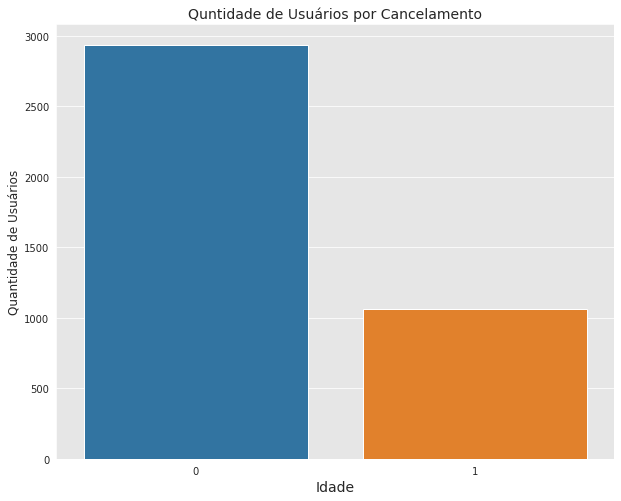

In [12]:
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.countplot(data = gym,x='churn')

ax.set_ylabel('Quantidade de Usuários', fontsize=12)
ax.set_xlabel('Idade', fontsize=14)
ax.set_title('Quntidade de Usuários por Cancelamento', fontsize=14)

plt.show()

Como verificado acima, na coluna 'churn' do conjunto de dados há cerca de 65% mais valores com 'churn' = 0 (usuários que não cancelaram) do que 'churn' = 1 (usuários que cancelaram). Ainda não é possivel atestar se essa diferença impactará na predição dos modelos.

### Gênero Dos Usuários

In [13]:
#Criando um novo dataframe com colunas selecionadas
gym_gender = gym[['gender','churn','age']]

In [14]:
#Criando uma nova coluna com a informação do sxo feminino
gym_gender['gender_f'] = (~gym_gender['gender'].astype(bool)).astype(int)
gym_gender = gym_gender.rename(columns={'gender':'gender_m'}).iloc[:,[0,3,1,2]]

/tmp/ipykernel_73/713353254.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gym_gender['gender_f'] = (~gym_gender['gender'].astype(bool)).astype(int)


In [15]:

gym_gender

,gender_m,gender_f,churn,age
0,1,0,0,29
1,0,1,0,31
2,0,1,0,28
3,0,1,0,33
4,1,0,0,26
...,...,...,...,...
3995,1,0,0,33
3996,0,1,1,29
3997,1,0,0,28
3998,0,1,0,32


In [16]:
#Verificando os usuários por gênero
gym_gender.groupby(['gender_m','gender_f'])['churn'].count()

gender_m  gender_f
0         1           1959
1         0           2041
Name: churn, dtype: int64

In [17]:
#Proporção dos gêneros
(gym_gender['gender_m'].value_counts() / gym.shape[0])*100

1    51.025
0    48.975
Name: gender_m, dtype: float64

Pelas tabelas e gráficos pltados acima, nota-se uma certa equilíbrio entre as quantidade de usuários masculino e feminino, apenas 3% de diferença de vantagem para os usuários do sexo masculino.

#### Separando por gênero Masculino

In [18]:
gym_gender[(gym_gender['gender_m']) == 1].count()

gender_m    2041
gender_f    2041
churn       2041
age         2041
dtype: int64

In [19]:
gym_gender_m = gym_gender[(gym_gender['gender_m']) == 1].groupby(['age','churn'])['gender_m'].count().reset_index()
gym_gender_m.head()

,age,churn,gender_m
0,19,0,1
1,20,0,3
2,20,1,4
3,21,0,5
4,21,1,8


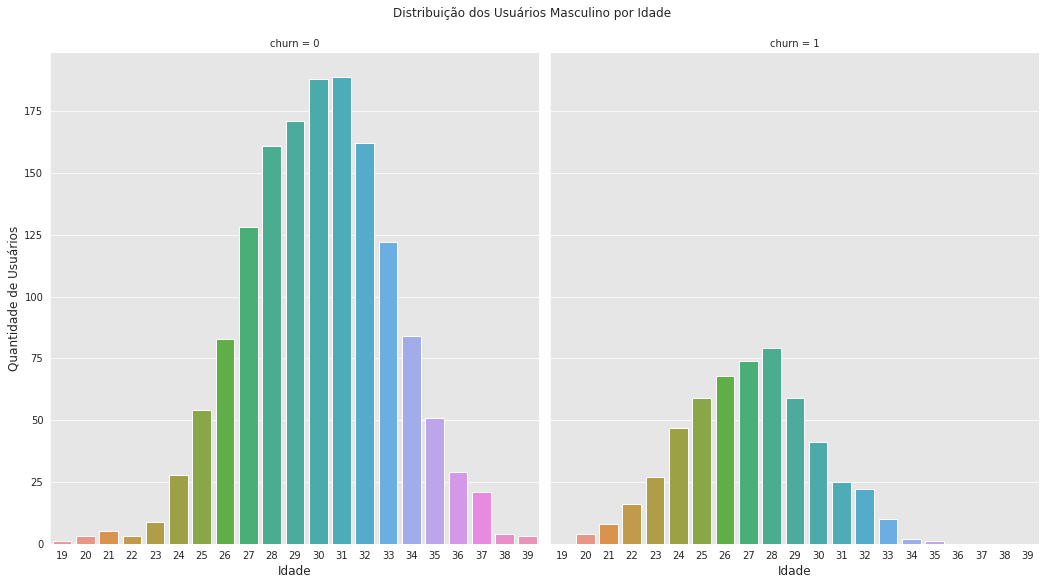

In [20]:
#Filtrando por gênero e agrupando por idade e Churn
gym_gender_m = gym_gender[(gym_gender['gender_m']) == 1].groupby(['age','churn'])['gender_m'].count().reset_index()

a = sns.catplot(data=gym_gender_m, x="age", y="gender_m", col="churn",kind="bar", height=8, aspect=.9)
a.set_ylabels('Quantidade de Usuários', fontsize=12)
a.set_xlabels('Idade', fontsize=12)
a.fig.subplots_adjust(top=0.9) # adjust the Figure in rp
a.fig.suptitle('Distribuição dos Usuários Masculino por Idade')
plt.show()

No gráfico acima, plotado com os dados somente dos usuários masculino, nota-se a distribuição das idades dos mesmos: considerando 'churn' = 0, nota-se que mais de 42% dos usuários estão na faixa dos 28 a 32 anos. Já considerando o 'churn' = 1 (cancelamento), a faixa de idade onde há a maior concentração é na faixa dos 25 a 29 anos. Nos usuários masculino, a idade com maior número de cancelamentos é 28 anos.

#### Separando por gênero Feminino 

In [21]:
gym_gender[(gym_gender['gender_f']) == 1].count()

gender_m    1959
gender_f    1959
churn       1959
age         1959
dtype: int64

In [22]:
#Filtrando por gênero feminino e agrupando por idade
gym_gender_f = gym_gender[(gym_gender['gender_f']) == 1].groupby(['age','churn'])['gender_f'].count().reset_index()
gym_gender_f.head()

,age,churn,gender_f
0,18,1,2
1,19,1,1
2,20,1,7
3,21,1,11
4,22,0,4


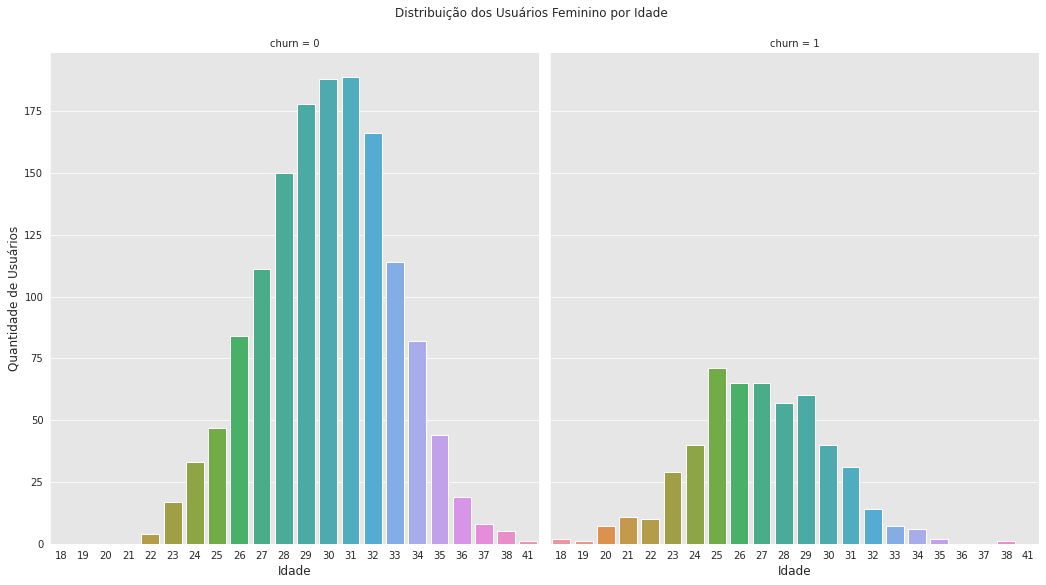

In [23]:
#Filtrando por gênero e agrupando por idade e Churn
gym_gender_f = gym_gender[(gym_gender['gender_f']) == 1].groupby(['age','churn'])['gender_f'].count().reset_index()
b = sns.catplot(data=gym_gender_f, x="age", y="gender_f", col="churn",kind="bar", height=8, aspect=.9)
b.set_ylabels('Quantidade de Usuários', fontsize=12)
b.set_xlabels('Idade', fontsize=12)
b.fig.subplots_adjust(top=0.9) # adjust the Figure in rp
b.fig.suptitle('Distribuição dos Usuários Feminino por Idade')

plt.show()

No gráfico acima, plotado com os dados somente dos usuários feminino, nota-se a distribuição das idades dos mesmos: considerando 'churn' = 0, nota-se que mais de 45% dos usuários estão na faixa dos 28 a 32 anos. Já considerando o 'churn' = 1 (cancelamento), a faixa de idade onde há a maior concentração é na faixa dos 25 a 29 anos. Diferente dos usuários masculino, a idade com maior número de cancelamento é 25 anos.

### Usuários e Localidade

In [24]:
gym_gender.head()

,gender_m,gender_f,churn,age
0,1,0,0,29
1,0,1,0,31
2,0,1,0,28
3,0,1,0,33
4,1,0,0,26


In [25]:
#Criando uma cópia do dataframe
gym_gender_loc = gym_gender

In [26]:
#Inserindo a coluna de localidade no dataframe criado
gym_gender_loc['near_location'] = gym[['near_location']]
gym_gender_loc

,gender_m,gender_f,churn,age,near_location
0,1,0,0,29,1
1,0,1,0,31,1
2,0,1,0,28,1
3,0,1,0,33,1
4,1,0,0,26,1
...,...,...,...,...,...
3995,1,0,0,33,1
3996,0,1,1,29,1
3997,1,0,0,28,1
3998,0,1,0,32,1


In [27]:
#Verificando a quantidade os usuários por gênero e localidade
gym_gender_loc.groupby(['gender_m','gender_f','near_location'])['churn'].count()

gender_m  gender_f  near_location
0         1         0                 308
                    1                1651
1         0         0                 311
                    1                1730
Name: churn, dtype: int64

In [28]:
#Proporção dos usuários por gênero e localidade
(gym_gender_loc.groupby(['gender_m','churn','near_location'])['gender_m'].count() / gym.shape[0])*100 

gender_m  churn  near_location
0         0      0                 4.625
                 1                31.375
          1      0                 3.075
                 1                 9.900
1         0      0                 4.700
                 1                32.775
          1      0                 3.075
                 1                10.475
Name: gender_m, dtype: float64

In [29]:
#Proporção dos usuários com localidade próxima
(gym_gender_loc['near_location'].value_counts() / gym.shape[0])*100

1    84.525
0    15.475
Name: near_location, dtype: float64

Pelos gráficos e tabelas acima, verifica-se a distribuição dos usuários com localidade próxima à academia, onde nota-se que quase 85% de todos os usuários residem próximos à academia. Entre os usuários feminino e masculino, a proporção ainda permanece, com valores bem próximos de ambos.

#### Visão geral

In [30]:
gym_gender_loc

,gender_m,gender_f,churn,age,near_location
0,1,0,0,29,1
1,0,1,0,31,1
2,0,1,0,28,1
3,0,1,0,33,1
4,1,0,0,26,1
...,...,...,...,...,...
3995,1,0,0,33,1
3996,0,1,1,29,1
3997,1,0,0,28,1
3998,0,1,0,32,1


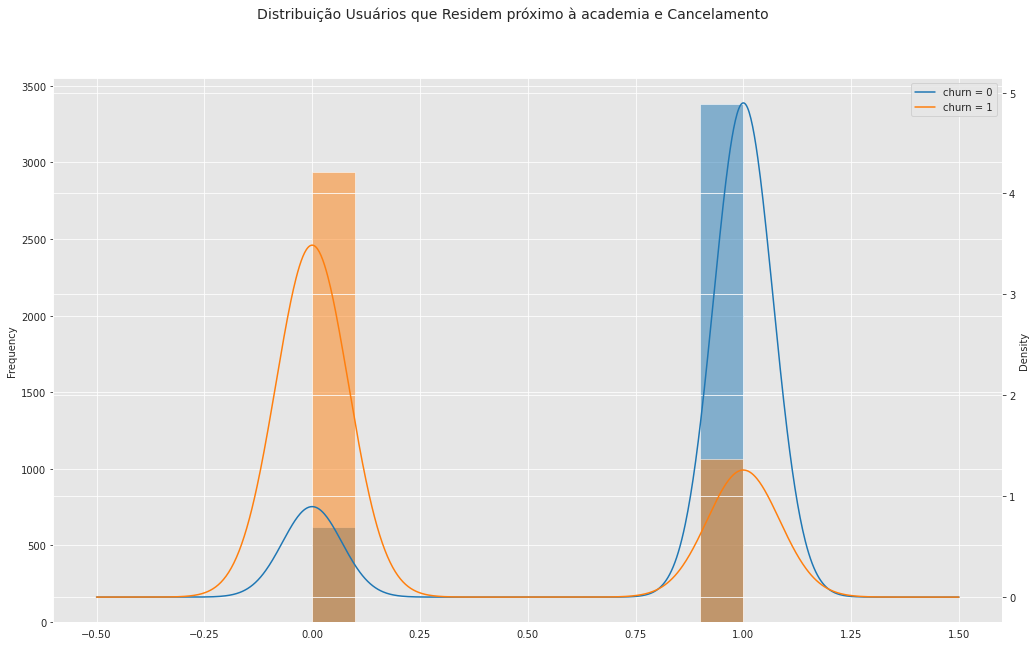

In [31]:
#Plotando as informações 'near_location'
gym_loc = gym_gender_loc.copy(deep=True)
gym_loc = gym_loc.filter(['near_location','churn'])

fig, ax = plt.subplots(figsize=(17,10))
gym_loc.plot.hist(ax=ax, alpha=0.5,legend=False)
ax2 = ax.twinx()
gym_loc.plot.kde(ax=ax2, legend=False)
plt.legend(["churn = 0", "churn = 1"], loc ="upper right")
plt.suptitle('Distribuição Usuários que Residem próximo à academia e Cancelamento', fontsize=14)
plt.show()

Acima verifica-se os dados plotados entre as informações 'near_location' e 'churn' onde nota-se  distribuição entre cancelamentos e usuários que residem próximos à academia. Percebe-se que que o cancelamento é muito maior entre pessoas que residem próximo à academia d que pessoas que residem longe.

#### Separando por Localidade e Gênero Masculino

In [32]:
gym_gender_loc

,gender_m,gender_f,churn,age,near_location
0,1,0,0,29,1
1,0,1,0,31,1
2,0,1,0,28,1
3,0,1,0,33,1
4,1,0,0,26,1
...,...,...,...,...,...
3995,1,0,0,33,1
3996,0,1,1,29,1
3997,1,0,0,28,1
3998,0,1,0,32,1


In [33]:
#Filtrand por gênero
gym_gender_m_loc = gym_gender_loc[gym_gender_loc['gender_m'] == 1]
gym_gender_m_loc.head()

,gender_m,gender_f,churn,age,near_location
0,1,0,0,29,1
4,1,0,0,26,1
5,1,0,0,34,1
6,1,0,0,32,1
8,1,0,0,23,1


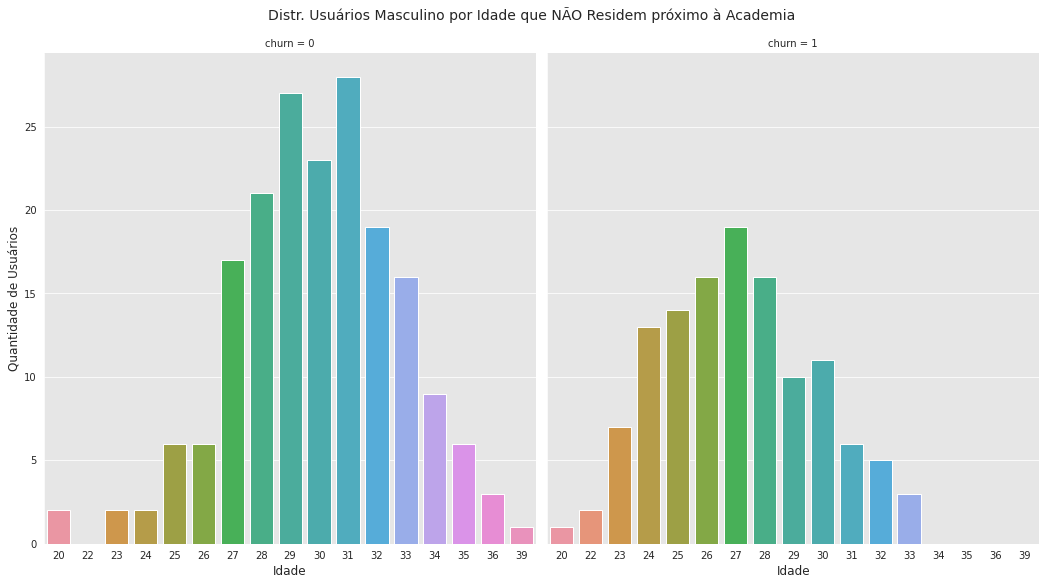

In [34]:
gym_gender_m_loc0 = gym_gender_m_loc[gym_gender_m_loc['near_location'] == 0].groupby(['age','churn'])['near_location'].count().reset_index()

a = sns.catplot(data=gym_gender_m_loc0, x="age", y="near_location", col="churn",kind="bar", height=8, aspect=.9)
a.set_ylabels('Quantidade de Usuários', fontsize=12)
a.set_xlabels('Idade', fontsize=12)
a.fig.subplots_adjust(top=0.9) # adjust the Figure in rp
a.fig.suptitle('Distr. Usuários Masculino por Idade que NÃO Residem próximo à Academia', fontsize=14)
plt.show()

Analisando somente os usuários masculino no gráfico acima para aqueles que NÂO residem próximos à academia, a predominância da faixa dos 28 a 32 anos permanece no 'churn' = 0. Já considerando o 'churn' = 1 (cancelamento), a faixa de idade onde há a maior concentração é na faixa dos 24 a 28 anos. Nos usuários masculino, a idade com maior número de cancelamentos de usuários que residem próximos à academia é 27 anos.

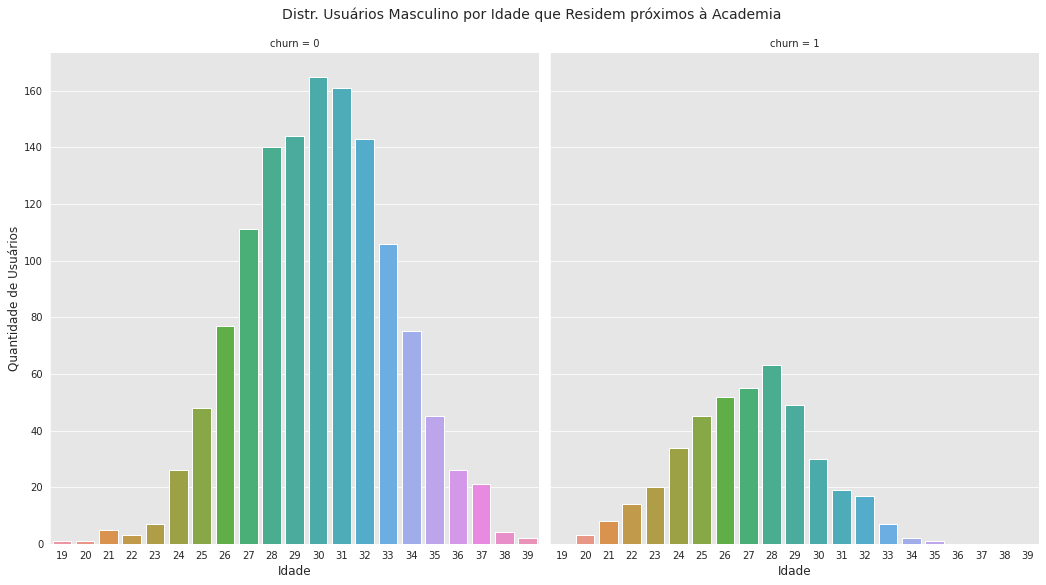

In [35]:
gym_gender_m_loc1 = gym_gender_m_loc[gym_gender_m_loc['near_location'] == 1].groupby(['age','churn'])['near_location'].count().reset_index()

a = sns.catplot(data=gym_gender_m_loc1, x="age", y="near_location", col="churn",kind="bar", height=8, aspect=.9)
a.set_ylabels('Quantidade de Usuários', fontsize=12)
a.set_xlabels('Idade', fontsize=12)
a.fig.subplots_adjust(top=0.9)
a.fig.suptitle('Distr. Usuários Masculino por Idade que Residem próximos à Academia', fontsize=14)
plt.show()

Analisando no gráfico acima somente os usuários masculino que residem próximos à academia, a predominância da faixa dos 28 a 32 anos permanece no 'churn' = 0. Já considerando o 'churn' = 1 (cancelamentos), a faixa de idade onde há a maior concentração é na faixa dos 24 a 29 anos. Nos usuários masculino, a idade com maior número de cancelamentos de usuários que residem próximos à academia é 28 anos.

Percebe-se que a quantidade de cancelamento é proporcionalmente maior entre aqueles usuários que residem próximo à academia, cerca de 7,5% maior comparado aos usuários que NÃO residem próximos à academia.

#### Separando por Localidade e Gênero Feminino

In [36]:
#Filtrando por gênero
gym_gender_f_loc = gym_gender_loc[gym_gender_loc['gender_f'] == 1]
gym_gender_f_loc.head()

,gender_m,gender_f,churn,age,near_location
1,0,1,0,31,1
2,0,1,0,28,1
3,0,1,0,33,1
7,0,1,1,30,1
9,0,1,0,31,1


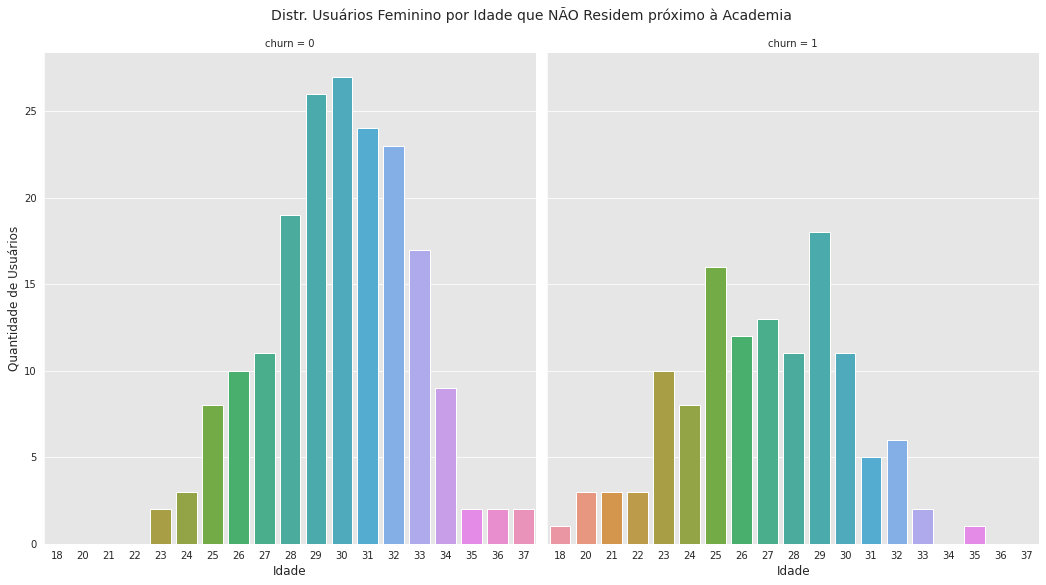

In [37]:

gym_gender_f_loc0 = gym_gender_f_loc[gym_gender_f_loc['near_location'] == 0].groupby(['age','churn'])['near_location'].count().reset_index()

a = sns.catplot(data=gym_gender_f_loc0, x="age", y="near_location", col="churn",kind="bar", height=8, aspect=.9)
a.set_ylabels('Quantidade de Usuários', fontsize=12)
a.set_xlabels('Idade', fontsize=12)
a.fig.subplots_adjust(top=0.9) # adjust the Figure in rp
a.fig.suptitle('Distr. Usuários Feminino por Idade que NÃO Residem próximo à Academia', fontsize=14)
plt.show()

Analisando os usuários feminino no gráfico acima, a predominância da faixa dos 28 a 32 anos permanece no 'churn' = 0. Já considerando o 'churn' = 1 (cancelamento), percebe-se uma diferença grande se comparado aos usuários masculino, onde aqui a  faixa de idade que há a maior concentração é na faixa dos 25 a 30 anos, onde as idades com maior número de cancelamentos de usuários que NÃO residem próximos à academia são 25 e 29 anos.

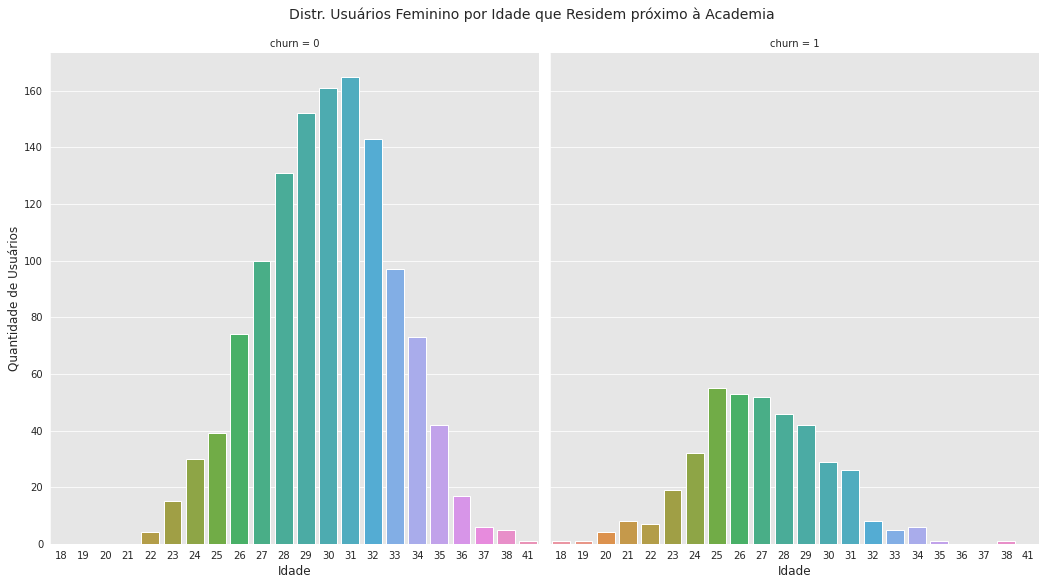

In [38]:
gym_gender_f_loc1 = gym_gender_f_loc[gym_gender_f_loc['near_location'] == 1].groupby(['age','churn'])['near_location'].count().reset_index()

a = sns.catplot(data=gym_gender_f_loc1, x="age", y="near_location", col="churn",kind="bar", height=8, aspect=.9)
a.set_ylabels('Quantidade de Usuários', fontsize=12)
a.set_xlabels('Idade', fontsize=12)
a.fig.subplots_adjust(top=0.9) # adjust the Figure in rp
a.fig.suptitle('Distr. Usuários Feminino por Idade que Residem próximo à Academia', fontsize=14)
plt.show()

No gráfico acima somente os usuários feminino  que residem próximos à academia, a predominância da faixa dos 28 a 32 anos permanece no 'churn' = 0. Já considerando o 'churn' = 1 (cancelamentos), a faixa de idade onde há a maior concentração é na faixa dos 24 a 29 anos. Nos usuários feminino, a idade com maior número de cancelamentos de usuários que residem próximos à academia é 25 anos.

Percebe-se que a quantidade de cancelamento é proporcionalmente maior entre aqueles usuários que NÃO residem próximo à academia, cerca de 7% maior comparado aos usuários que residem próximos à academia.

### Usuários de Companhias Parceiras 

In [39]:
#Criando um novo dataframe
gym_gender.drop(['near_location'], axis=1, inplace=True)
gym_gender_partner = gym_gender

In [40]:
#Copiando a respectiva coluna
gym_gender_partner['partner'] = gym['partner']
gym_gender_partner

,gender_m,gender_f,churn,age,partner
0,1,0,0,29,1
1,0,1,0,31,0
2,0,1,0,28,1
3,0,1,0,33,1
4,1,0,0,26,1
...,...,...,...,...,...
3995,1,0,0,33,1
3996,0,1,1,29,0
3997,1,0,0,28,1
3998,0,1,0,32,1


In [41]:
#Verificando os usuários de companhias parceiros por gênero
gym_gender_partner.groupby(['gender_m','churn','partner'])['gender_m'].count()

gender_m  churn  partner
0         0      0          658
                 1          782
          1      0          337
                 1          182
1         0      0          711
                 1          788
          1      0          347
                 1          195
Name: gender_m, dtype: int64

In [42]:
#Proporção dos usuários de companhias parceiros por gênero
(gym_gender_partner.groupby(['gender_m','churn','partner'])['gender_m'].count() / gym.shape[0])*100

gender_m  churn  partner
0         0      0          16.450
                 1          19.550
          1      0           8.425
                 1           4.550
1         0      0          17.775
                 1          19.700
          1      0           8.675
                 1           4.875
Name: gender_m, dtype: float64

Pelas tabelas acima, verifica-se a distribuição dos usuários que participantes de companhias parceiras, onde nota-se um grande equilíbrio entre usuários masculino e feminino como daqueles que são de companhias parceiras e daqueles que não são.
        
                    MASCULINO    FEMININO   
         PARCEIRO    24.5%         24.1%
     NÃO PARCEIRO    26.4%         24.8%


#### Visão geral

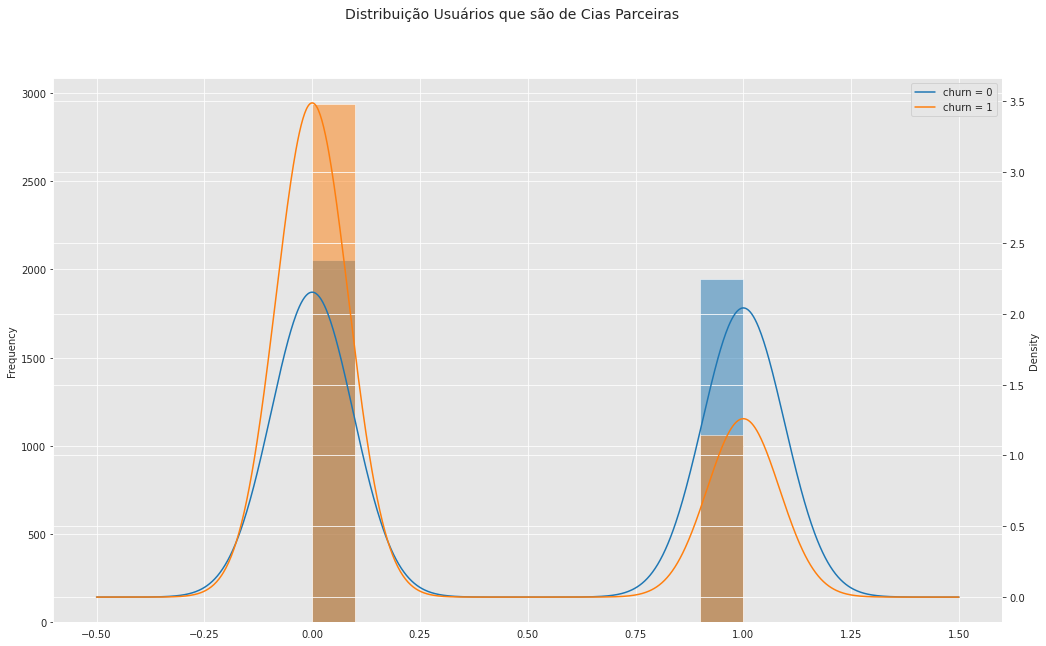

In [43]:
#Plotando as informações 'partner' e 'churn'

gym_partner = gym_gender_partner.copy(deep=True)
gym_partner = gym_partner.filter(['partner','churn'])

fig, ax = plt.subplots(figsize=(17,10))
gym_partner.plot.hist(ax=ax, alpha=0.5,legend=False)
ax2 = ax.twinx()
gym_partner.plot.kde(ax=ax2, legend=False)
plt.legend(["churn = 0", "churn = 1"], loc ="upper right")
plt.suptitle('Distribuição Usuários que são de Cias Parceiras', fontsize=14)
plt.show()

Acima verifica-se os dados plotados entre as informações 'partner' e 'churn' onde nota-se  distribuição entre cancelamentos e usuários que faem parte de companhias parceiras. Percebe-se que que o cancelamento é muito maior entre pessoas que não fazem parte de companhias parceiras do que os usuários que fazem parte.

#### Separando por Companhias Parceiras e Gênero Masculino

In [44]:
#Separando por gênero masculino
gym_gender_m_partner = gym_gender_partner[gym_gender_partner['gender_m'] == 1]
gym_gender_m_partner.head()

,gender_m,gender_f,churn,age,partner
0,1,0,0,29,1
4,1,0,0,26,1
5,1,0,0,34,0
6,1,0,0,32,1
8,1,0,0,23,1


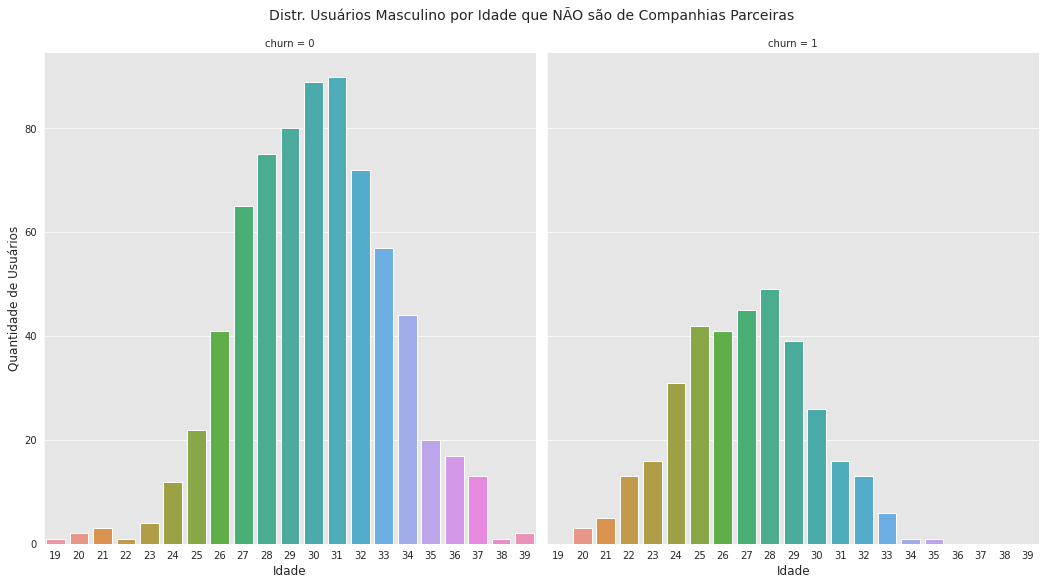

In [45]:

gym_gender_m_partner0 = gym_gender_m_partner[gym_gender_m_partner['partner'] == 0].groupby(['age','churn'])['partner'].count().reset_index()

a = sns.catplot(data=gym_gender_m_partner0, x="age", y="partner", col="churn",kind="bar", height=8, aspect=.9)
a.set_ylabels('Quantidade de Usuários', fontsize=12)
a.set_xlabels('Idade', fontsize=12)
a.fig.subplots_adjust(top=0.9) # adjust the Figure in rp
a.fig.suptitle('Distr. Usuários Masculino por Idade que NÃO são de Companhias Parceiras', fontsize=14)
plt.show()

Analisando somente os usuários masculino no gráfico acima para aqueles que NÂO são de companhias, a predominância da faixa dos 28 a 32 anos permanece no 'churn' = 0. Já considerando o 'churn' = 1 (cancelamento), a faixa de idade onde há a maior concentração é na faixa dos 24 a 29 anos. Nos usuários masculino, a idade com maior número de cancelamentos de usuários que NÃo são de companhias parceiras é 28 anos.


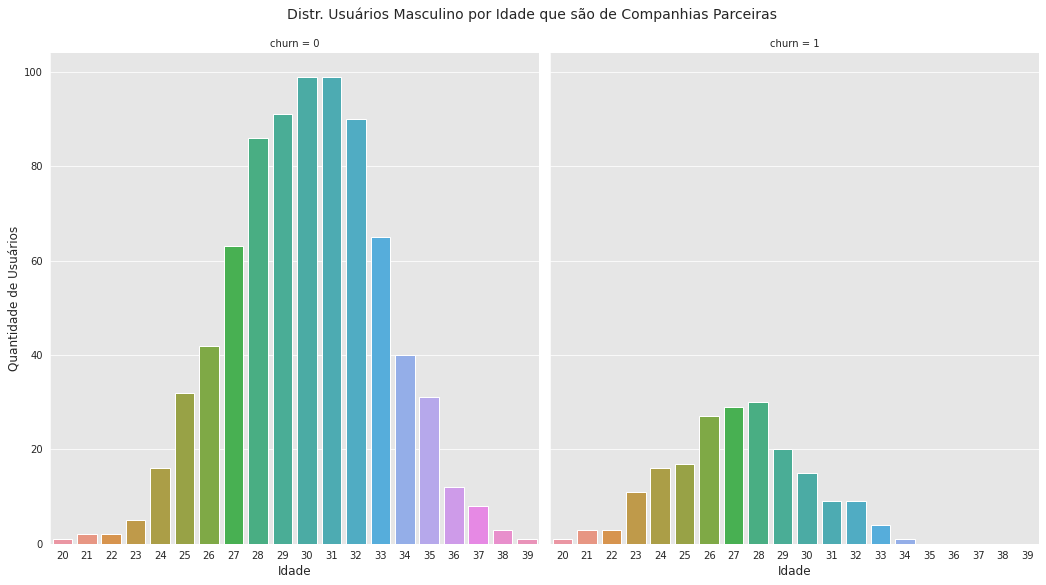

In [46]:

gym_gender_m_partner1 = gym_gender_m_partner[gym_gender_m_partner['partner'] == 1].groupby(['age','churn'])['partner'].count().reset_index()

a = sns.catplot(data=gym_gender_m_partner1, x="age", y="partner", col="churn",kind="bar", height=8, aspect=.9)
a.set_ylabels('Quantidade de Usuários', fontsize=12)
a.set_xlabels('Idade', fontsize=12)
a.fig.subplots_adjust(top=0.9) # adjust the Figure in rp
a.fig.suptitle('Distr. Usuários Masculino por Idade que são de Companhias Parceiras', fontsize=14)
plt.show()

Ainda analisando os usuários masculino no gráfico acima para aqueles que são de companhias, a predominância da faixa dos 28 a 32 anos ainda permanece no 'churn' = 0. Já considerando o 'churn' = 1 (cancelamento), a faixa de idade onde há a maior concentração é na faixa dos 26 a 28 anos. Nos usuários masculino, a idade com maior número de cancelamentos de usuários que são de companhias parceiras é 28 anos.


Percebe-se que a quantidade de cancelamento é proporcionalmente maior entre aqueles usuários que NÃO são de companhias parceiras, cerca de 4% maior comparado aos usuários que fazem parte de companhias parceiras da academia.

#### Separando por Companhias Parceiras e Gênero Feminino

In [47]:
#Separando por gênero feminino
gym_gender_f_partner = gym_gender_partner[gym_gender_partner['gender_f'] == 1]
gym_gender_f_partner

,gender_m,gender_f,churn,age,partner
1,0,1,0,31,0
2,0,1,0,28,1
3,0,1,0,33,1
7,0,1,1,30,0
9,0,1,0,31,0
...,...,...,...,...,...
3989,0,1,0,30,1
3992,0,1,0,31,1
3993,0,1,0,33,1
3996,0,1,1,29,0


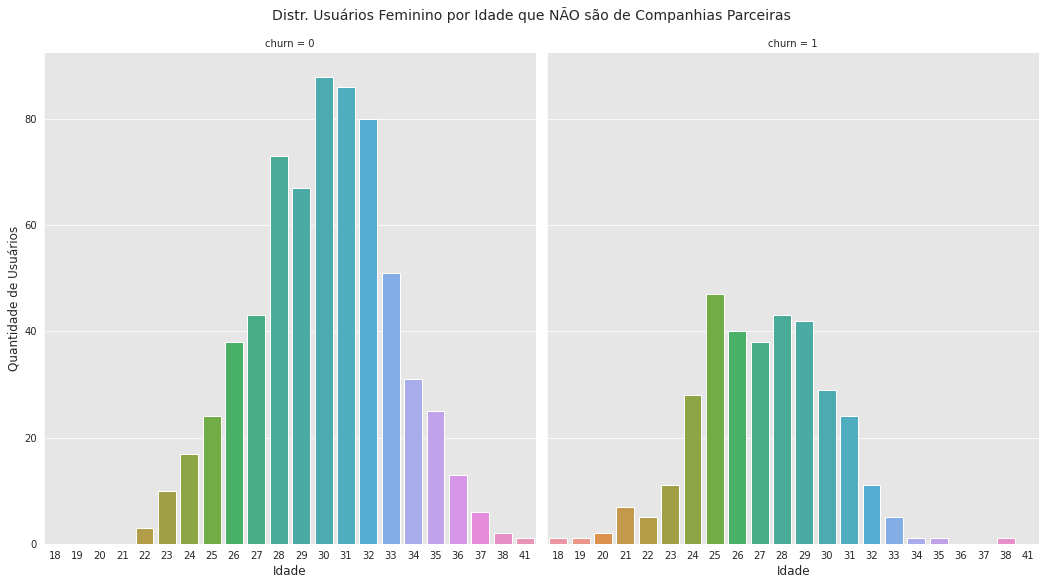

In [48]:
gym_gender_f_partner0 = gym_gender_f_partner[gym_gender_f_partner['partner'] == 0].groupby(['age','churn'])['partner'].count().reset_index()

a = sns.catplot(data=gym_gender_f_partner0, x="age", y="partner", col="churn",kind="bar", height=8, aspect=.9)
a.set_ylabels('Quantidade de Usuários', fontsize=12)
a.set_xlabels('Idade', fontsize=12)
a.fig.subplots_adjust(top=0.9)
a.fig.suptitle('Distr. Usuários Feminino por Idade que NÃO são de Companhias Parceiras', fontsize=14)
plt.show()

Já analisando somente os usuários feminino no gráfico acima para aqueles que NÂO são de companhias, a predominância da faixa dos 28 a 32 anos permanece no 'churn' = 0. Já considerando o 'churn' = 1 (cancelamento), a faixa de idade onde há a maior concentração é na faixa dos 25 a 29 anos. Nos usuários masculino, a idade com maior número de cancelamentos de usuários que NÃO são de companhias parceiras é 25 anos.

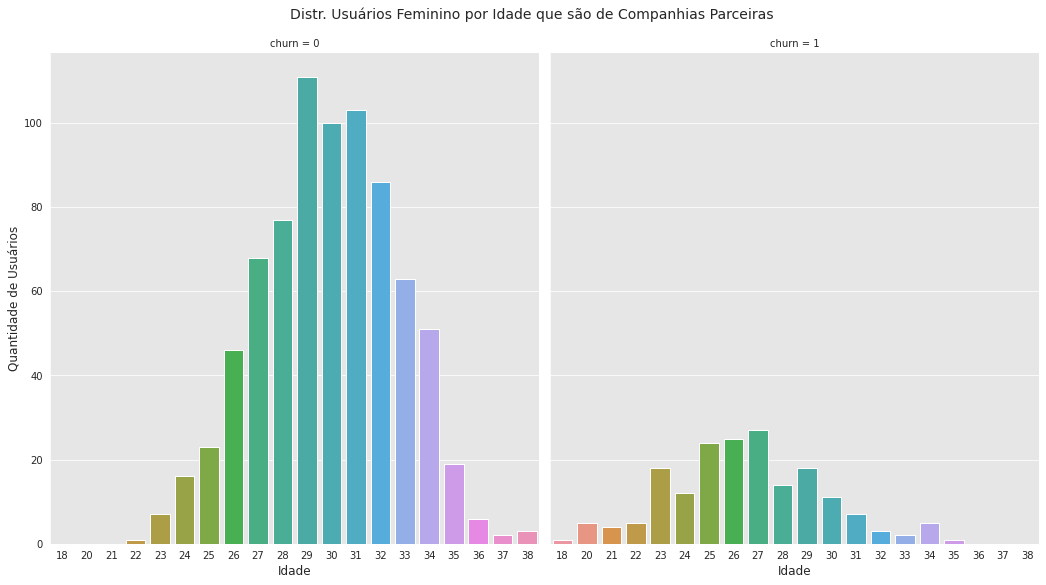

In [49]:
gym_gender_f_partner1 = gym_gender_f_partner[gym_gender_f_partner['partner'] == 1].groupby(['age','churn'])['partner'].count().reset_index()

a = sns.catplot(data=gym_gender_f_partner1, x="age", y="partner", col="churn",kind="bar", height=8, aspect=.9)
a.set_ylabels('Quantidade de Usuários', fontsize=12)
a.set_xlabels('Idade', fontsize=12)
a.fig.subplots_adjust(top=0.9) # adjust the Figure in rp
a.fig.suptitle('Distr. Usuários Feminino por Idade que são de Companhias Parceiras', fontsize=14)
plt.show()

Ainda analisando os usuários feminino no gráfico acima para aqueles que são de companhias, a predominância da faixa dos 29 a 32 anos ainda permanece no 'churn' = 0. Já considerando o 'churn' = 1 (cancelamento), a faixa de idade onde há a maior concentração é na faixa dos 25 a 27 anos. Nos usuários feminino, a idade com maior número de cancelamentos de usuários que são de companhias parceiras é 27 anos.

Percebe-se que a quantidade de cancelamento é proporcionalmente maior entre aqueles usuários que NÃO são de companhias parceiras, cerca de 4% maior comparado aos usuários que fazem parte de companhias parceiras da academia.

### Participante da Promoção do Amigo

In [50]:
gym_gender.drop(['partner'], axis=1, inplace=True)
gym_gender_friend = gym_gender

In [51]:
gym_gender_friend['promo_friends'] = gym['promo_friends']
gym_gender_friend

,gender_m,gender_f,churn,age,promo_friends
0,1,0,0,29,1
1,0,1,0,31,0
2,0,1,0,28,0
3,0,1,0,33,1
4,1,0,0,26,1
...,...,...,...,...,...
3995,1,0,0,33,0
3996,0,1,1,29,0
3997,1,0,0,28,1
3998,0,1,0,32,1


In [52]:
#Verificando os usuários por gênero e promoção do amigo
gym_gender_friend.groupby(['gender_m','gender_f','promo_friends'])['churn'].count()

gender_m  gender_f  promo_friends
0         1         0                1350
                    1                 609
1         0         0                1416
                    1                 625
Name: churn, dtype: int64

In [53]:
#Proporção dos usuários por gênero e promoção do amigo
(gym_gender_friend.groupby(['gender_m','churn','promo_friends'])['gender_m'].count() / gym.shape[0])*100

gender_m  churn  promo_friends
0         0      0                23.225
                 1                12.775
          1      0                10.525
                 1                 2.450
1         0      0                24.275
                 1                13.200
          1      0                11.125
                 1                 2.425
Name: gender_m, dtype: float64

Pelas tabelas acima, verifica-se a distribuição dos usuários que participantes da promoção do Amigo, onde nota-se um grande equilíbrio entre usuários masculino e feminino, porém uma grande diferença entre os participantes da promoção do Amigo e aqueles que não participantes.
        
                              MASCULINO    FEMININO   
         INDICAÇÃO DO AMIGO    15.6%         15.3%
     NÃO INDICAÇÃO DO AMIGO    35.4%         33.7%


#### Visão geral

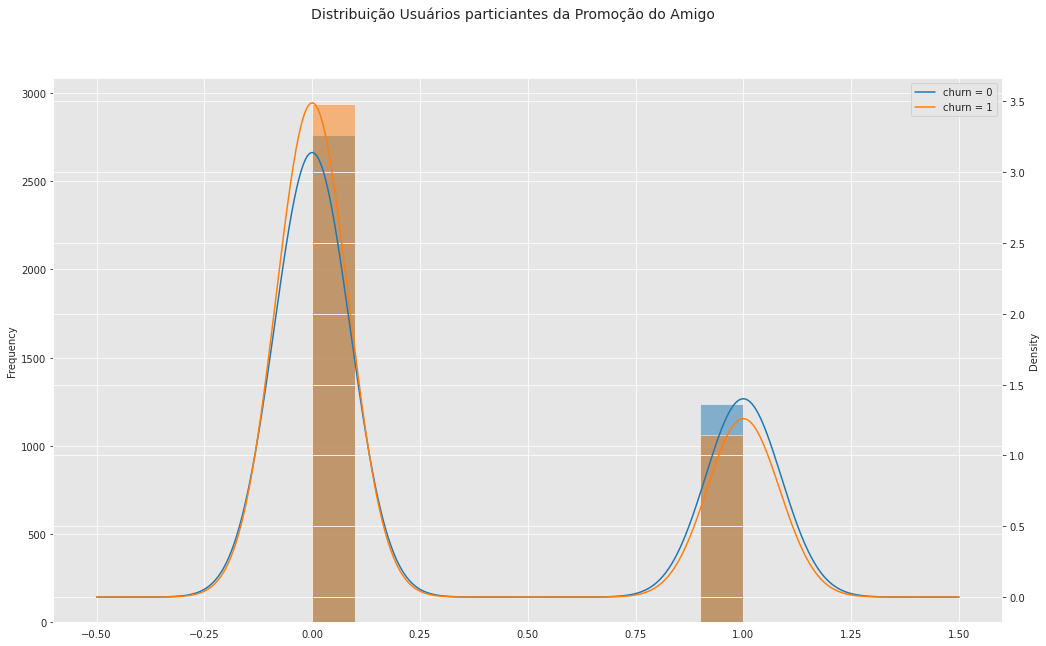

In [54]:
#Plotando as informações 'promo_friend' e 'churn'

gym_friends = gym_gender_friend.copy(deep=True)
gym_friends = gym_friends.filter(['promo_friends','churn'])

fig, ax = plt.subplots(figsize=(17,10))
gym_friends.plot.hist(ax=ax, alpha=0.5,legend=False)
ax2 = ax.twinx()
gym_friends.plot.kde(ax=ax2, legend=False)
plt.legend(["churn = 0", "churn = 1"], loc ="upper right")
plt.suptitle('Distribuição Usuários particiantes da Promoção do Amigo', fontsize=14)
plt.show()

Acima verifica-se os dados plotados entre as informações 'partner' e 'churn' onde nota-se  distribuição entre cancelamentos e usuários que fazem parte da promoção do amigo. Percebe-se que que o cancelamento é muito maior entre pessoas que não fazem parte da promoção do amigo do que os usuários que fazem parte.

#### Separando por Indicação e Gênero Masculino

In [55]:
#Separando por gênero
gym_gender_m_friend = gym_gender_friend[gym_gender_friend['gender_m'] == 1]
gym_gender_m_friend.head()

,gender_m,gender_f,churn,age,promo_friends
0,1,0,0,29,1
4,1,0,0,26,1
5,1,0,0,34,0
6,1,0,0,32,1
8,1,0,0,23,1


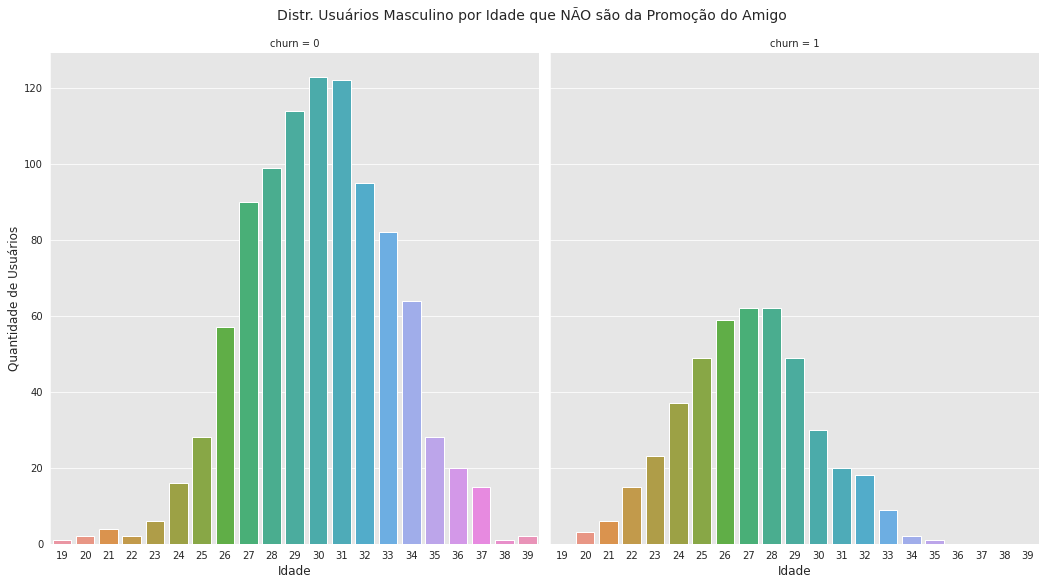

In [56]:

gym_gender_m_friend0 = gym_gender_m_friend[gym_gender_m_friend['promo_friends'] == 0].groupby(['age','churn'])['promo_friends'].count().reset_index()

a = sns.catplot(data=gym_gender_m_friend0, x="age", y="promo_friends", col="churn",kind="bar", height=8, aspect=.9)
a.set_ylabels('Quantidade de Usuários', fontsize=12)
a.set_xlabels('Idade', fontsize=12)
a.fig.subplots_adjust(top=0.9)
a.fig.suptitle('Distr. Usuários Masculino por Idade que NÃO são da Promoção do Amigo', fontsize=14)
plt.show()

Analisando somente os usuários masculino no gráfico acima para aqueles que NÂO são participantes da Promoção do Amigo, a predominância da faixa dos 28 a 32 anos permanece no 'churn' = 0. Já considerando o 'churn' = 1 (cancelamento), a faixa de idade onde há a maior concentração é na faixa dos 25 a 29 anos. Nos usuários masculino, a idade com maior número de cancelamentos de usuários que NÂO são participantes da Promoção do Amigo é 28 anos.


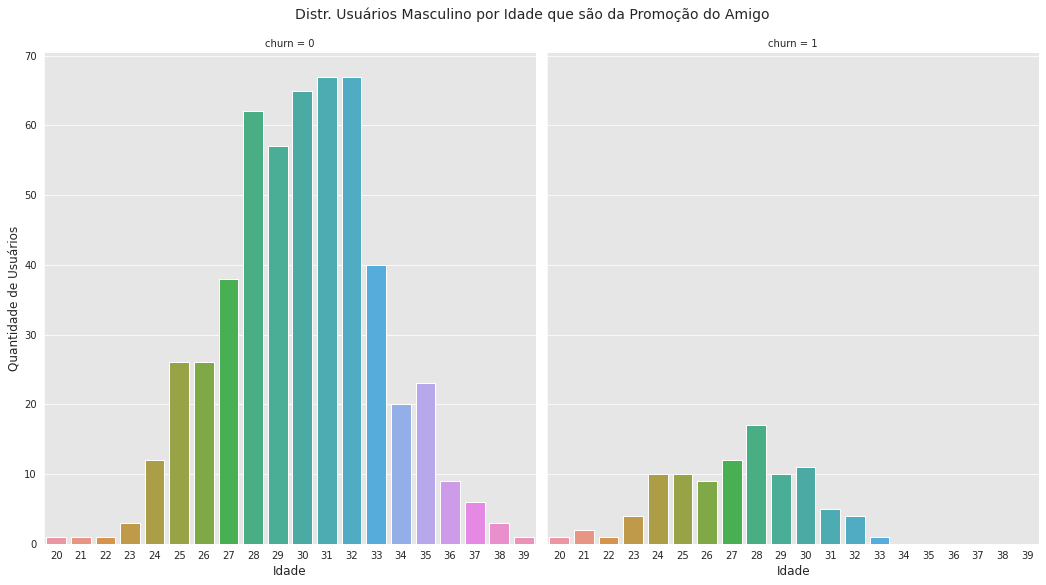

In [57]:

gym_gender_m_friend1 = gym_gender_m_friend[gym_gender_m_friend['promo_friends'] == 1].groupby(['age','churn'])['promo_friends'].count().reset_index()

a = sns.catplot(data=gym_gender_m_friend1, x="age", y="promo_friends", col="churn",kind="bar", height=8, aspect=.9)
a.set_ylabels('Quantidade de Usuários', fontsize=12)
a.set_xlabels('Idade', fontsize=12)
a.fig.subplots_adjust(top=0.9)
a.fig.suptitle('Distr. Usuários Masculino por Idade que são da Promoção do Amigo', fontsize=14)
plt.show()

Ainda analisando os usuários masculino no gráfico acima para aqueles que são participantes da Promoção do Amigo, a predominância da faixa dos 28 a 32 anos ainda permanece no 'churn' = 0. Já considerando o 'churn' = 1 (cancelamento), a faixa de idade onde há a maior concentração é na faixa dos 26 a 30 anos. Nos usuários masculino, a idade com maior número de cancelamentos de usuários que são de companhias parceiras é 28 anos.


Percebe-se que a quantidade de cancelamento é proporcionalmente maior entre aqueles usuários que NÃO são participantes da Promoção do Amigo, cerca de 9% maior comparado aos usuários que fazem parte da Promoção do Amigo.

#### Separando por Indicação e Gênero Feminino

In [58]:

gym_gender_f_friend = gym_gender_friend[gym_gender_friend['gender_f'] == 1]
gym_gender_f_friend.head()

,gender_m,gender_f,churn,age,promo_friends
1,0,1,0,31,0
2,0,1,0,28,0
3,0,1,0,33,1
7,0,1,1,30,0
9,0,1,0,31,0


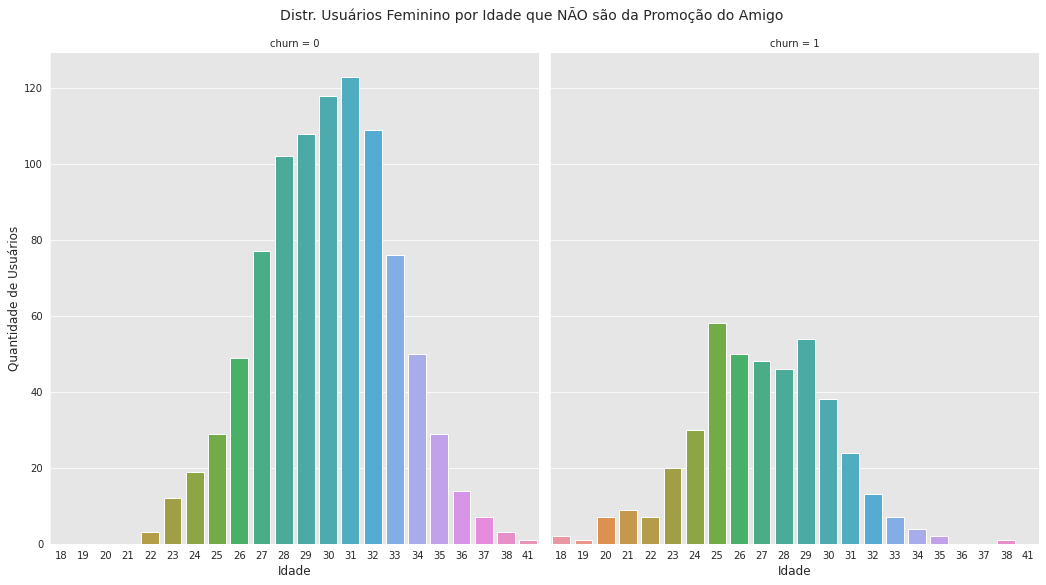

In [59]:
gym_gender_f_friend0 = gym_gender_f_friend[gym_gender_f_friend['promo_friends'] == 0].groupby(['age','churn'])['promo_friends'].count().reset_index()

a = sns.catplot(data=gym_gender_f_friend0, x="age", y="promo_friends", col="churn",kind="bar", height=8, aspect=.9)
a.set_ylabels('Quantidade de Usuários', fontsize=12)
a.set_xlabels('Idade', fontsize=12)
a.fig.subplots_adjust(top=0.9) # adjust the Figure in rp
a.fig.suptitle('Distr. Usuários Feminino por Idade que NÃO são da Promoção do Amigo', fontsize=14)
plt.show()

Analisando somente os usuários feminino no gráfico acima para aqueles que NÂO são participantes da Promoção do Amigo, a predominância da faixa dos 28 a 32 anos permanece no 'churn' = 0. Já considerando o 'churn' = 1 (cancelamento), a faixa de idade onde há a maior concentração é na faixa dos 25 a 29 anos. Nos usuários feminino, a idade com maior número de cancelamentos de usuários que NÂO são participantes da Promoção do Amigo é 25 anos.

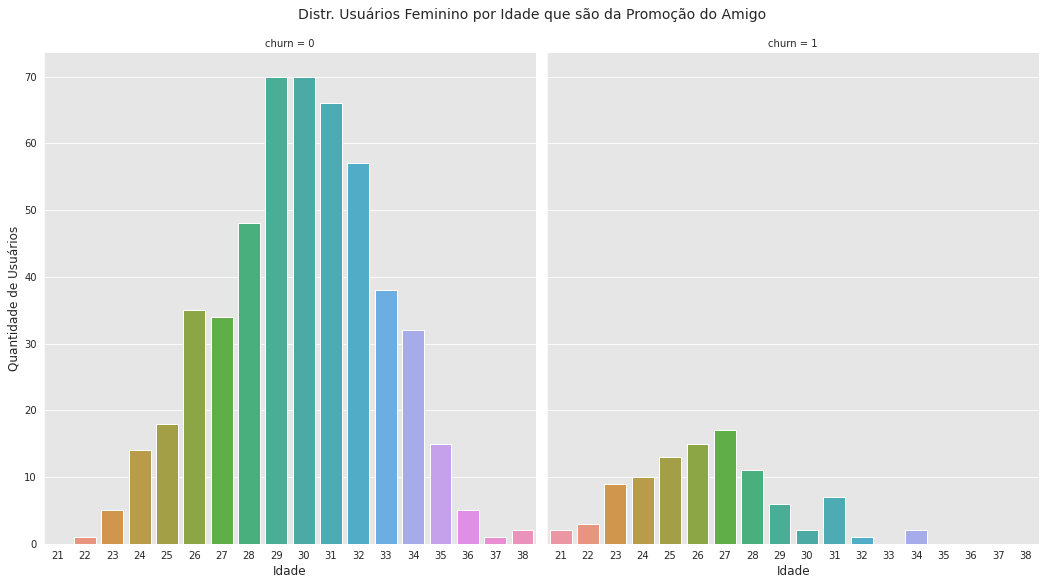

In [60]:
gym_gender_f_friend1 = gym_gender_f_friend[gym_gender_f_friend['promo_friends'] == 1].groupby(['age','churn'])['promo_friends'].count().reset_index()

a = sns.catplot(data=gym_gender_f_friend1, x="age", y="promo_friends", col="churn",kind="bar", height=8, aspect=.9)
a.set_ylabels('Quantidade de Usuários', fontsize=12)
a.set_xlabels('Idade', fontsize=12)
a.fig.subplots_adjust(top=0.9) # adjust the Figure in rp
a.fig.suptitle('Distr. Usuários Feminino por Idade que são da Promoção do Amigo', fontsize=14)
plt.show()

Ainda analisando os usuários feminino no gráfico acima para aqueles que são participantes da Promoção do Amigo, a predominância da faixa dos 29 a 32 anos ainda permanece no 'churn' = 0. Já considerando o 'churn' = 1 (cancelamento), a faixa de idade onde há a maior concentração é na faixa dos 24 a 27 anos. Nos usuários masculino, a idade com maior número de cancelamentos de usuários que são de companhias parceiras é 27 anos.


Percebe-se que a quantidade de cancelamento é proporcionalmente maior entre aqueles usuários que NÃO são participantes da Promoção do Amigo, cerca de 8% maior comparado aos usuários que fazem parte da Promoção do Amigo.

### Contato telefônico

In [61]:
gym_gender.drop(['promo_friends'], axis=1, inplace=True)
gym_gender_phone = gym_gender

In [62]:
gym_gender_phone['phone'] = gym['phone']
gym_gender_phone

,gender_m,gender_f,churn,age,phone
0,1,0,0,29,0
1,0,1,0,31,1
2,0,1,0,28,1
3,0,1,0,33,1
4,1,0,0,26,1
...,...,...,...,...,...
3995,1,0,0,33,1
3996,0,1,1,29,1
3997,1,0,0,28,1
3998,0,1,0,32,1


In [63]:
#Verificando os usuários por gênero
gym_gender_phone.groupby(['gender_m','churn','phone'])['gender_m'].count()

gender_m  churn  phone
0         0      0         135
                 1        1305
          1      0          49
                 1         470
1         0      0         148
                 1        1351
          1      0          54
                 1         488
Name: gender_m, dtype: int64

In [64]:
(gym_gender_phone.groupby(['phone','churn'])['gender_m'].count() / gym.shape[0])*100

phone  churn
0      0         7.075
       1         2.575
1      0        66.400
       1        23.950
Name: gender_m, dtype: float64

Pelas tabelas acima, verifica-se a distribuição dos usuários que informaram o contato telefônico, onde nota-se um grande equilíbrio entre usuários masculino e feminino, porém uma grande diferença entre os usuários que informaram o contato telefônico e aqueles que não informaram.
        
                             MASCULINO    FEMININO   
         INFORMOU TELEFONE    45.9%         44.3%
     NÃO INFORMOU TELEFONE     5.1%          4.7%


#### Visão geral

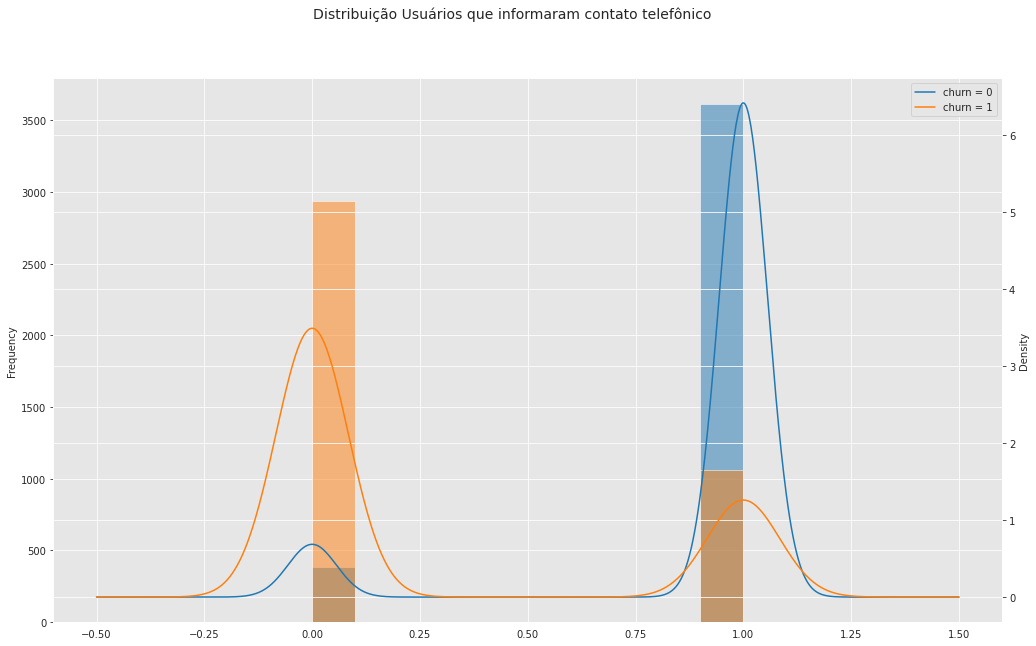

In [65]:
#Plotando as informações 'phone' e 'churn'
gym_phone = gym_gender_phone.copy(deep=True)
gym_phone = gym_phone.filter(['phone','churn'])

fig, ax = plt.subplots(figsize=(17,10))
gym_phone.plot.hist(ax=ax, alpha=0.5,legend=False)
ax2 = ax.twinx()
gym_phone.plot.kde(ax=ax2, legend=False)
plt.legend(["churn = 0", "churn = 1"], loc ="upper right")
plt.suptitle('Distribuição Usuários que informaram contato telefônico', fontsize=14)
plt.show()

Acima verifica-se os dados plotados entre as informações 'partner' e 'churn' onde nota-se  distribuição entre cancelamentos e usuários que forneceram o contato telefônico. Percebe-se que que o cancelamento é extremamente maior entre pessoas que não forneceram o contato telefônico do que os usuários que fazem parte.

#### Separando por Gênero Masculino e Contato Telefônico

In [66]:
gym_gender_m_phone = gym_gender_phone[gym_gender_phone['gender_m'] == 1]
gym_gender_m_phone.head()

,gender_m,gender_f,churn,age,phone
0,1,0,0,29,0
4,1,0,0,26,1
5,1,0,0,34,1
6,1,0,0,32,0
8,1,0,0,23,1


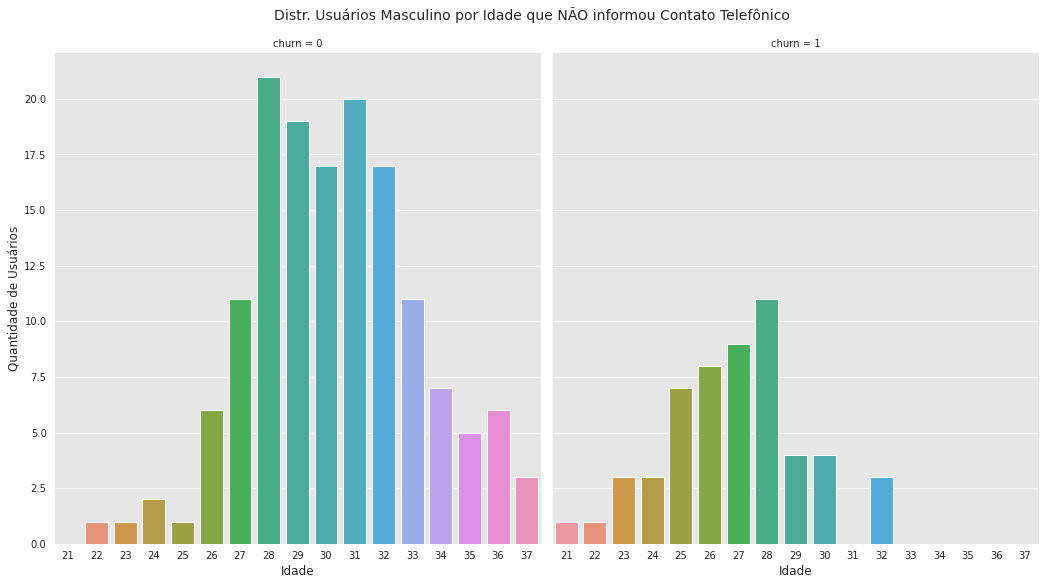

In [67]:

gym_gender_m_phone0 = gym_gender_m_phone[gym_gender_m_phone['phone'] == 0].groupby(['age','churn'])['phone'].count().reset_index()

a = sns.catplot(data=gym_gender_m_phone0, x="age", y="phone", col="churn",kind="bar", height=8, aspect=.9)
a.set_ylabels('Quantidade de Usuários', fontsize=12)
a.set_xlabels('Idade', fontsize=12)
a.fig.subplots_adjust(top=0.9)
a.fig.suptitle('Distr. Usuários Masculino por Idade que NÃO informou Contato Telefônico',fontsize=14)
plt.show()


Analisando somente os usuários masculino no gráfico acima para aqueles usuários que NÃO informaram o contato telefônico, a predominância da faixa dos 28 a 32 anos permanece no 'churn' = 0. Já considerando o 'churn' = 1 (cancelamento), a faixa de idade onde há a maior concentração é na faixa dos 25 a 28 anos. A idade com maior número de cancelamentos de usuários que NÂO são participantes da Promoção do Amigo é 28 anos. Ainda nota-se que há várias idades onde não há informação de cancelamento, fazendo com que a média geral seja baixa. 

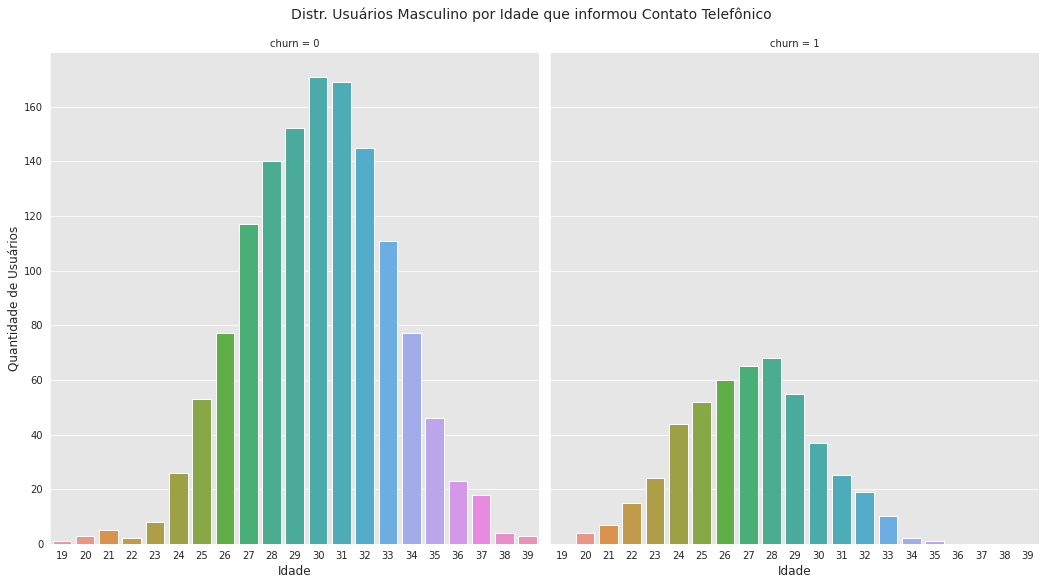

In [68]:

gym_gender_m_phone1 = gym_gender_m_phone[gym_gender_m_phone['phone'] == 1].groupby(['age','churn'])['phone'].count().reset_index()

a = sns.catplot(data=gym_gender_m_phone1, x="age", y="phone", col="churn",kind="bar", height=8, aspect=.9)
a.set_ylabels('Quantidade de Usuários', fontsize=12)
a.set_xlabels('Idade', fontsize=12)
a.fig.subplots_adjust(top=0.9)
a.fig.suptitle('Distr. Usuários Masculino por Idade que informou Contato Telefônico',fontsize=14)
plt.show()

Ainda analisando os usuários masculino no gráfico acima para aqueles usuários que informaram o contato telefônico, a predominância da faixa dos 28 a 32 anos ainda permanece no 'churn' = 0. Já considerando o 'churn' = 1 (cancelamento), a faixa de idade onde há a maior concentração é na faixa dos 25 a 29 anos. A idade com maior número de cancelamentos de usuários que são de companhias parceiras é 28 anos.


Percebe-se que a quantidade de cancelamento é proporcionalmente maior entre aqueles usuários que informaram o contato telefônico, cerca de 11% maior comparado aos usuários que NÃO informaram o contato telefônico.

#### Separando por Gênero Feminino e Contato Telefônico

In [69]:
gym_gender_f_phone = gym_gender_phone[gym_gender_phone['gender_f'] == 1]
gym_gender_f_phone.head()

,gender_m,gender_f,churn,age,phone
1,0,1,0,31,1
2,0,1,0,28,1
3,0,1,0,33,1
7,0,1,1,30,1
9,0,1,0,31,1


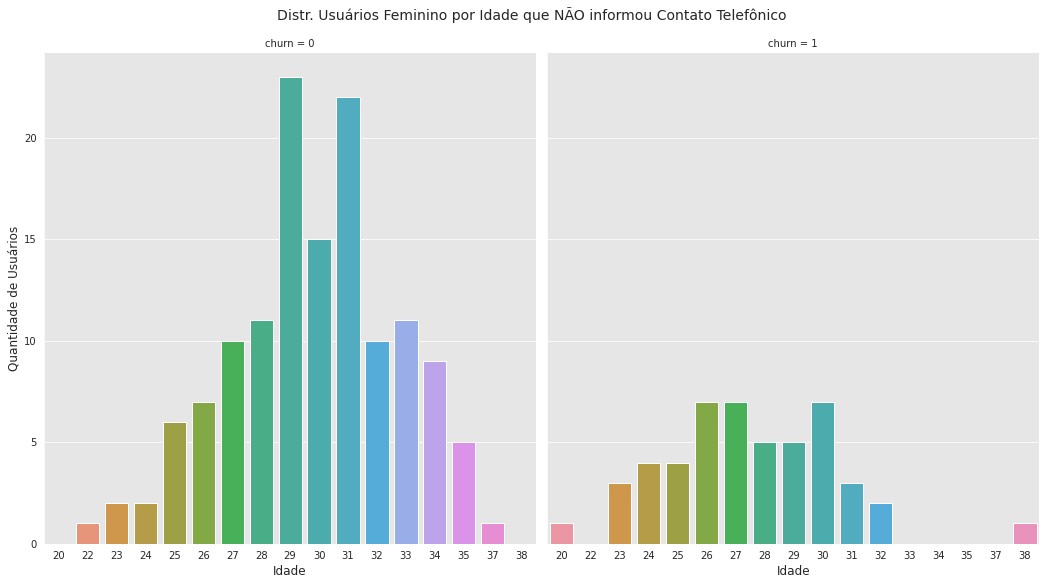

In [70]:
gym_gender_f_phone0 = gym_gender_f_phone[gym_gender_f_phone['phone'] == 0].groupby(['age','churn'])['phone'].count().reset_index()

a = sns.catplot(data=gym_gender_f_phone0, x="age", y="phone", col="churn",kind="bar", height=8, aspect=.9)
a.set_ylabels('Quantidade de Usuários', fontsize=12)
a.set_xlabels('Idade', fontsize=12)
a.fig.subplots_adjust(top=0.9) # adjust the Figure in rp
a.fig.suptitle('Distr. Usuários Feminino por Idade que NÃO informou Contato Telefônico',fontsize=14)
plt.show()

Analisando somente os usuários feminino no gráfico acima para aqueles usuários que NÃO informaram o contato telefônico, a predominância da faixa dos 28 a 32 anos permanece no 'churn' = 0. Já considerando o 'churn' = 1 (cancelamento), a faixa de idade onde há a maior concentração é na faixa dos 26,27 e 30 anos. A idade com maior número de cancelamentos de usuários que NÂO informaram o contato telefônico é 30 anos.

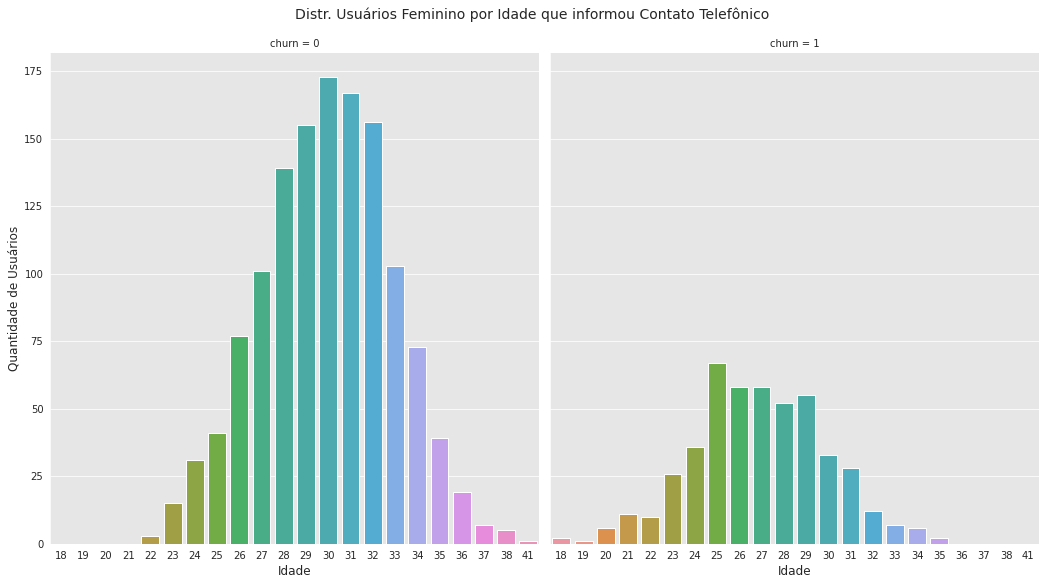

In [71]:
gym_gender_f_phone1 = gym_gender_f_phone[gym_gender_f_phone['phone'] == 1].groupby(['age','churn'])['phone'].count().reset_index()

a = sns.catplot(data=gym_gender_f_phone1, x="age", y="phone", col="churn",kind="bar", height=8, aspect=.9)
a.set_ylabels('Quantidade de Usuários', fontsize=12)
a.set_xlabels('Idade', fontsize=12)
a.fig.subplots_adjust(top=0.9) # adjust the Figure in rp
a.fig.suptitle('Distr. Usuários Feminino por Idade que informou Contato Telefônico',fontsize=14)
plt.show()

Ainda analisando os usuários feminino no gráfico acima para aqueles usuários que informaram o contato telefônico, a predominância da faixa dos 28 a 32 anos ainda permanece no 'churn' = 0. Já considerando o 'churn' = 1 (cancelamento), a faixa de idade onde há a maior concentração é na faixa dos 25 a 29 anos. Nos usuários masculino, a idade com maior número de cancelamentos de usuários que são de companhias parceiras é 25 anos.


Percebe-se que a quantidade de cancelamento é proporcionalmente maior entre aqueles usuários que NÃO informaram o contato telefônico, cerca de 10% maior comparado aos usuários que informaram o contato telefônico.

### Participação de Aulas em grupo

In [72]:
gym_gender.drop(['phone'], axis=1, inplace=True)
gym_gender_group = gym_gender

In [73]:
gym_gender_group['group_visits'] = gym['group_visits']
gym_gender_group.head()

,gender_m,gender_f,churn,age,group_visits
0,1,0,0,29,1
1,0,1,0,31,1
2,0,1,0,28,0
3,0,1,0,33,1
4,1,0,0,26,0


In [74]:
#Verificando os usuários por gênero
gym_gender_group.groupby(['gender_m','gender_f','group_visits'])['churn'].count()

gender_m  gender_f  group_visits
0         1         0               1169
                    1                790
1         0         0               1182
                    1                859
Name: churn, dtype: int64

In [75]:
#Proporção de usuários por gênero e participante das aulas
(gym_gender_group.groupby(['churn','group_visits'])['churn'].count() / gym.shape[0])*100

churn  group_visits
0      0               39.375
       1               34.100
1      0               19.400
       1                7.125
Name: churn, dtype: float64

Pelas tabelas acima, verifica-se a distribuição dos usuários que participam de aulas em grupo, onde nota-se um grande equilíbrio entre usuários masculino e feminino, porém uma grande diferença entre os usuários que participam de aulas em grupo e aqueles que não participam.
        
                             MASCULINO    FEMININO   
         PART. AULAS GRUPO    21.5%         19.7%
     NÃO PART. AULAS GRUPO    29.4%         29.2%


#### Visão geral

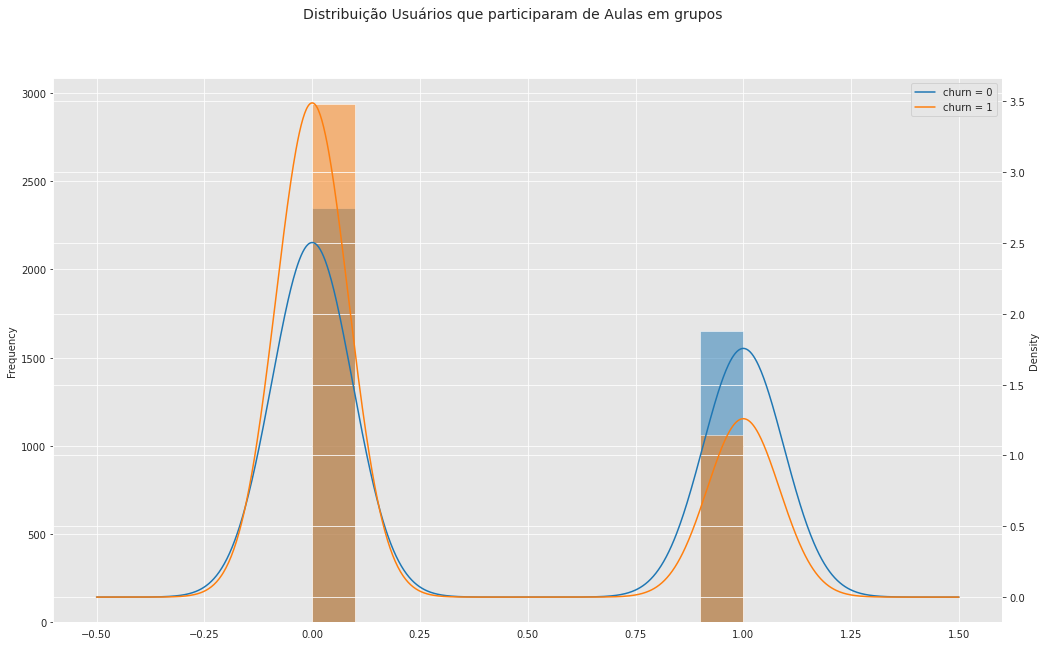

In [76]:
#Plotando as informações 'group_visits'e 'churn'

gym_group = gym_gender_group.copy(deep=True)
gym_group = gym_group.filter(['group_visits','churn'])

fig, ax = plt.subplots(figsize=(17,10))
gym_group.plot.hist(ax=ax, alpha=0.5,legend=False)
ax2 = ax.twinx()
gym_group.plot.kde(ax=ax2, legend=False)
plt.legend(["churn = 0", "churn = 1"], loc ="upper right")
plt.suptitle('Distribuição Usuários que participaram de Aulas em grupos', fontsize=14)
plt.show()

Acima verifica-se os dados plotados entre as informações 'partner' e 'churn' onde nota-se  distribuição entre cancelamentos e usuários que participam de aulas em grupo. Percebe-se que que o cancelamento é muito maior entre usuários que não particimpa de aulas em grupo do que os usuários que fazem aulas em grupo.

#### Separando por  Gênero Masculino e Participante de Aulas em Grupo

In [77]:
gym_gender_m_group = gym_gender_group[gym_gender_group['gender_m'] == 1]
gym_gender_m_group.head()

,gender_m,gender_f,churn,age,group_visits
0,1,0,0,29,1
4,1,0,0,26,0
5,1,0,0,34,1
6,1,0,0,32,1
8,1,0,0,23,1


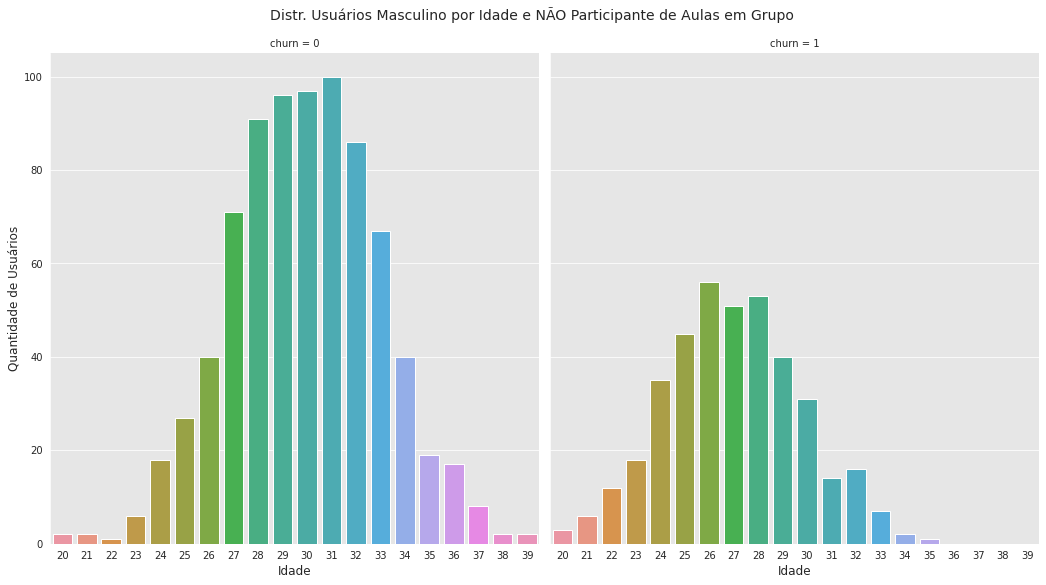

In [78]:

gym_gender_m_group0 = gym_gender_m_group[gym_gender_m_group['group_visits'] == 0].groupby(['age','churn'])['group_visits'].count().reset_index()

a = sns.catplot(data=gym_gender_m_group0, x="age", y="group_visits", col="churn",kind="bar", height=8, aspect=.9)
a.set_ylabels('Quantidade de Usuários', fontsize=12)
a.set_xlabels('Idade', fontsize=12)
a.fig.subplots_adjust(top=0.9) # adjust the Figure in rp
a.fig.suptitle('Distr. Usuários Masculino por Idade e NÃO Participante de Aulas em Grupo',fontsize=14)
plt.show()

Analisando somente os usuários masculino no gráfico acima para aqueles usuários que NÃO participam de aulas em grupo, a predominância da faixa dos 28 a 31 anos permanece no 'churn' = 0. Já considerando o 'churn' = 1 (cancelamento), a faixa de idade onde há a maior concentração é na faixa dos 25 a 29 anos. A idade com maior número de cancelamentos de usuários que NÂO participam de aulas em grupo é 26 anos. No gráfico ainda nota-se que há várias idades onde não há informação de cancelamento.

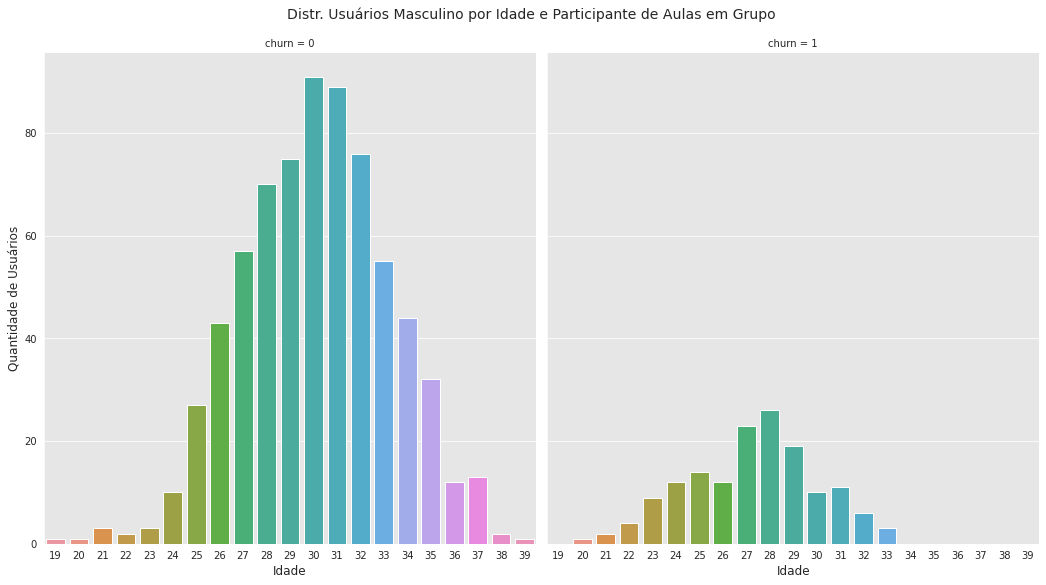

In [79]:

gym_gender_m_group1 = gym_gender_m_group[gym_gender_m_group['group_visits'] == 1].groupby(['age','churn'])['group_visits'].count().reset_index()

a = sns.catplot(data=gym_gender_m_group1, x="age", y="group_visits", col="churn",kind="bar", height=8, aspect=.9)
a.set_ylabels('Quantidade de Usuários', fontsize=12)
a.set_xlabels('Idade', fontsize=12)
a.fig.subplots_adjust(top=0.9) # adjust the Figure in rp
a.fig.suptitle('Distr. Usuários Masculino por Idade e Participante de Aulas em Grupo',fontsize=14)
plt.show()

Ainda analisando os usuários masculino no gráfico acima para aqueles usuários que participam de aulas em grupo, a predominância da faixa dos 28 a 32 anos ainda permanece no 'churn' = 0. Já considerando o 'churn' = 1 (cancelamento), a faixa de idade onde há a maior concentração é na faixa dos 27 a 29 anos. Nos usuários masculino, a idade com maior número de cancelamentos de usuários que participam de aulas em grupos é 28 anos.


Percebe-se que a quantidade de cancelamento é proporcionalmente maior entre aqueles usuários que NÃO participam de aulas em grupo, cerca de 6% maior comparado aos usuários que participam de aulas em grupo.

#### Separando por  Gênero Feminino e Participante de Aulas em Grupo

In [80]:
gym_gender_f_group = gym_gender_group[gym_gender_group['gender_f'] == 1]
gym_gender_f_group.head()

,gender_m,gender_f,churn,age,group_visits
1,0,1,0,31,1
2,0,1,0,28,0
3,0,1,0,33,1
7,0,1,1,30,0
9,0,1,0,31,0


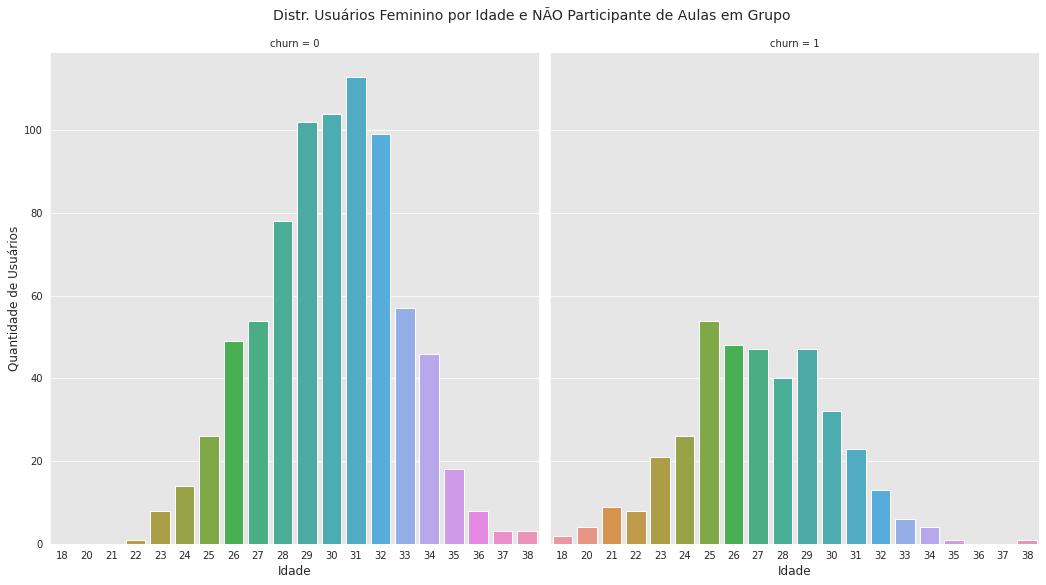

In [81]:
gym_gender_f_group0 = gym_gender_f_group[gym_gender_f_group['group_visits'] == 0].groupby(['age','churn'])['group_visits'].count().reset_index()

a = sns.catplot(data=gym_gender_f_group0, x="age", y="group_visits", col="churn",kind="bar", height=8, aspect=.9)
a.set_ylabels('Quantidade de Usuários', fontsize=12)
a.set_xlabels('Idade', fontsize=12)
a.fig.subplots_adjust(top=0.9) # adjust the Figure in rp
a.fig.suptitle('Distr. Usuários Feminino por Idade e NÃO Participante de Aulas em Grupo',fontsize=14)
plt.show()

Analisando somente os usuários feminino no gráfico acima para aqueles usuários que NÃO participam de aulas em grupo, a predominância da faixa dos 29 a 32 anos permanece no 'churn' = 0. Já considerando o 'churn' = 1 (cancelamento), a faixa de idade onde há a maior concentração é na faixa dos 25 a 29 anos. A idade com maior número de cancelamentos de usuários que NÂO participam de aulas em grupo é 25 anos.

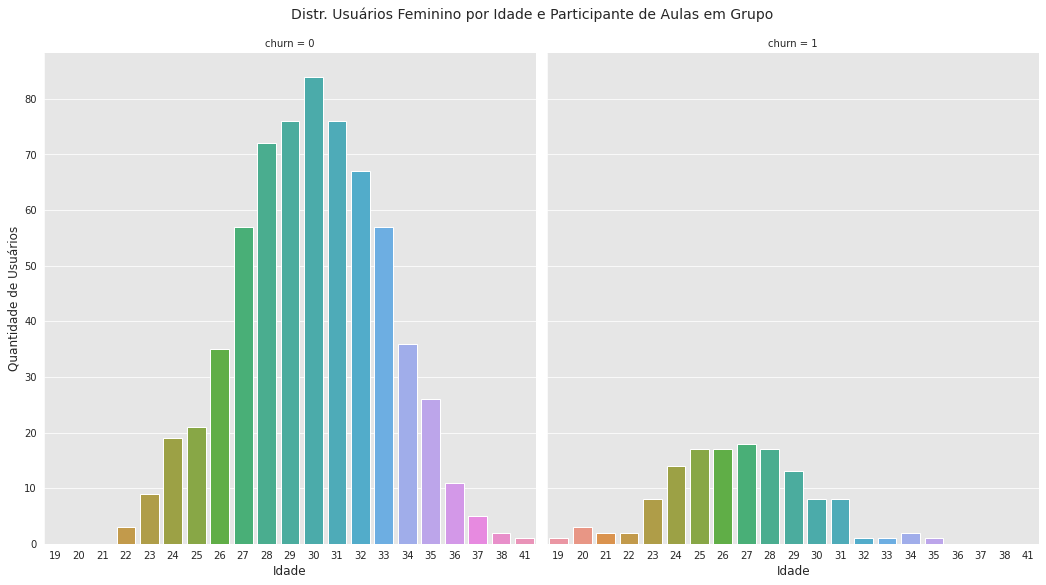

In [82]:

gym_gender_f_group1 = gym_gender_f_group[gym_gender_f_group['group_visits'] == 1].groupby(['age','churn'])['group_visits'].count().reset_index()

a = sns.catplot(data=gym_gender_f_group1, x="age", y="group_visits", col="churn",kind="bar", height=8, aspect=.9)
a.set_ylabels('Quantidade de Usuários', fontsize=12)
a.set_xlabels('Idade', fontsize=12)
a.fig.subplots_adjust(top=0.9) # adjust the Figure in rp
a.fig.suptitle('Distr. Usuários Feminino por Idade e Participante de Aulas em Grupo',fontsize=14)
plt.show()

Ainda analisando os usuários feminino no gráfico acima para aqueles usuários que participam de aulas em grupo, a predominância da faixa dos 28 a 32 anos ainda permanece no 'churn' = 0. Já considerando o 'churn' = 1 (cancelamento), a faixa de idade onde há a maior concentração é na faixa dos 24 a 29 anos. A idade com maior número de cancelamentos de usuários que participam de aulas em grupo é 27 anos.


Percebe-se que a quantidade de cancelamento é proporcionalmente maior entre aqueles usuários que NÃO participam de aulas em grupo, cerca de 5,5% maior comparado aos usuários que participam de aulas em grupo.

### Vigência do Contrato

In [83]:
gym_gender.drop(['group_visits'], axis=1, inplace=True)
gym_gender_vig_contr = gym_gender

In [84]:
gym_gender_vig_contr['contract_period'] = gym['contract_period']
gym_gender_vig_contr

,gender_m,gender_f,churn,age,contract_period
0,1,0,0,29,6
1,0,1,0,31,12
2,0,1,0,28,1
3,0,1,0,33,12
4,1,0,0,26,1
...,...,...,...,...,...
3995,1,0,0,33,12
3996,0,1,1,29,1
3997,1,0,0,28,12
3998,0,1,0,32,6


In [85]:
#Categorizando a coluna 'contract_period'
gym_gender_vig_contr['contract_period_group'] = pd.cut(gym_gender_vig_contr['contract_period'],[0,1,6,12],
                                                         labels=['0-1','2-6','7-12'])


In [86]:
#convertendo o tipo de dado para 'object'
gym_gender_vig_contr['contract_period_group'] = gym_gender_vig_contr['contract_period_group'].astype("object")
gym_gender_vig_contr

,gender_m,gender_f,churn,age,contract_period,contract_period_group
0,1,0,0,29,6,2-6
1,0,1,0,31,12,7-12
2,0,1,0,28,1,0-1
3,0,1,0,33,12,7-12
4,1,0,0,26,1,0-1
...,...,...,...,...,...,...
3995,1,0,0,33,12,7-12
3996,0,1,1,29,1,0-1
3997,1,0,0,28,12,7-12
3998,0,1,0,32,6,2-6


In [87]:
gym_gender_vig_contr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   gender_m               4000 non-null   int64 
 1   gender_f               4000 non-null   int64 
 2   churn                  4000 non-null   int64 
 3   age                    4000 non-null   int64 
 4   contract_period        4000 non-null   int64 
 5   contract_period_group  4000 non-null   object
dtypes: int64(5), object(1)
memory usage: 187.6+ KB


In [88]:
#Verificando os usuários por gênero
gym_gender_vig_contr.groupby(['age', 'contract_period_group'])['churn'].count()

age  contract_period_group
18   0-1                        2
19   0-1                        2
20   0-1                       12
     7-12                       2
21   0-1                       19
     2-6                        4
     7-12                       1
22   0-1                       23
     2-6                        5
     7-12                       5
23   0-1                       61
     2-6                       13
     7-12                       8
24   0-1                       95
     2-6                       22
     7-12                      31
25   0-1                      153
     2-6                       43
     7-12                      35
26   0-1                      190
     2-6                       51
     7-12                      59
27   0-1                      223
     2-6                       73
     7-12                      82
28   0-1                      251
     2-6                       97
     7-12                      99
29   0-1             

In [89]:
#Proporção de usuários por gênero e vigência de contrato
(gym_gender_vig_contr.groupby(['gender_m','churn','contract_period_group'])['gender_m'].count() / gym.shape[0])*100

gender_m  churn  contract_period_group
0         0      0-1                      15.550
                 2-6                       8.925
                 7-12                     11.525
          1      0-1                      11.550
                 2-6                       1.150
                 7-12                      0.275
1         0      0-1                      16.275
                 2-6                       9.300
                 7-12                     11.900
          1      0-1                      11.800
                 2-6                       1.450
                 7-12                      0.300
Name: gender_m, dtype: float64

In [90]:
#Proporção de usuários por idade e vigência de contrato
(gym_gender_vig_contr.groupby(['age', 'contract_period_group'])['churn'].count() / gym.shape[0])*100

age  contract_period_group
18   0-1                      0.050
19   0-1                      0.050
20   0-1                      0.300
     7-12                     0.050
21   0-1                      0.475
     2-6                      0.100
     7-12                     0.025
22   0-1                      0.575
     2-6                      0.125
     7-12                     0.125
23   0-1                      1.525
     2-6                      0.325
     7-12                     0.200
24   0-1                      2.375
     2-6                      0.550
     7-12                     0.775
25   0-1                      3.825
     2-6                      1.075
     7-12                     0.875
26   0-1                      4.750
     2-6                      1.275
     7-12                     1.475
27   0-1                      5.575
     2-6                      1.825
     7-12                     2.050
28   0-1                      6.275
     2-6                      2.425
 

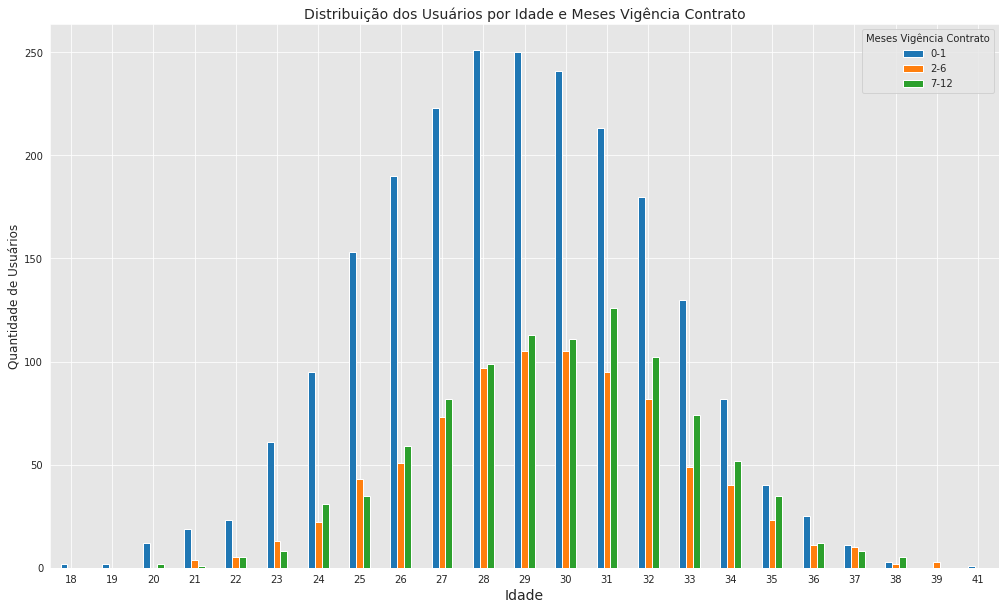

In [91]:
ax = gym_gender_vig_contr.pivot_table(index='age', columns='contract_period_group', values='churn', aggfunc='count').plot.bar(figsize=(17,10))
plt.legend(loc='upper right', title='Meses Vigência Contrato',fontsize=10)
ax.set_ylabel('Quantidade de Usuários', fontsize=12)
ax.set_xlabel('Idade', fontsize=14)
ax.set_title('Distribuição dos Usuários por Idade e Meses Vigência Contrato', fontsize=14)
plt.xticks(rotation=0)
plt.show()

Analisando as tabelas e gráfico plotado acima, nota-se a distribuição das vigências dos contratos dos usuários  por idade. Na primeira tabela dos gêneros, observa-se que 28% dos usuários preferem contratos com vigência de até 1 mês, tanto masculino como feminino.Já cerva de 12% optam por cotratos com 1 ano de vigência (masculino e feminino). Na segunda tabela das idades, verifica-se o quão distribuido entre as idade é o tipo de vigência. Nota-se a grande predominância dos contratos curtos (1 mês), principalmente em idades na faixa dos 28 a 30 anos. 

Já verificando o gráfico acima plotado, nota-se o exposto acima, onde a grande maioria dos usuários optam por contratos curtos. Usuários até os 23 anos praticamente optam somente por essa modalidade, onde os valores das demais vigências são insignificantes. A partir dos 34 anos, nota-se uma opção maior dos usuários por contratos mais longos, indicando uma menor diferença  no gráfico entre os contratos de curta duração e os demais, indicando a preferência dessa faixa etária de usuário. 

#### Visão geral

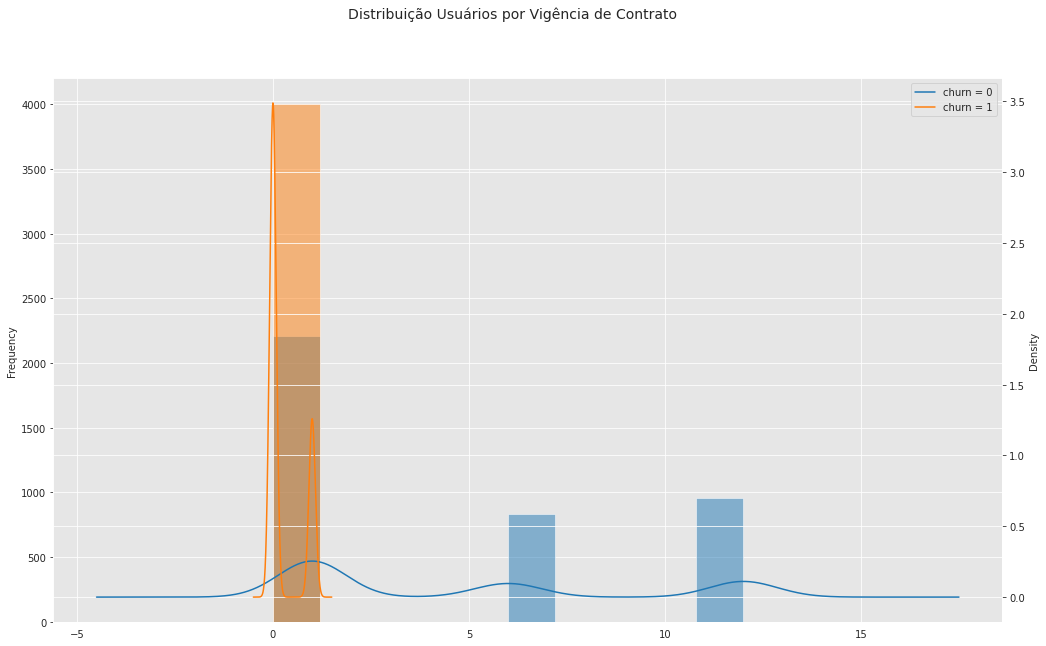

In [92]:
#Plotando as informações 'contract_period' e 'churn'

gym_contr = gym_gender_vig_contr.copy(deep=True)
gym_contr = gym_contr.filter(['contract_period','churn'])

fig, ax = plt.subplots(figsize=(17,10))
gym_contr.plot.hist(ax=ax, alpha=0.5,legend=False)
ax2 = ax.twinx()
gym_contr.plot.kde(ax=ax2, legend=False)
plt.legend(["churn = 0", "churn = 1"], loc ="upper right")
plt.suptitle('Distribuição Usuários por Vigência de Contrato', fontsize=14)
plt.show()

Acima verifica-se os dados plotados entre as informações 'partner' e 'churn' onde nota-se  distribuição entre cancelamentos e usuários com suas vigências de contrato. Percebe-se que que o cancelamento é muito maior entre usuários com vigência de cotratos curtas do que as demais vigências.

#### Separando por Gênero Masculino e Vigência de Contrato

In [93]:
#Filtrando por gênero
gym_gender_m_vig_contr = gym_gender_vig_contr[gym_gender_vig_contr['gender_m'] == 1].reset_index()
gym_gender_m_vig_contr.head()

,index,gender_m,gender_f,churn,age,contract_period,contract_period_group
0,0,1,0,0,29,6,2-6
1,4,1,0,0,26,1,0-1
2,5,1,0,0,34,1,0-1
3,6,1,0,0,32,6,2-6
4,8,1,0,0,23,1,0-1


In [94]:
gym_gender_m_vig_contr[gym_gender_m_vig_contr['churn'] == 1].pivot_table(index='age', columns='contract_period_group', values='churn', aggfunc='count')

contract_period_group,0-1,2-6,7-12
age,,,
20,4.0,NaN,NaN
21,6.0,2.0,NaN
22,12.0,3.0,1.0
23,26.0,1.0,NaN
24,40.0,7.0,NaN
25,51.0,8.0,NaN
26,57.0,6.0,5.0
27,68.0,6.0,NaN
28,64.0,14.0,1.0


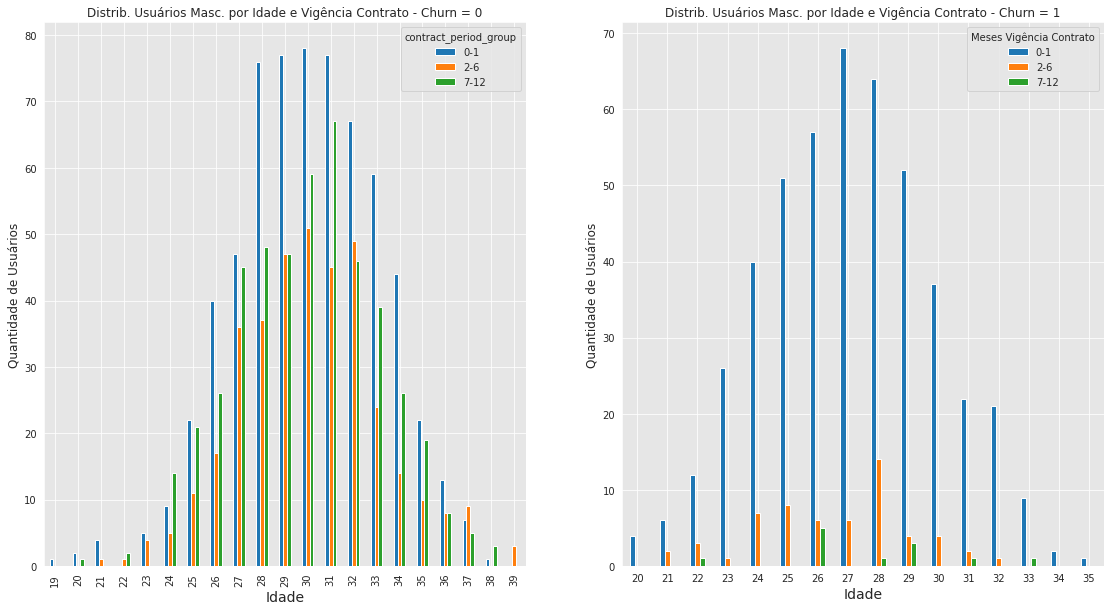

In [95]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(19,10))

gym_gender_m_vig_contr[gym_gender_m_vig_contr['churn'] == 0].pivot_table(index='age', columns='contract_period_group', values='churn', aggfunc='count').plot(ax=axes[0],kind='bar', grid=True)
gym_gender_m_vig_contr[gym_gender_m_vig_contr['churn'] == 1].pivot_table(index='age', columns='contract_period_group', values='churn', aggfunc='count').plot(ax=axes[1], kind='bar',grid=True)

axes[0].set_ylabel('Quantidade de Usuários', fontsize=12)
axes[0].set_xlabel('Idade', fontsize=14)
axes[0].set_title('Distrib. Usuários Masc. por Idade e Vigência Contrato - Churn = 0', fontsize=12)

axes[1].set_ylabel('Quantidade de Usuários', fontsize=12)
axes[1].set_xlabel('Idade', fontsize=14)
axes[1].set_title('Distrib. Usuários Masc. por Idade e Vigência Contrato - Churn = 1', fontsize=12)

plt.legend(loc='upper right', title='Meses Vigência Contrato',fontsize=10)
plt.xticks(rotation=0)
plt.show()

Nos gráficos plotados acima, onde estão distribuídos a quantidade de usuários masculino por idade e vigência de contrato, tanto aqueles que não cancelaram (churn = 0 - esqueda) como os que cancelaram o contrato (churn = 1 - direita). Nota-se a prevalência dos contratos de até 1 mês em praticamente todas as idades. Nota-se um comportamento interessante que dos 19 aos 27 praticamente há empate entre vigências curtas (1 mês) e médias (até 6 meses), a exceção dos usuários de 26 anos ( maioria prefere contratos curtos). Dos 28 aos 34 anos a grande maioria prefere contratos de até 1 mês e a partir dos 35 anos a diferença volta a ser pequena. Interessante notar os usuários com 38 e 39, onde praticamente todos preferem contratos médios e longos.

Analisando os cancelamentos (churn = 1), observa-se que os usuários de contratos curtos cancelam muito mais em todas as idades. Nota-se que os usuários dos contratos longos (até 12 meses) praticamente não há cancelamento, exceto entre os usuários de 26 anos. Nos cancelamentos dos contratos com vigência média (até 6 meses) há uma prevalência ds usuários de 28 anos.

#### Separando por Gênero Feminino e Vigência de Contrato

In [96]:
#Filtrando por gênero
gym_gender_f_vig_contr = gym_gender_vig_contr[gym_gender_vig_contr['gender_f'] == 1].reset_index()
gym_gender_f_vig_contr.head()

,index,gender_m,gender_f,churn,age,contract_period,contract_period_group
0,1,0,1,0,31,12,7-12
1,2,0,1,0,28,1,0-1
2,3,0,1,0,33,12,7-12
3,7,0,1,1,30,1,0-1
4,9,0,1,0,31,1,0-1


In [97]:
gym_gender_f_vig_contr[gym_gender_f_vig_contr['churn'] == 0].pivot_table(index='age', columns='contract_period_group', values='churn', aggfunc='count')

contract_period_group,0-1,2-6,7-12
age,,,
22,1.0,1.0,2.0
23,4.0,5.0,8.0
24,11.0,6.0,16.0
25,21.0,13.0,13.0
26,32.0,26.0,26.0
27,51.0,26.0,34.0
28,61.0,40.0,49.0
29,69.0,47.0,62.0
30,88.0,48.0,52.0


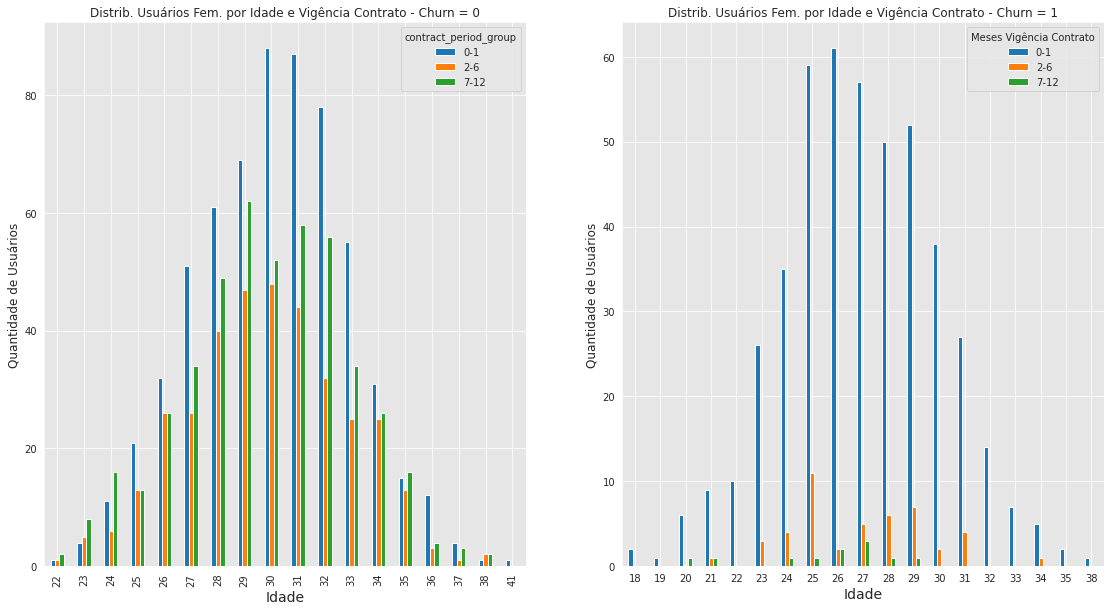

In [98]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(19,10))

gym_gender_f_vig_contr[gym_gender_f_vig_contr['churn'] == 0].pivot_table(index='age', columns='contract_period_group', values='churn', aggfunc='count').plot(ax=axes[0],kind='bar', grid=True)
gym_gender_f_vig_contr[gym_gender_f_vig_contr['churn'] == 1].pivot_table(index='age', columns='contract_period_group', values='churn', aggfunc='count').plot(ax=axes[1], kind='bar',grid=True)

axes[0].set_ylabel('Quantidade de Usuários', fontsize=12)
axes[0].set_xlabel('Idade', fontsize=14)
axes[0].set_title('Distrib. Usuários Fem. por Idade e Vigência Contrato - Churn = 0', fontsize=12)

axes[1].set_ylabel('Quantidade de Usuários', fontsize=12)
axes[1].set_xlabel('Idade', fontsize=14)
axes[1].set_title('Distrib. Usuários Fem. por Idade e Vigência Contrato - Churn = 1', fontsize=12)

plt.legend(loc='upper right', title='Meses Vigência Contrato',fontsize=10)
plt.xticks(rotation=0)
plt.show()

Analisando o comportamento dos usuários feminino para o mesmo tipo de gráfico, nota-se um comportamento semelhante aos usuários masculino, onde a predominância de usuários que optam por contratos com vigência curta (até 1 mês). Até 24 anos os usuários optam mais pelas vigências médias e longas e após os 25 anos os usuários que optam por vigências curtas são a maioria em todas as idades. 

Analisando os cancelamentos (churn = 1), como esperado, os usuários de contratos curtos cancelam muito mais em todas as idades. Nota-se que os usuários dos contratos longos (até 12 meses) praticamente não há cancelamento, exceto entre os usuários de 26 a 28 anos. Nos cancelamentos dos contratos com vigência média (até 6 meses) há uma prevalência ds usuários de 26 anos, diferente dos usuários masculino.

### Meses para Expirar o Contrato

In [99]:
gym_gender.drop(['contract_period','contract_period_group'], axis=1, inplace=True)
gym_gender_end_contr = gym_gender

In [100]:
gym_gender_end_contr['month_to_end_contract'] = gym['month_to_end_contract']
gym_gender_end_contr.head()

,gender_m,gender_f,churn,age,month_to_end_contract
0,1,0,0,29,5.0
1,0,1,0,31,12.0
2,0,1,0,28,1.0
3,0,1,0,33,12.0
4,1,0,0,26,1.0


In [101]:
#Categorizando a coluna 'month_to_end_contract'
gym_gender_end_contr['month_to_end_contr_group'] = pd.cut(gym_gender_end_contr['month_to_end_contract'],[0,3,6,9,12],
                                                         labels=['0-3','4-6','7-9','10-12'])


In [102]:
#Convertendo o tipo de dado
gym_gender_end_contr['month_to_end_contr_group'] = gym_gender_end_contr['month_to_end_contr_group'].astype("object")
gym_gender_end_contr

,gender_m,gender_f,churn,age,month_to_end_contract,month_to_end_contr_group
0,1,0,0,29,5.0,4-6
1,0,1,0,31,12.0,10-12
2,0,1,0,28,1.0,0-3
3,0,1,0,33,12.0,10-12
4,1,0,0,26,1.0,0-3
...,...,...,...,...,...,...
3995,1,0,0,33,12.0,10-12
3996,0,1,1,29,1.0,0-3
3997,1,0,0,28,11.0,10-12
3998,0,1,0,32,5.0,4-6


In [103]:
gym_gender_end_contr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   gender_m                  4000 non-null   int64  
 1   gender_f                  4000 non-null   int64  
 2   churn                     4000 non-null   int64  
 3   age                       4000 non-null   int64  
 4   month_to_end_contract     4000 non-null   float64
 5   month_to_end_contr_group  4000 non-null   object 
dtypes: float64(1), int64(4), object(1)
memory usage: 187.6+ KB


In [104]:
#Verificando os usuários por gênero
gym_gender_end_contr.groupby(['age', 'month_to_end_contr_group'])['churn'].count()

age  month_to_end_contr_group
18   0-3                          2
19   0-3                          2
20   0-3                         12
     10-12                        1
     4-6                          1
                                 ..
38   10-12                        4
     4-6                          2
     7-9                          1
39   4-6                          3
41   0-3                          1
Name: churn, Length: 76, dtype: int64

In [105]:
#Proporção de usuários por gênero e vigência de contrato
(gym_gender_end_contr.groupby(['gender_m','month_to_end_contr_group'])['gender_m'].count() / gym.shape[0])*100

gender_m  month_to_end_contr_group
0         0-3                         27.525
          10-12                        9.600
          4-6                         10.025
          7-9                          1.825
1         0-3                         28.575
          10-12                       10.075
          4-6                         10.800
          7-9                          1.575
Name: gender_m, dtype: float64

In [106]:
#Proporção de usuários por idade e vigência de contrato
(gym_gender_end_contr.groupby(['age', 'month_to_end_contr_group'])['churn'].count() / gym.shape[0])*100

age  month_to_end_contr_group
18   0-3                         0.050
19   0-3                         0.050
20   0-3                         0.300
     10-12                       0.025
     4-6                         0.025
                                 ...  
38   10-12                       0.100
     4-6                         0.050
     7-9                         0.025
39   4-6                         0.075
41   0-3                         0.025
Name: churn, Length: 76, dtype: float64

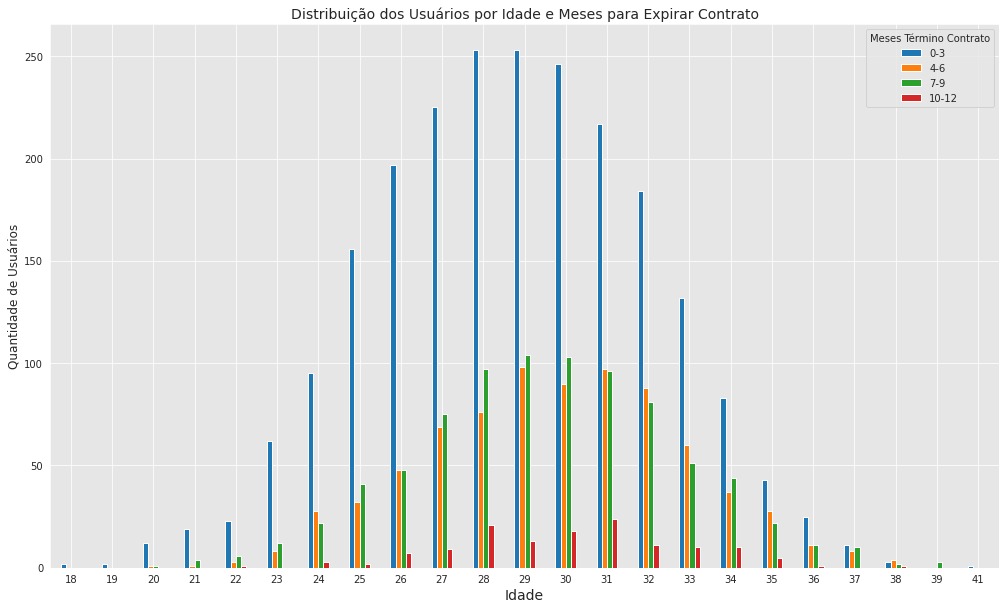

In [107]:
ax = gym_gender_end_contr.pivot_table(index='age', columns='month_to_end_contr_group', values='churn', aggfunc='count').plot.bar(figsize=(17,10))
plt.legend(['0-3','4-6','7-9','10-12'],loc='upper right', title='Meses Término Contrato',fontsize=10)
ax.set_ylabel('Quantidade de Usuários', fontsize=12)
ax.set_xlabel('Idade', fontsize=14)
ax.set_title('Distribuição dos Usuários por Idade e Meses para Expirar Contrato', fontsize=14)
plt.xticks(rotation=0)
plt.show()

Analisando as tabelas e gráfico plotado acima, nota-se a distribuição dos meses de término dos contratos dos usuários por idade, confirmando o exposto no tópico anterior, onde a maioria dos usuários optam por contratos de até 1 mês de vigência, seguindo as proporções anteriores. Cabe destacar aqui a respeito dos contatos con vigência acima de 6 meses, onde nota-se que em praticamente todas as idades os usuários que optaram por essa vigência,  estão na faixa dos 7-9 meses para término dos respectivos contratos. 

#### Visão geral

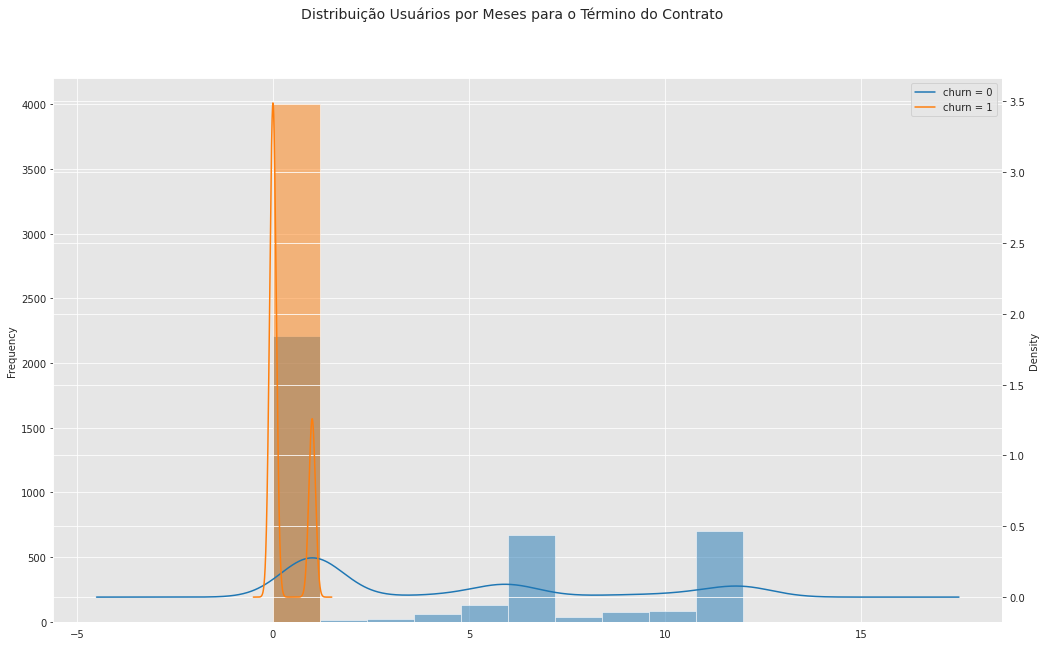

In [108]:
#Plotando as informações 'month_to_end_contract' e 'churn'

gym_contr = gym_gender_end_contr.copy(deep=True)
gym_contr = gym_contr.filter(['month_to_end_contract','churn'])

fig, ax = plt.subplots(figsize=(17,10))
gym_contr.plot.hist(ax=ax, alpha=0.5,legend=False)
ax2 = ax.twinx()
gym_contr.plot.kde(ax=ax2, legend=False)
plt.legend(["churn = 0", "churn = 1"], loc ="upper right")
plt.suptitle('Distribuição Usuários por Meses para o Término do Contrato', fontsize=14)
plt.show()

Acima verifica-se os dados plotados entre as informações 'partner' e 'churn' onde nota-se  distribuição entre cancelamentos e os meses para expirar os contratos dos usuários. Como expost acima, o cancelamento é muito maior entre usuários com poucos meses para expirar o contrato.

In [109]:
#### Separando por Gênero Masculino e Meses para Expirar o Contrato

In [110]:
#Filtrando por gênero
gym_gender_m_end_contr = gym_gender_end_contr[gym_gender_end_contr['gender_m'] == 1].reset_index()
gym_gender_m_end_contr.head()

,index,gender_m,gender_f,churn,age,month_to_end_contract,month_to_end_contr_group
0,0,1,0,0,29,5.0,4-6
1,4,1,0,0,26,1.0,0-3
2,5,1,0,0,34,1.0,0-3
3,6,1,0,0,32,6.0,4-6
4,8,1,0,0,23,1.0,0-3


In [111]:
gym_gender_m_end_contr[gym_gender_m_end_contr['churn'] == 0].pivot_table(index='age', columns='month_to_end_contr_group', values='churn', aggfunc='count')

month_to_end_contr_group,0-3,10-12,4-6,7-9
age,,,,
19,1.0,NaN,NaN,NaN
20,2.0,NaN,1.0,NaN
21,4.0,NaN,1.0,NaN
22,NaN,1.0,2.0,NaN
23,5.0,NaN,4.0,NaN
24,9.0,13.0,5.0,1.0
25,22.0,18.0,12.0,2.0
26,43.0,19.0,17.0,4.0
27,49.0,39.0,37.0,3.0


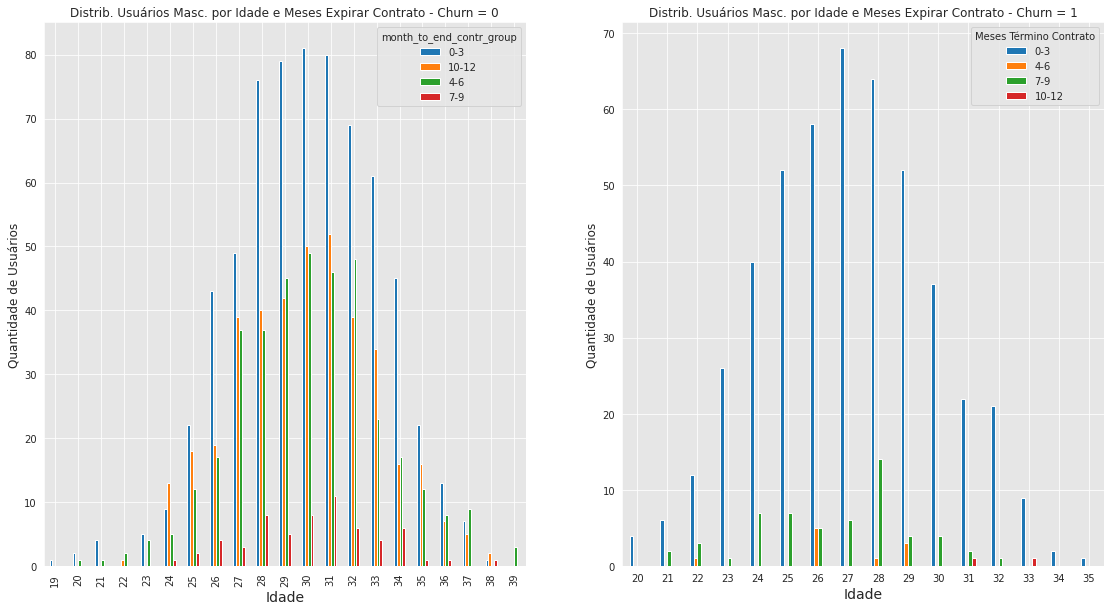

In [112]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(19,10))

gym_gender_m_end_contr[gym_gender_m_end_contr['churn'] == 0].pivot_table(index='age', columns='month_to_end_contr_group', values='churn', aggfunc='count').plot(ax=axes[0],kind='bar', grid=True)
gym_gender_m_end_contr[gym_gender_m_end_contr['churn'] == 1].pivot_table(index='age', columns='month_to_end_contr_group', values='churn', aggfunc='count').plot(ax=axes[1], kind='bar',grid=True)

axes[0].set_ylabel('Quantidade de Usuários', fontsize=12)
axes[0].set_xlabel('Idade', fontsize=14)
axes[0].set_title('Distrib. Usuários Masc. por Idade e Meses Expirar Contrato - Churn = 0', fontsize=12)

axes[1].set_ylabel('Quantidade de Usuários', fontsize=12)
axes[1].set_xlabel('Idade', fontsize=14)
axes[1].set_title('Distrib. Usuários Masc. por Idade e Meses Expirar Contrato - Churn = 1', fontsize=12)

plt.legend(['0-3','4-6','7-9','10-12'],loc='upper right', title='Meses Término Contrato',fontsize=10)
plt.xticks(rotation=0)
plt.show()

Nos gráficos plotados acima, onde estão distribuídos a quantidade de usuários masculino por idade e vigência de contrato, tanto aqueles que não cancelaram (churn = 0 - esqueda) como os que cancelaram o contrato (churn = 1 - direita). Nota-se a prevalência dos contratos de até 1 mês em praticamente todas as idades. Dos 19 aos 25 anos a diferença entre os grupos é pequena, confirmando o exposto no tópico anterior com relação às idades dos usuários e suas preferências de tipo de contrato. A partir dos 26 anos a quantidade de contratos com término até 3 meses é muito maior do que os demais grupos, tanto aqueles que não cancelaram (churn = 0 - esqueda) como os que cancelaram o contrato (churn = 1 - direita). Dos 28 aos 34 anos a grande maioria prefere contratos de até 1 mês e a partir dos 35 anos a diferença volta a ser pequena, seguindo o comportamento analisado no tópico anterior. Interessante notar os usuários com 38 e 39, onde praticamente todos preferem contratos médios e longos.

Analisando os cancelamentos (churn = 1), observa-se que os usuários de contratos curtos cancelam muito mais em todas as idades. Nota-se que os usuários dos contratos longos (10 a 12 meses) praticamente não há cancelamento e os usuários com término de contrato na faixa dos 7 a 9 meses cancelaram em todas as idades. Nos cancelamentos dos contratos com vigência média (até 6 meses) há uma prevalência ds usuários de 28 anos.

#### Separando por Gênero Feminino e Tempo para Expirar o Contrato

In [113]:
#Filtrand por gênero
gym_gender_f_end_contr = gym_gender_end_contr[gym_gender_end_contr['gender_f'] == 1].reset_index()
gym_gender_f_end_contr.head()

,index,gender_m,gender_f,churn,age,month_to_end_contract,month_to_end_contr_group
0,1,0,1,0,31,12.0,10-12
1,2,0,1,0,28,1.0,0-3
2,3,0,1,0,33,12.0,10-12
3,7,0,1,1,30,1.0,0-3
4,9,0,1,0,31,1.0,0-3


In [114]:
gym_gender_f_end_contr[gym_gender_f_end_contr['churn'] == 0].pivot_table(index='age', columns='month_to_end_contr_group', values='churn', aggfunc='count')

month_to_end_contr_group,0-3,10-12,4-6,7-9
age,,,,
22,1.0,1.0,1.0,1.0
23,5.0,8.0,4.0,NaN
24,11.0,14.0,6.0,2.0
25,22.0,13.0,12.0,NaN
26,35.0,23.0,23.0,3.0
27,51.0,27.0,27.0,6.0
28,63.0,35.0,40.0,12.0
29,70.0,52.0,48.0,8.0
30,90.0,40.0,48.0,10.0


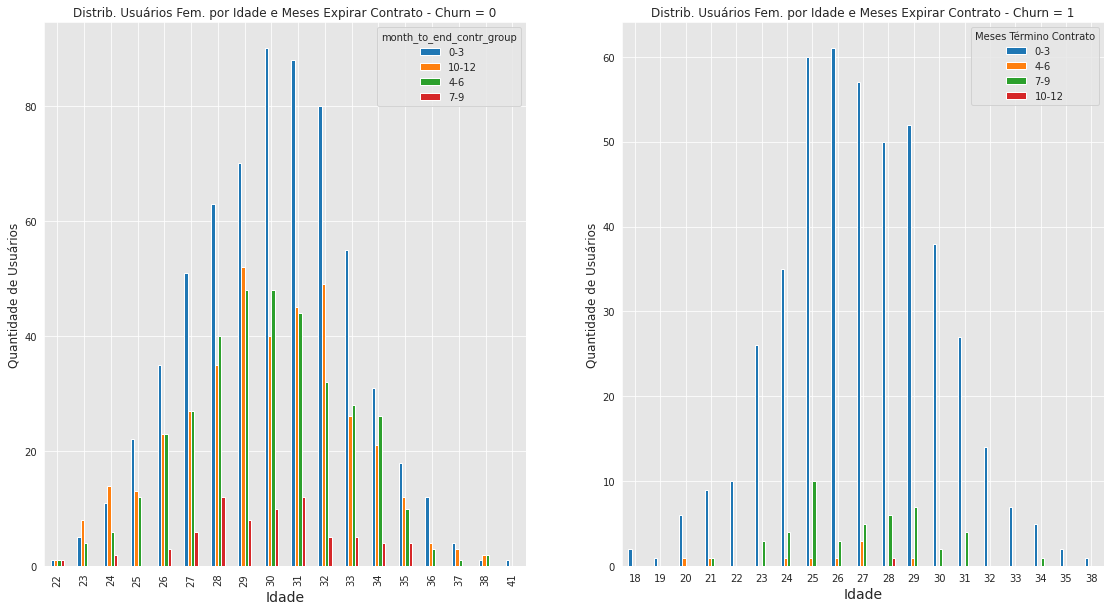

In [115]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(19,10))

gym_gender_f_end_contr[gym_gender_f_end_contr['churn'] == 0].pivot_table(index='age', columns='month_to_end_contr_group', values='churn', aggfunc='count').plot(ax=axes[0],kind='bar', grid=True)
gym_gender_f_end_contr[gym_gender_f_end_contr['churn'] == 1].pivot_table(index='age', columns='month_to_end_contr_group', values='churn', aggfunc='count').plot(ax=axes[1], kind='bar',grid=True)

axes[0].set_ylabel('Quantidade de Usuários', fontsize=12)
axes[0].set_xlabel('Idade', fontsize=14)
axes[0].set_title('Distrib. Usuários Fem. por Idade e Meses Expirar Contrato - Churn = 0', fontsize=12)

axes[1].set_ylabel('Quantidade de Usuários', fontsize=12)
axes[1].set_xlabel('Idade', fontsize=14)
axes[1].set_title('Distrib. Usuários Fem. por Idade e Meses Expirar Contrato - Churn = 1', fontsize=12)

plt.legend(['0-3','4-6','7-9','10-12'],loc='upper right', title='Meses Término Contrato',fontsize=10)
plt.xticks(rotation=0)
plt.show()

Analisando o comportamento dos usuários feminino para o mesmo tipo de gráfico, nota-se um comportamento semelhante aos usuários masculino, onde a predominância de usuários com contratos com término na faixa dos 0-3 meses. Até os 25 anos as faixas de meses de término de contrato são equivalentes e a partir dos 26 anos a faixa de contratos com término em até 3 meses se sobressai. Vale destacar que há um euilíbrio entre as faixas 4-6 meses e 7-9 meses.

Analisando os cancelamentos (churn = 1), como esperado, os usuários usuários com contratos com término na faixa dos 0-3 meses cancelam muito mais em todas as idades. Nota-se que os usuários dos contratos longos (até 12 meses) praticamente não há cancelamento, exceto entre os usuários de 26 a 28 anos. Nos cancelamentos dos contratos com com término na faixa dos 7-9 meses há uma prevalência ds usuários de 25 anos.

### Tempo de Utilização  do Serviço

In [116]:
gym_gender.drop(['month_to_end_contract','month_to_end_contr_group'], axis=1, inplace=True)
gym_gender_lifetime = gym_gender

In [117]:
gym_gender_lifetime['lifetime'] = gym['lifetime']
gym_gender_lifetime.head()

,gender_m,gender_f,churn,age,lifetime
0,1,0,0,29,3
1,0,1,0,31,7
2,0,1,0,28,2
3,0,1,0,33,2
4,1,0,0,26,3


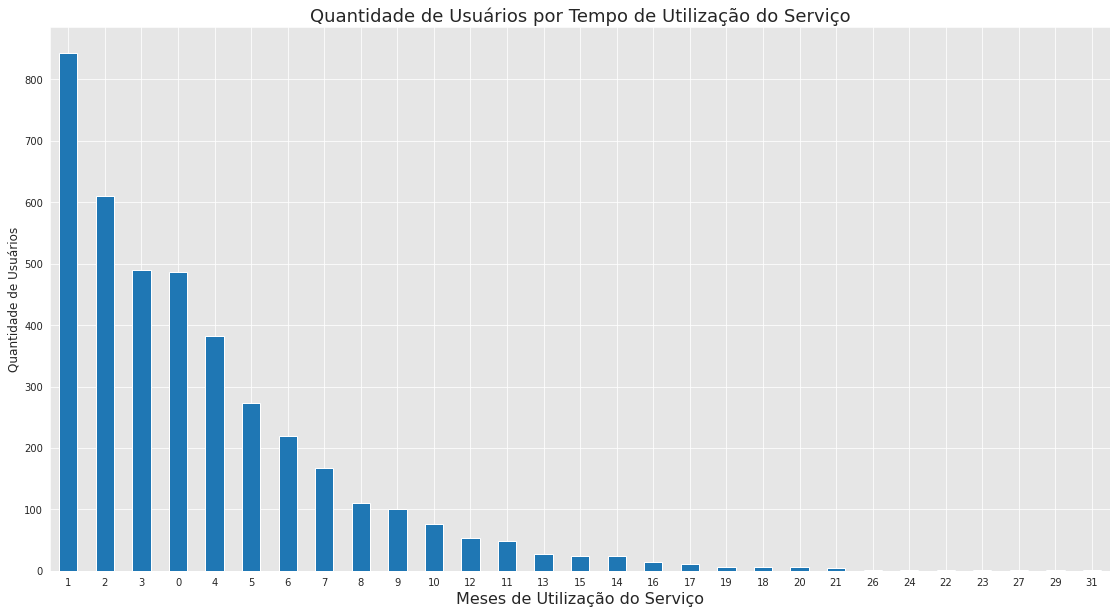

In [118]:
fig, axes = plt.subplots(figsize=(19,10))
axes = (gym_gender_lifetime['lifetime'].value_counts(ascending=False)).plot.bar()

axes.set_ylabel('Quantidade de Usuários', fontsize=12)
axes.set_xlabel('Meses de Utilização do Serviço', fontsize=16)
axes.set_title('Quantidade de Usuários por Tempo de Utilização do Serviço', fontsize=18)
plt.xticks(rotation=0)
plt.show()

Na tabela e gráfico plotados acima, nota-se a distribuição dos usuários pela quantidade de meses desde sua primeira vez na academia, ou seja, quanto tempo, em meses, o usuário se relaciona com a academia. Verifica-se a grande quantidade de usuários com tempo de relacionamento curto, onde usuários com até 5 meses de relacionamento correspondem a mais de 77% do total de todos usuários que frequentam a academia. Provavelmente seja reflexo do tipo de contrato que a grande maioria dos usuáros optam (vigñcia de até 1 mês). Isso é um problema pois com essa rotatividade alta, a fidelização do cliente fica prejudicada.

In [119]:
#Categorizando a coluna 'month_to_end_contract'
gym_gender_lifetime['lifetime_group'] = pd.cut(gym_gender_lifetime['lifetime'],[0,5,10,15,20,25,30,100],
                                               labels=['0-5','6-10','11-15','16-20','21-25','26-30','>30'])

In [120]:
#Convertendo o tipo de dado
gym_gender_lifetime['lifetime_group'] = gym_gender_lifetime['lifetime_group'].astype("object")
gym_gender_lifetime

,gender_m,gender_f,churn,age,lifetime,lifetime_group
0,1,0,0,29,3,0-5
1,0,1,0,31,7,6-10
2,0,1,0,28,2,0-5
3,0,1,0,33,2,0-5
4,1,0,0,26,3,0-5
...,...,...,...,...,...,...
3995,1,0,0,33,8,6-10
3996,0,1,1,29,1,0-5
3997,1,0,0,28,2,0-5
3998,0,1,0,32,3,0-5


In [121]:
gym_gender_lifetime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   gender_m        4000 non-null   int64 
 1   gender_f        4000 non-null   int64 
 2   churn           4000 non-null   int64 
 3   age             4000 non-null   int64 
 4   lifetime        4000 non-null   int64 
 5   lifetime_group  3513 non-null   object
dtypes: int64(5), object(1)
memory usage: 187.6+ KB


In [122]:
#Verificando os usuários por gênero
gym_gender_lifetime.groupby(['age', 'lifetime_group'])['churn'].count()

age  lifetime_group
18   0-5                1
20   0-5               12
21   0-5               13
     11-15              1
     6-10               1
                       ..
38   11-15              1
     6-10               3
39   0-5                1
     6-10               2
41   0-5                1
Name: churn, Length: 82, dtype: int64

In [123]:
#Proporção de usuários por gênero e vigência de contrato
(gym_gender_lifetime.groupby(['gender_m','churn','lifetime_group'])['gender_m'].count() / gym.shape[0])*100

gender_m  churn  lifetime_group
0         0      0-5               24.025
                 11-15              2.000
                 16-20              0.500
                 21-25              0.175
                 26-30              0.050
                 6-10               8.150
          1      0-5                7.900
                 6-10               0.050
1         0      0-5               24.650
                 11-15              2.425
                 16-20              0.675
                 21-25              0.100
                 26-30              0.050
                 6-10               8.550
                 >30                0.025
          1      0-5                8.400
                 6-10               0.100
Name: gender_m, dtype: float64

In [124]:
#Proporção de usuários por idade e vigência de contrato
(gym_gender_lifetime.groupby(['age', 'lifetime_group'])['churn'].count() / gym.shape[0])*100

age  lifetime_group
18   0-5               0.025
20   0-5               0.300
21   0-5               0.325
     11-15             0.025
     6-10              0.025
                       ...  
38   11-15             0.025
     6-10              0.075
39   0-5               0.025
     6-10              0.050
41   0-5               0.025
Name: churn, Length: 82, dtype: float64

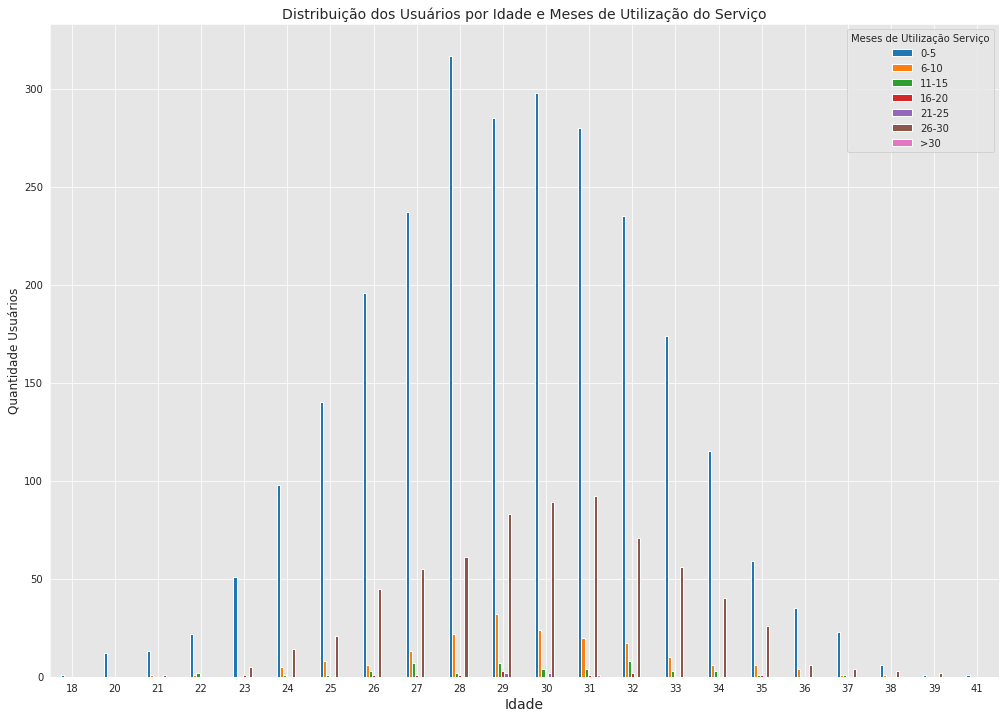

In [125]:
ax = gym_gender_lifetime.pivot_table(index='age', columns='lifetime_group', values='churn', aggfunc='count').plot.bar(figsize=(17,12))
plt.legend(['0-5','6-10','11-15','16-20','21-25','26-30','>30'],loc='upper right', title='Meses de Utilização Serviço',fontsize=10)
ax.set_ylabel('Quantidade Usuários', fontsize=12)
ax.set_xlabel('Idade', fontsize=14)
ax.set_title('Distribuição dos Usuários por Idade e Meses de Utilização do Serviço', fontsize=14)
plt.xticks(rotation=0)
plt.show()

Interessante notar no gráfico acima que, apensar de comprovar o exposto anteriormente, demonstra também que há usuários que possuem um longo tempo de utilização do serviço, indicando que possuem um longo perído de relacionamento com a academia. Os usuários em questão (faixa dos 26-30 meses) aparecem por volta dos 24 anos de idade e se extende até os 37 anos, tendo seu pico de maior quantidade de usuários a idade de 31 anos.

#### Visão geral

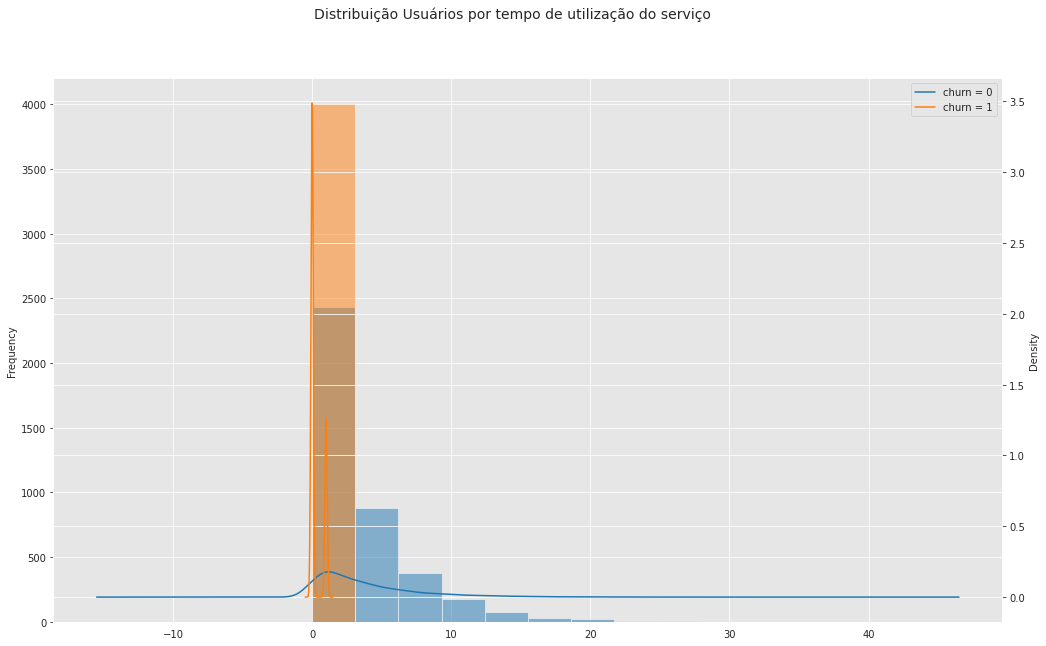

In [126]:
#Plotando as informações 'lifetime' e 'churn'

gym_lifetime = gym_gender_lifetime.copy(deep=True)
gym_lifetime = gym_lifetime.filter(['lifetime','churn'])

fig, ax = plt.subplots(figsize=(17,10))
gym_lifetime.plot.hist(ax=ax, alpha=0.5,legend=False)
ax2 = ax.twinx()
gym_lifetime.plot.kde(ax=ax2, legend=False)
plt.legend(["churn = 0", "churn = 1"], loc ="upper right")
plt.suptitle('Distribuição Usuários por tempo de utilização do serviço', fontsize=14)
plt.show()

Acima verifica-se os dados plotados entre as informações 'lifetime' e 'churn' onde nota-se  distribuição entre cancelamentos e tempo de utilização do serviço pelos usuários. Como comproado acima, percebe-se que que o cancelamento é muito maior entre os usuáris com curto tempo de utilização e os demais.

#### Separando por Gênero Masculino e Meses de Utilização do Serviço

In [127]:
#Filtrando por gênero
gym_gender_m_lifetime = gym_gender_lifetime[gym_gender_lifetime['gender_m'] == 1].reset_index()
gym_gender_m_lifetime.head()

,index,gender_m,gender_f,churn,age,lifetime,lifetime_group
0,0,1,0,0,29,3,0-5
1,4,1,0,0,26,3,0-5
2,5,1,0,0,34,3,0-5
3,6,1,0,0,32,2,0-5
4,8,1,0,0,23,1,0-5


In [128]:
gym_gender_m_lifetime[gym_gender_m_lifetime['churn'] == 0].pivot_table(index='age', columns='lifetime_group', values='churn', aggfunc='count')

lifetime_group,0-5,11-15,16-20,21-25,26-30,6-10,>30
age,,,,,,,
20,3.0,NaN,NaN,NaN,NaN,NaN,NaN
21,3.0,1.0,NaN,NaN,NaN,1.0,NaN
22,2.0,NaN,1.0,NaN,NaN,NaN,NaN
23,8.0,NaN,NaN,NaN,NaN,1.0,NaN
24,19.0,2.0,NaN,NaN,NaN,7.0,NaN
25,39.0,5.0,1.0,NaN,NaN,8.0,NaN
26,59.0,6.0,NaN,NaN,NaN,18.0,NaN
27,86.0,5.0,5.0,NaN,NaN,28.0,NaN
28,115.0,10.0,NaN,1.0,NaN,34.0,NaN


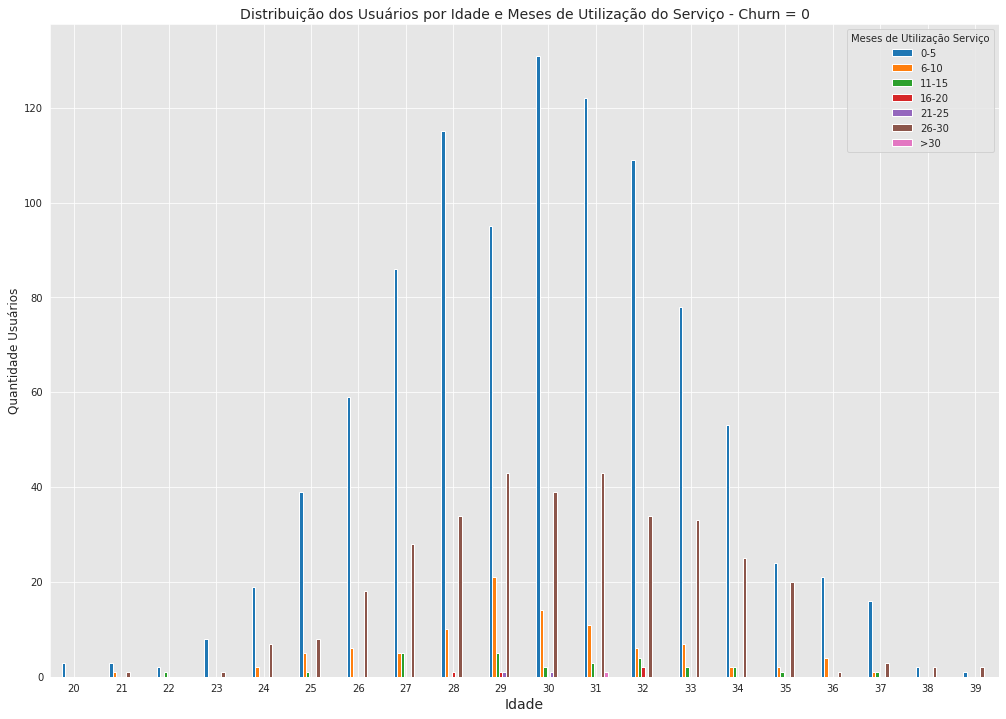

In [129]:
ax = gym_gender_m_lifetime[gym_gender_m_lifetime['churn'] == 0].pivot_table(index='age', columns='lifetime_group', values='churn', aggfunc='count').plot.bar(figsize=(17,12))
plt.legend(['0-5','6-10','11-15','16-20','21-25','26-30','>30'],loc='upper right', title='Meses de Utilização Serviço',fontsize=10)
ax.set_ylabel('Quantidade Usuários', fontsize=12)
ax.set_xlabel('Idade', fontsize=14)
ax.set_title('Distribuição dos Usuários por Idade e Meses de Utilização do Serviço - Churn = 0', fontsize=14)
plt.xticks(rotation=0)
plt.show()

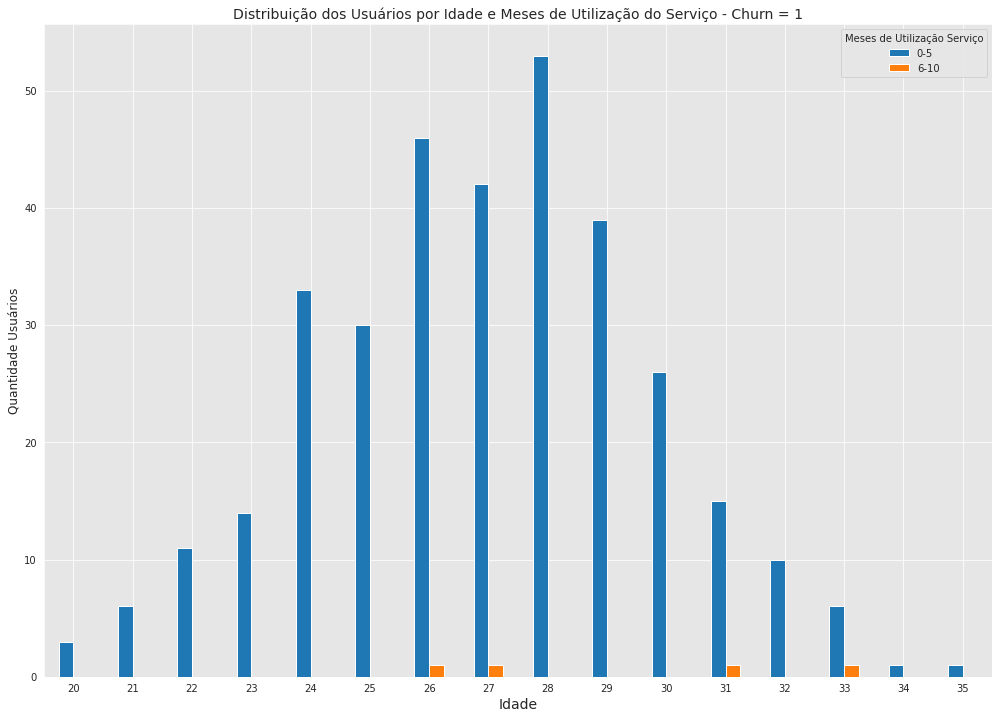

In [130]:
ax = gym_gender_m_lifetime[gym_gender_m_lifetime['churn'] == 1].pivot_table(index='age', columns='lifetime_group', values='churn', aggfunc='count').plot.bar(figsize=(17,12))
plt.legend(['0-5','6-10','11-15','16-20','21-25','26-30','>30'],loc='upper right', title='Meses de Utilização Serviço',fontsize=10)
ax.set_ylabel('Quantidade Usuários', fontsize=12)
ax.set_xlabel('Idade', fontsize=14)
ax.set_title('Distribuição dos Usuários por Idade e Meses de Utilização do Serviço - Churn = 1', fontsize=14)
plt.xticks(rotation=0)
plt.show()

Nos gráficos acima, nota-se que, além dos grupos com meses de utlização 0-5 e 26-30 expostos no tópico anterior, analisando somente os usuários masculino (churn = 0), percebe-se também uma concentração dos usuários com meses de utilização 26-30, nos usuários com idade de 29 anos (pico). A faixa de 6-10 meses de utilização aparece em terceiro lugar, tendo também seu pico a idade de 29 anos.

Já para os usuários masculino que efetuaram o cancelamento (churn = 1), nota-se que praticamente todos são de utilização curta de meses (0-3), onde o pico aparece na idade de 28 anos e vai até os 35. Aparecem alguns poucos usuários com meses de utilização de 6-10 distribuidos ente 26-27 e 31 e 33 anos.

#### Separando por Gênero Feminino e Meses de Utilização do Serviço

In [131]:
#Filtrando por gênero
gym_gender_f_lifetime = gym_gender_lifetime[gym_gender_lifetime['gender_f'] == 1].reset_index()
gym_gender_f_lifetime.head()

,index,gender_m,gender_f,churn,age,lifetime,lifetime_group
0,1,0,1,0,31,7,6-10
1,2,0,1,0,28,2,0-5
2,3,0,1,0,33,2,0-5
3,7,0,1,1,30,0,NaN
4,9,0,1,0,31,11,11-15


In [132]:
gym_gender_f_lifetime[gym_gender_f_lifetime['churn'] == 0].pivot_table(index='age', columns='lifetime_group', values='churn', aggfunc='count')

lifetime_group,0-5,11-15,16-20,21-25,26-30,6-10
age,,,,,,
22,2.0,1.0,1.0,NaN,NaN,NaN
23,12.0,NaN,NaN,1.0,NaN,4.0
24,21.0,3.0,1.0,NaN,NaN,7.0
25,30.0,3.0,NaN,NaN,NaN,13.0
26,52.0,NaN,3.0,1.0,NaN,26.0
27,70.0,8.0,2.0,1.0,NaN,26.0
28,106.0,12.0,2.0,NaN,NaN,27.0
29,118.0,11.0,2.0,2.0,1.0,40.0
30,118.0,10.0,2.0,NaN,1.0,48.0


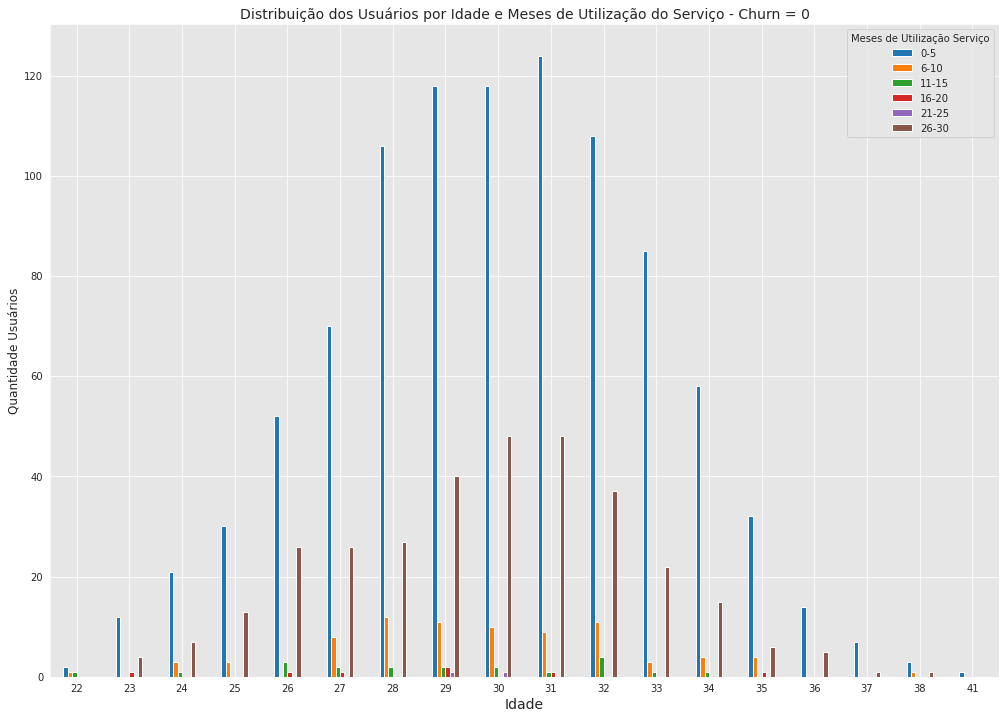

In [133]:
#Plotando o gráfico da quantidade de usuários por idade
ax = gym_gender_f_lifetime[gym_gender_f_lifetime['churn'] == 0].pivot_table(index='age', columns='lifetime_group', values='churn', aggfunc='count').plot.bar(figsize=(17,12))
plt.legend(['0-5','6-10','11-15','16-20','21-25','26-30','>30'],loc='upper right', title='Meses de Utilização Serviço',fontsize=10)
ax.set_ylabel('Quantidade Usuários', fontsize=12)
ax.set_xlabel('Idade', fontsize=14)
ax.set_title('Distribuição dos Usuários por Idade e Meses de Utilização do Serviço - Churn = 0', fontsize=14)
plt.xticks(rotation=0)
plt.show()

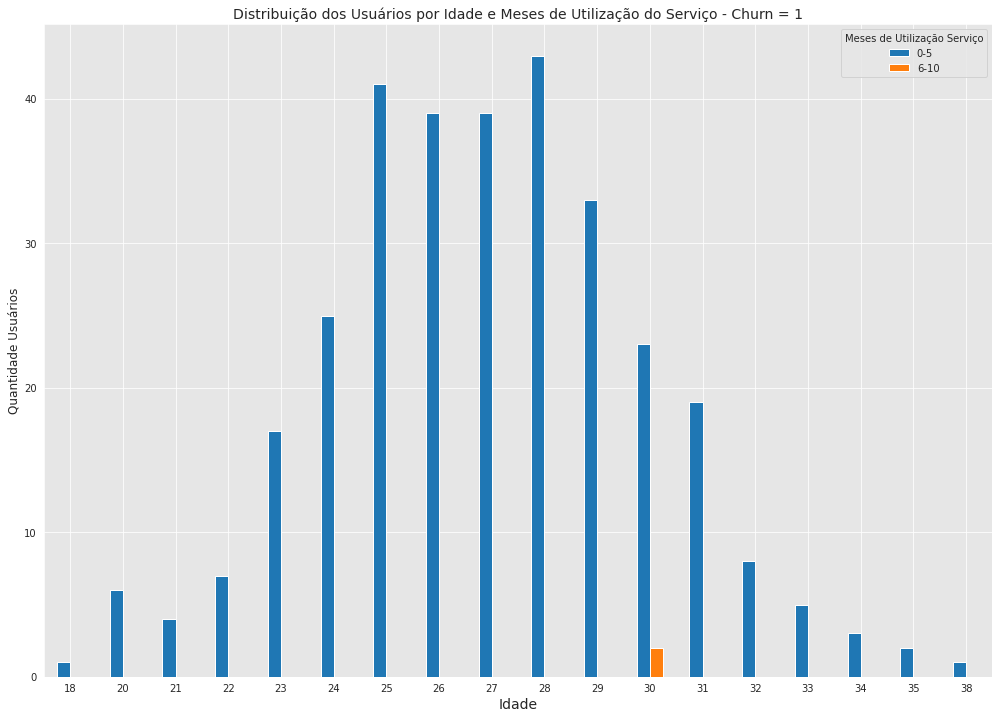

In [134]:
ax = gym_gender_f_lifetime[gym_gender_f_lifetime['churn'] == 1].pivot_table(index='age', columns='lifetime_group', values='churn', aggfunc='count').plot.bar(figsize=(17,12))
plt.legend(['0-5','6-10','11-15','16-20','21-25','26-30','>30'],loc='upper right', title='Meses de Utilização Serviço',fontsize=10)
ax.set_ylabel('Quantidade Usuários', fontsize=12)
ax.set_xlabel('Idade', fontsize=14)
ax.set_title('Distribuição dos Usuários por Idade e Meses de Utilização do Serviço - Churn = 1', fontsize=14)
plt.xticks(rotation=0)
plt.show()

Nos gráficos acima, nota-se que, além dos grupos com meses de utlização 0-5 e 26-30 expostos no tópico anterior, analisando somente os usuários feminino (churn = 0), nota-se uma distribuição maior entre as idades dos usuários com meses de utilização na faixa dos 26-30, como pico de quantidade de usuários entre 29 e 30 anos. O mesmo comportamento verifica-se entre os usuários com meses de utilização na faixa dos 6-10.

Já para os usuários feminino que efetuaram o cancelamento (churn = 1), nota-se que praticamente todos são de utilização curta de meses (0-3), onde o pico também aparece na idade de 28 anos. Aparecem alguns poucos usuários com meses de utilização de 6-10 com idade de 30 anos.

### Valor médio gasto pelos usuários em outros serviços

In [135]:
gym_gender.drop(['lifetime','lifetime_group'], axis=1, inplace=True)
gym_gender_avg_add = gym_gender

In [136]:
gym_gender_avg_add['avg_additional_charges_total'] = gym['avg_additional_charges_total']
gym_gender_avg_add

,gender_m,gender_f,churn,age,avg_additional_charges_total
0,1,0,0,29,14.227470
1,0,1,0,31,113.202938
2,0,1,0,28,129.448479
3,0,1,0,33,62.669863
4,1,0,0,26,198.362265
...,...,...,...,...,...
3995,1,0,0,33,2.406023
3996,0,1,1,29,68.883764
3997,1,0,0,28,78.250542
3998,0,1,0,32,61.912657


In [137]:
gym_gender_avg_add_median = gym_gender_avg_add.groupby('age')['avg_additional_charges_total'].median()
gym_gender_avg_add_median

age
18     50.069391
19    205.780268
20    143.788238
21    132.714926
22    118.584622
23    104.265793
24    114.497261
25    129.067453
26    130.556276
27    134.895767
28    128.578941
29    124.201439
30    143.431024
31    140.057373
32    151.678559
33    147.134117
34    136.782280
35    160.682233
36    170.938327
37    188.764657
38    123.045465
39    140.829270
41    310.463578
Name: avg_additional_charges_total, dtype: float64

In [138]:

gym_av_sum1 = pd.crosstab(index = gym_gender_avg_add.age,
columns = gym_gender_avg_add['gender_m'], values=gym_gender_avg_add.avg_additional_charges_total, aggfunc='mean',normalize='columns') *100
gym_av_sum1

gender_m,0,1
age,,
18,1.549869,0.000000
19,5.041650,7.432169
20,3.242346,5.706332
21,5.208077,3.913721
22,3.740910,3.523812
23,4.053524,3.318443
24,3.366860,4.250583
25,4.386443,4.127870
26,4.188537,4.474141


Acima verifica-se a distribuição percentual dos gastos diversos dos usuários por idade e gênero (gender_0 = Feminino / gender_1 = Masculino) onde nota-se que o maior percentual de gastos está na faixa dos 27 a 32 anos, tanto feminino como masculino.

In [139]:
gym_av_sum2 = pd.crosstab(index = gym_gender_avg_add.age,
columns = gym_gender_avg_add['gender_m'], values=gym_gender_avg_add.avg_additional_charges_total, aggfunc='sum',normalize='index') *100
gym_av_sum2

gender_m,0,1
age,,
18,100.000000,0.000000
19,39.574580,60.425420
20,35.424811,64.575189
21,52.087019,47.912981
22,43.027369,56.972631
23,60.110583,39.889417
24,42.672079,57.327921
25,51.722204,48.277796
26,47.142242,52.857758


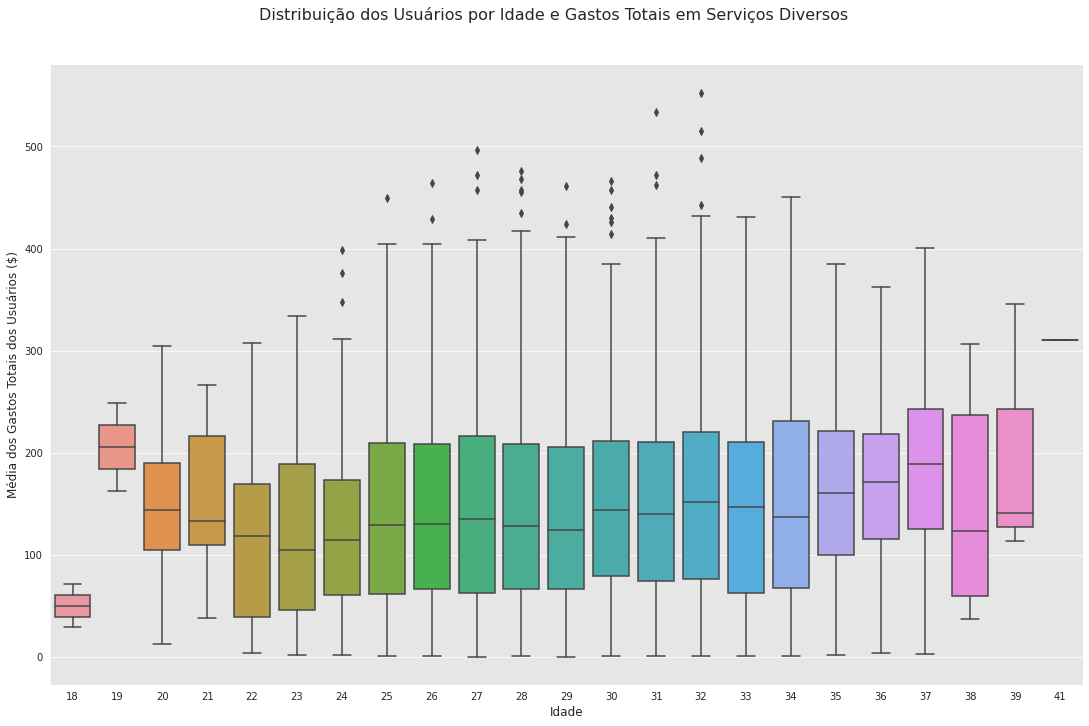

In [140]:
z = sns.catplot(data=gym, x="age", y="avg_additional_charges_total", kind="box", height=10, aspect=1.5)
z.set_ylabels('Média dos Gastos Totais dos Usuários ($)', fontsize=12)
z.set_xlabels('Idade', fontsize=12)
z.fig.subplots_adjust(top=0.9)
z.fig.suptitle('Distribuição dos Usuários por Idade e Gastos Totais em Serviços Diversos', fontsize=16)
plt.show()

A mesma análise acima agora é feita porém verificando os percentuais de gastos por gênero (gender_0 = Feminino / gender_1 = Masculino) em cada uma das idades. Algumas obervações importantes:

   - analisando toda a faixa de idades dos usuários (18-41), em 7 as mulheres apresentam um percentuam de gastos maior do que os homens;
   - nas idades de 18 e 41 anos 100% dos gastos são feitos por mulheres;
   - dos 27 aos 32 anos onde há o maior percentual de gastos em toda faixa etária, há um equilíbrio percentual de gastos entre os gêneros;
   - exluindo os extremos (18 e 41 anos) as maiores diferenças percentuais entre os gêneros estão nas faixas: 19,20 e 37 anos a favor dos homens e 23 anos a favor das mulheres
   
No gráfico tipo boxplot acima, verifica-se também a distribuição dos percentuais de gastos em cada idade dos usuários. Nota-se que até os 24 anos, há uma grande variação de gastos entre as idades. A partir dos 25 anos até 36 anos, cerca de 75% dos usuários gastaram pouco mais de 200.00 e acima dos 37, os gastos de 75% dos usuários são acima de 250.00. Interessante notar também que todos os outliers que aparecem no gráfico estão entre as idades de 24 a 32 anos.

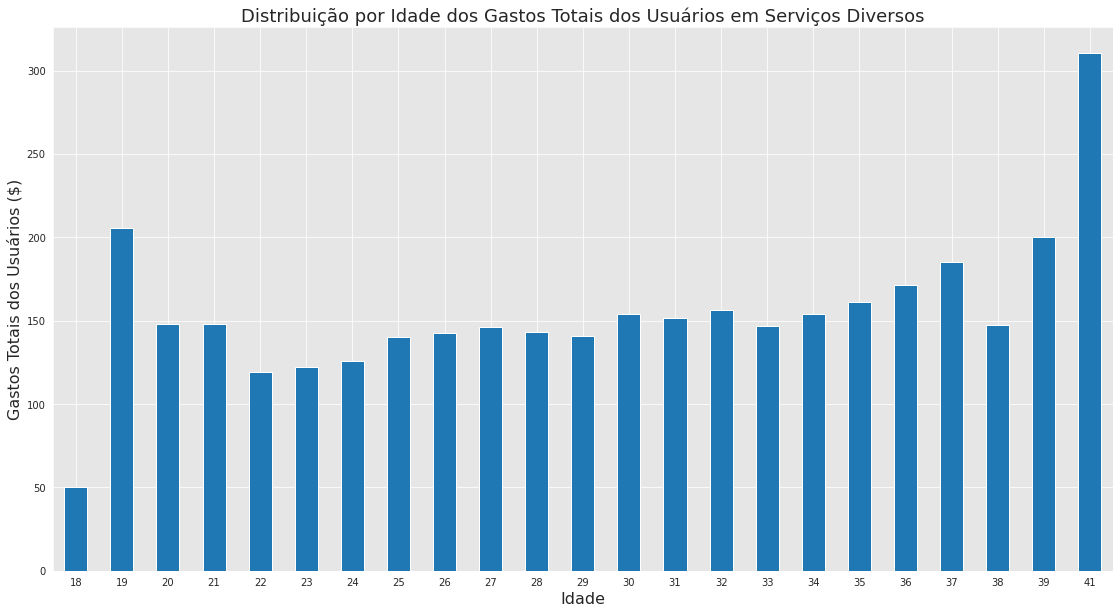

In [141]:
fig, axes = plt.subplots(figsize=(19,10))
axes = (gym_gender_avg_add.groupby(['age'])['avg_additional_charges_total'].mean()).plot.bar()

axes.set_ylabel('Gastos Totais dos Usuários ($)', fontsize=16)
axes.set_xlabel('Idade', fontsize=16)
axes.set_title('Distribuição por Idade dos Gastos Totais dos Usuários em Serviços Diversos', fontsize=18)
plt.xticks(rotation=0)
plt.show()

Acima nota-se a distribuição por idade do total de gastos dos usuários com outros serviços na academia. Verifica-se que os que mais gastam com serviços adicionais são usuários na faixa dos 27 a 32 anos, complementando a análise acima exposta com as tabelas

#### Visão geral

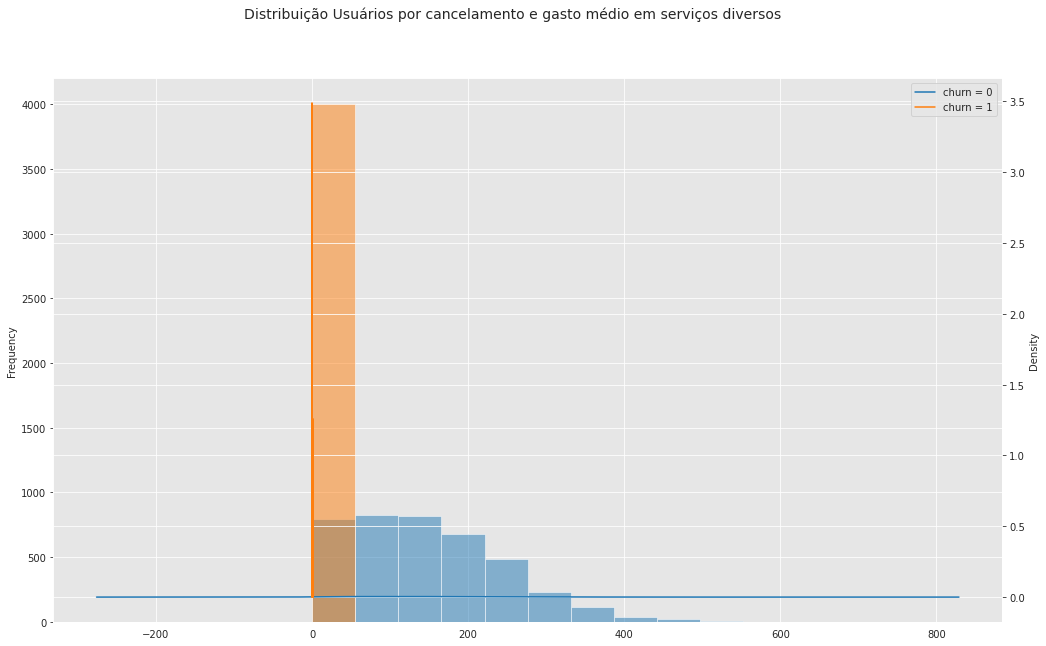

In [142]:
#Plotando as informações 'avg_additional_charges_total' e 'churn'

gym_avg_add = gym_gender_avg_add.copy(deep=True)
gym_avg_add = gym_avg_add.filter(['avg_additional_charges_total','churn'])

fig, ax = plt.subplots(figsize=(17,10))
gym_avg_add.plot.hist(ax=ax, alpha=0.5,legend=False)
ax2 = ax.twinx()
gym_avg_add.plot.kde(ax=ax2, legend=False)
plt.legend(["churn = 0", "churn = 1"], loc ="upper right")
plt.suptitle('Distribuição Usuários por cancelamento e gasto médio em serviços diversos', fontsize=14)
plt.show()

Acima verifica-se os dados plotados entre as informações 'avg_additional_charges_total' e 'churn' onde nota-se  distribuição entre cancelamentos e gasto médio em serviços diversos.Percebe-se que os cancelaments se concentram praticamente nos usuários com gastos em torno de 50.0

#### Separando por Gênero  e Gastos Diversos

In [143]:
gym_gender_m_avg_add = gym_gender_avg_add[gym_gender_avg_add['gender_m'] == 1]
gym_gender_m_avg_add

,gender_m,gender_f,churn,age,avg_additional_charges_total
0,1,0,0,29,14.227470
4,1,0,0,26,198.362265
5,1,0,0,34,450.743960
6,1,0,0,32,94.266389
8,1,0,0,23,45.409909
...,...,...,...,...,...
3991,1,0,0,33,69.301270
3994,1,0,1,26,31.066721
3995,1,0,0,33,2.406023
3997,1,0,0,28,78.250542


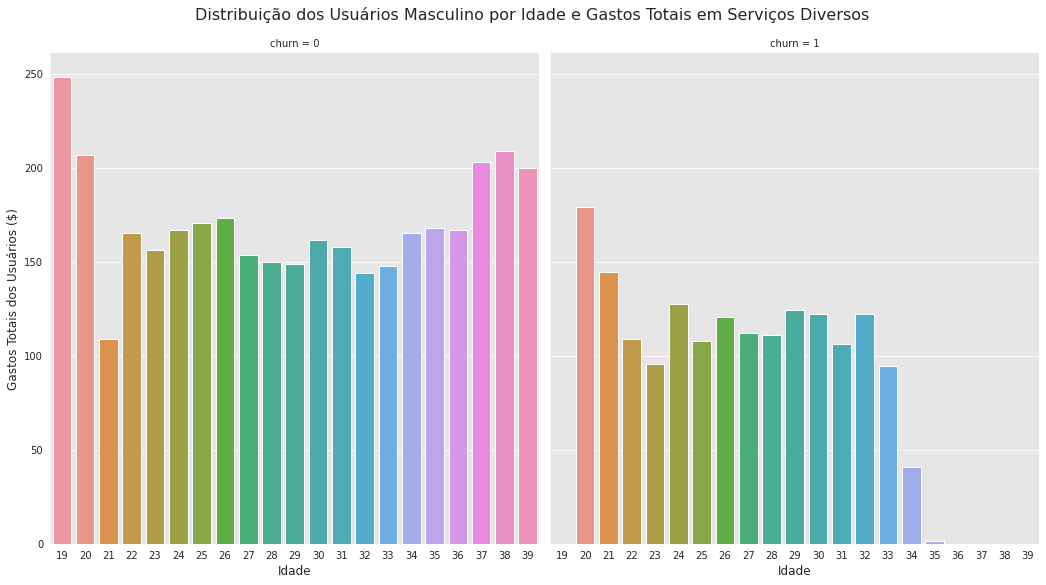

In [144]:
gym_gender_m_avg_add = gym_gender_avg_add[gym_gender_avg_add['gender_m'] == 1].groupby(['age','churn'])['avg_additional_charges_total'].mean().reset_index()

a = sns.catplot(data=gym_gender_m_avg_add, x="age", y="avg_additional_charges_total", col="churn",kind="bar", height=8, aspect=.9)
a.set_ylabels('Gastos Totais dos Usuários ($)', fontsize=12)
a.set_xlabels('Idade', fontsize=12)
a.fig.subplots_adjust(top=0.9)
a.fig.suptitle('Distribuição dos Usuários Masculino por Idade e Gastos Totais em Serviços Diversos', fontsize=16)
plt.show()

Reforçando o exposto acima, para os usuários d sexo masculino que não efetuaram o cancelamento (churn = 0) os maiores gastos estão concentrados na faixa dos 28 a 32 anos, com os extremos apresentando baixíssimos valores. Já para os usuários que cancelaram o plano (churn=1) os maiores gastos estão na faixa dos 24 a 30 anos, sendo que a partir dos 34 anos aparentemente não há gastos com os serviços diversos.

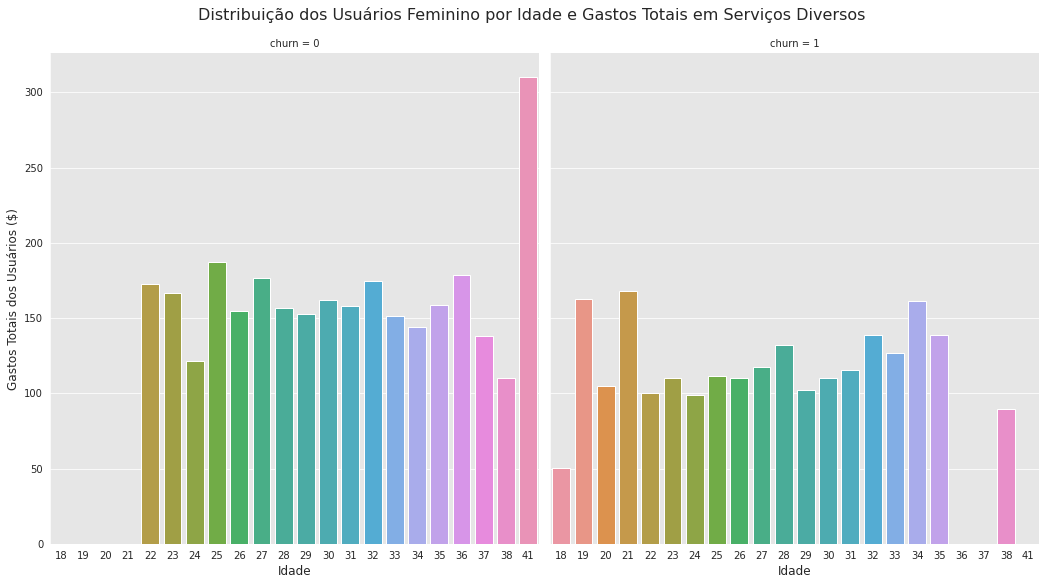

In [145]:

gym_gender_f_avg_add = gym_gender_avg_add[gym_gender_avg_add['gender_f'] == 1].groupby(['age','churn'])['avg_additional_charges_total'].mean().reset_index()

a = sns.catplot(data=gym_gender_f_avg_add, x="age", y="avg_additional_charges_total", col="churn",kind="bar", height=8, aspect=.9)
a.set_ylabels('Gastos Totais dos Usuários ($)', fontsize=12)
a.set_xlabels('Idade', fontsize=12)
a.fig.subplots_adjust(top=0.9)
a.fig.suptitle('Distribuição dos Usuários Feminino por Idade e Gastos Totais em Serviços Diversos', fontsize=16)
plt.show()

Reforçando o exposto acima, para s usuários do sexo feminino que não efetuaram o cancelamento (churn = 0) os maiores gastos também se concentram na faixa dos 28 a 32 anos, não apresentando valores entre as idades 8 a 21 anos. Já para os usuários que cancelaram o plano (churn=1) os maiores gastos estão na faixa dos 25 a 29 anos, sendo que a partir dos 34 anos aparentemente não há gastos com serviços diversos.

In [146]:
gym_gender

,gender_m,gender_f,churn,age,avg_additional_charges_total
0,1,0,0,29,14.227470
1,0,1,0,31,113.202938
2,0,1,0,28,129.448479
3,0,1,0,33,62.669863
4,1,0,0,26,198.362265
...,...,...,...,...,...
3995,1,0,0,33,2.406023
3996,0,1,1,29,68.883764
3997,1,0,0,28,78.250542
3998,0,1,0,32,61.912657


### Frequencia Média Semanal no Mês

In [147]:
gym_gender.drop(['avg_additional_charges_total'], axis=1, inplace=True)
gym_gender_avg_fr_month = gym_gender

In [148]:
gym_gender_avg_fr_month['avg_class_freq_current_month'] = gym['avg_class_freq_current_month']
gym_gender_avg_fr_month.head()

,gender_m,gender_f,churn,age,avg_class_freq_current_month
0,1,0,0,29,0.000000
1,0,1,0,31,1.910244
2,0,1,0,28,1.736502
3,0,1,0,33,3.357215
4,1,0,0,26,1.120078


In [149]:
gym_gender_avg_fr_month.groupby(['age'])['avg_class_freq_current_month'].mean()

age
18    0.554865
19    0.538681
20    1.234164
21    1.451620
22    1.314050
23    1.325708
24    1.353877
25    1.477850
26    1.544185
27    1.647479
28    1.782789
29    1.763398
30    1.865762
31    1.933900
32    1.894747
33    1.883541
34    1.966047
35    2.136517
36    2.285009
37    2.031153
38    2.269632
39    3.511051
41    0.420895
Name: avg_class_freq_current_month, dtype: float64

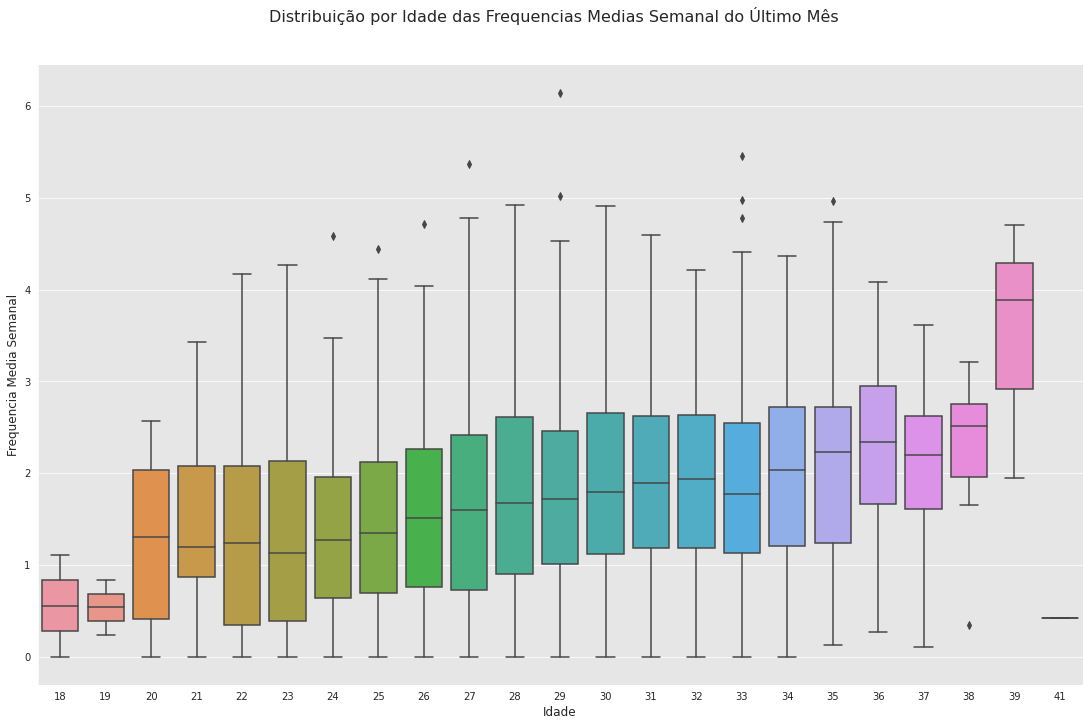

In [150]:
z = sns.catplot(data=gym, x="age", y="avg_class_freq_current_month", kind="box", height=10, aspect=1.5)
z.set_ylabels('Frequencia Media Semanal', fontsize=12)
z.set_xlabels('Idade', fontsize=12)
z.fig.subplots_adjust(top=0.9)
z.fig.suptitle('Distribuição por Idade das Frequencias Medias Semanal do Último Mês', fontsize=16)
plt.show()

No gráfico tipo boxplot acima, verifica-se distribuição de frequencia media semanal em cada idade dos usuários. Nota-se que até os 24 anos, há uma grande variação de gastos entre as idades. A partir dos 25 anos até 36 anos, cerca de 75% dos usuários gastaram pouco mais de 200.00 e acima dos 37, os gastos de 75% dos usuários são acima de 250.00. Interessante notar também que todos os outliers que aparecem no gráfico estão entre as idades de 24 a 32 anos. Nota-se que dos 20 aos 24 anos, cerca de 75% dos usuários nessa faixa de idade frequentam a academia até 2x/semana. A partir dessa idade as frequencias medias crescem ao longo das idades e dos 30 aos 34 tingem uma estabilidade entre essas idades, com frequencia media acima de 2,5x/semana. A idade mais consistente é 39 anos com 75% dos usuários com frequencia próximo a 4x/semana.  

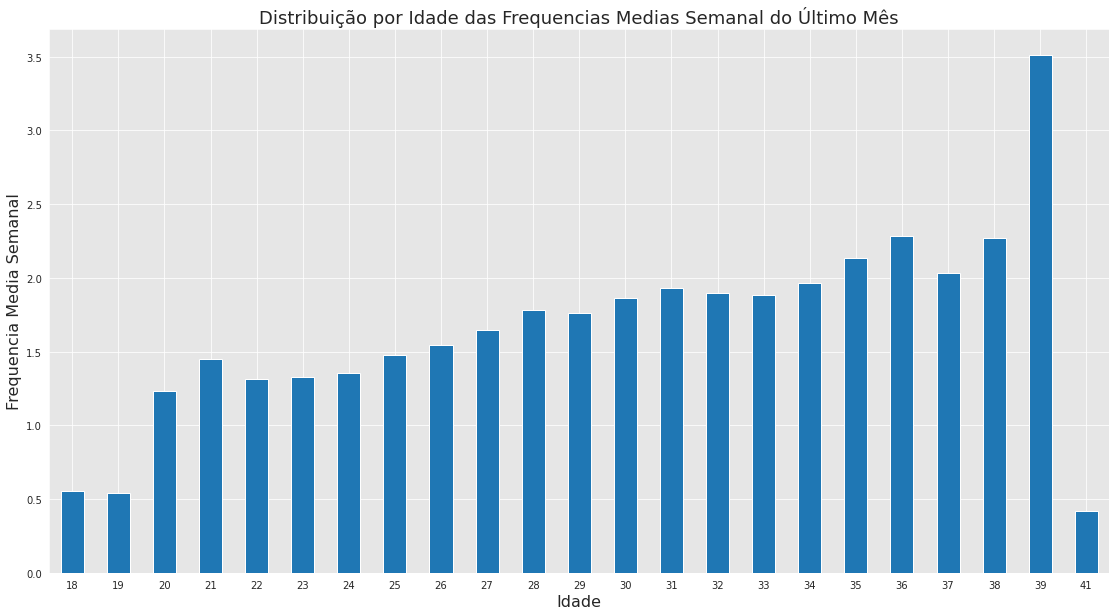

In [151]:
#Plotando a Distribuição por Idade das Frequencias Medias Semanal do Último Mês
fig, axes = plt.subplots(figsize=(19,10))
axes = (gym_gender_avg_fr_month.groupby(['age'])['avg_class_freq_current_month'].mean()).plot.bar()

axes.set_ylabel('Frequencia Media Semanal', fontsize=16)
axes.set_xlabel('Idade', fontsize=16)
axes.set_title('Distribuição por Idade das Frequencias Medias Semanal do Último Mês', fontsize=18)
plt.xticks(rotation=0)
plt.show()

O gráfico acima reitera o exposto no boxplot com relação às frequencias médias dos usuários por idade. Nota-se mos extremos as idades 18 e 19 com frequencias semanais bem baixas enquanto os usuários de 39 anos com frequencias médias acima dos 3.5x/semana. 

#### Visão geral

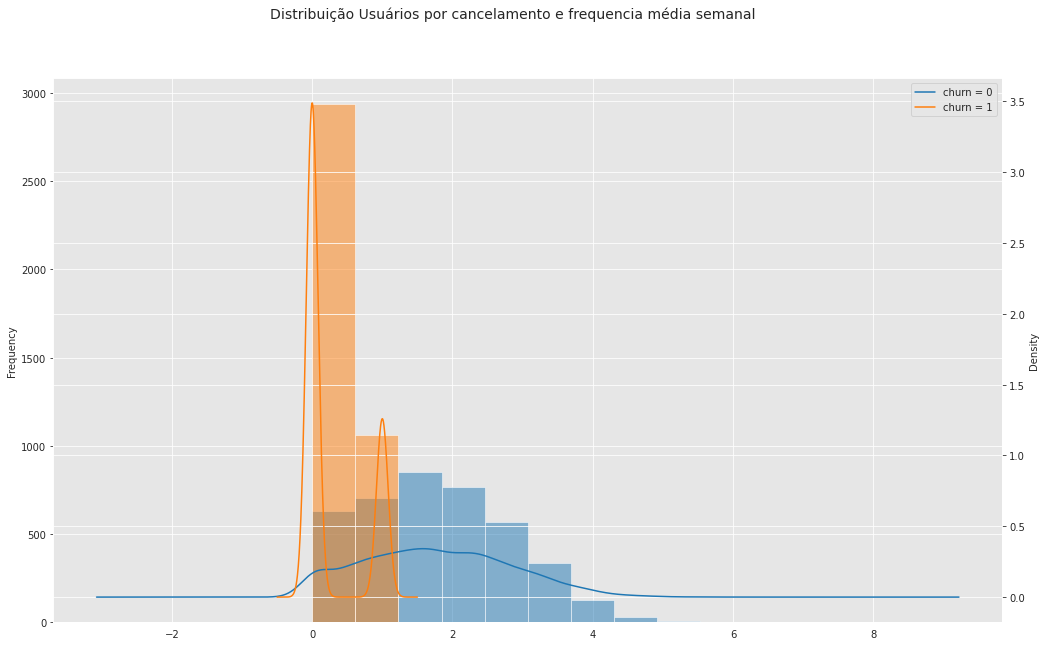

In [152]:
#Plotando as informações 'avg_class_freq_current_month' e 'churn'

gym_avg_fr = gym_gender_avg_fr_month.copy(deep=True)
gym_avg_fr = gym_avg_fr.filter(['avg_class_freq_current_month','churn'])

fig, ax = plt.subplots(figsize=(17,10))
gym_avg_fr.plot.hist(ax=ax, alpha=0.5,legend=False)
ax2 = ax.twinx()
gym_avg_fr.plot.kde(ax=ax2, legend=False)
plt.legend(["churn = 0", "churn = 1"], loc ="upper right")
plt.suptitle('Distribuição Usuários por cancelamento e frequencia média semanal', fontsize=14)
plt.show()

Acima verifica-se os dados plotados entre as informações 'avg_additional_charges_total' e 'churn' onde nota-se  distribuição entre cancelamentos e frequencia média semanal dos usuários. Percebe-se que os cancelaments se concentram praticamente nos usuários com frequencia entre 1x e 1,5x por semana.

#### Separando por Gênero Masculino e Frequencia Média Semanal do Mês

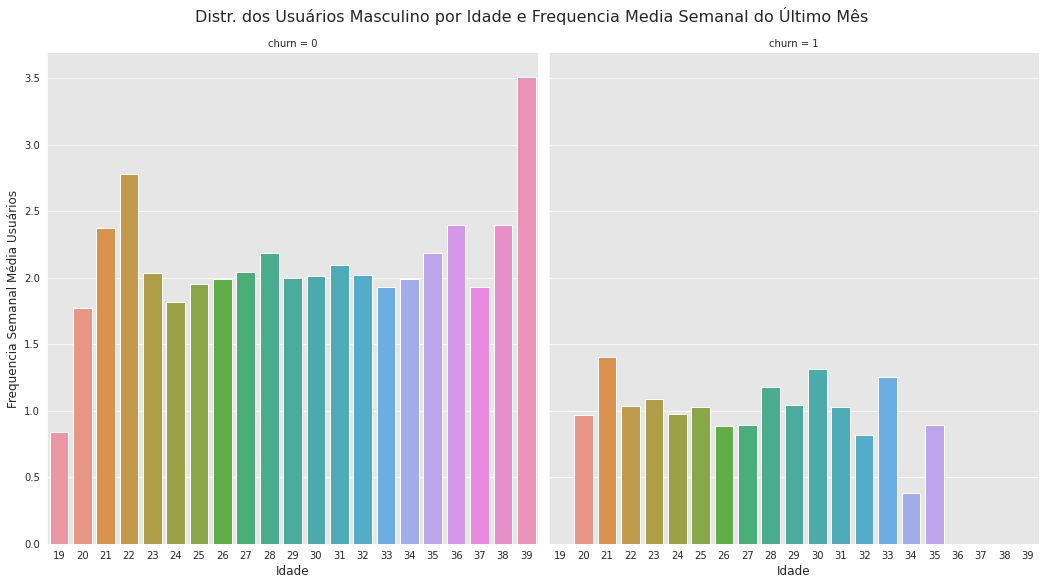

In [153]:
#Plotando a Distribuição por Idade das Frequencias Medias Semanal do Último Mês por Gênero
gym_gender_m_avg_fr_month = gym_gender_avg_fr_month[gym_gender_avg_fr_month['gender_m'] == 1].groupby(['age','churn'])['avg_class_freq_current_month'].mean().reset_index()

a = sns.catplot(data=gym_gender_m_avg_fr_month, x="age", y="avg_class_freq_current_month", col="churn",kind="bar", height=8, aspect=.9)
a.set_ylabels('Frequencia Semanal Média Usuários', fontsize=12)
a.set_xlabels('Idade', fontsize=12)
a.fig.subplots_adjust(top=0.9)
a.fig.suptitle('Distr. dos Usuários Masculino por Idade e Frequencia Media Semanal do Último Mês', fontsize=16)
plt.show()

Acima nota-se a distribuição de frequencia média semanal masculina por idade. Para churn = 0, as idades com maior frequencia são 22 anos e 39 anos. A partir dos 23 anos há um equilíbrio das idades em torno de 2x/semana de frequencia. Para churn = 1, boa parte dos usuários estão com frequencia média semanal abaixo de 1, à exceção das idades de 21, 30 e 33 anos com frequencia média semanal acima de 1.

#### Separando por Gênero Feminino e Frequencia Média Semanal do Mês

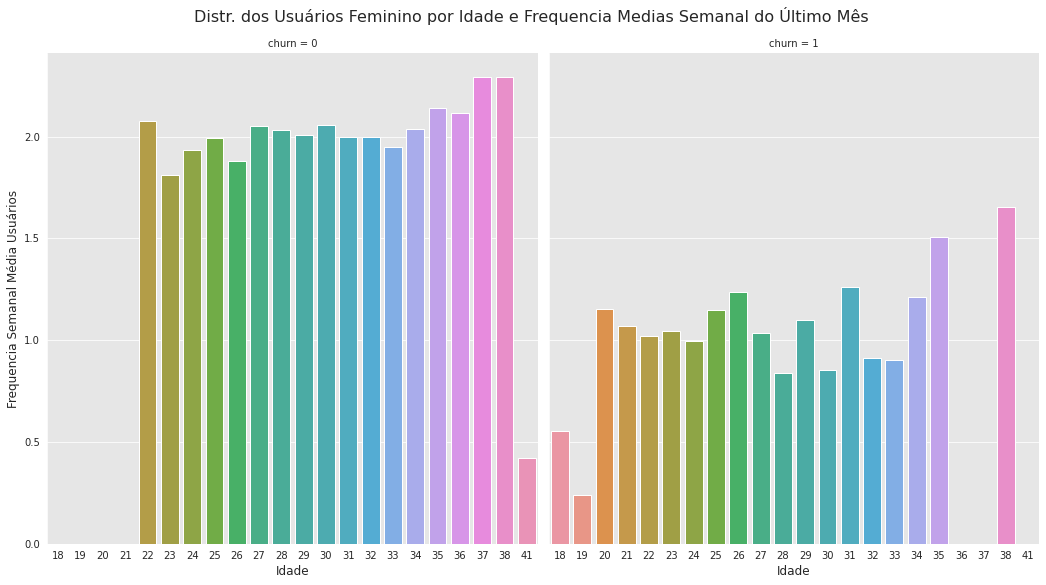

In [154]:
#Plotando a Distribuição por Idade das Frequencias Medias Semanal do Último Mês por Gênero
gym_gender_f_avg_fr_month = gym_gender_avg_fr_month[gym_gender_avg_fr_month['gender_f'] == 1].groupby(['age','churn'])['avg_class_freq_current_month'].mean().reset_index()

a = sns.catplot(data=gym_gender_f_avg_fr_month, x="age", y="avg_class_freq_current_month", col="churn",kind="bar", height=8, aspect=.9)
a.set_ylabels('Frequencia Semanal Média Usuários', fontsize=12)
a.set_xlabels('Idade', fontsize=12)
a.fig.subplots_adjust(top=0.9)
a.fig.suptitle('Distr. dos Usuários Feminino por Idade e Frequencia Medias Semanal do Último Mês', fontsize=16)
plt.show()

Acima nota-se a distribuição de frequencia média semanal feminina por idade. Para churn = 0, as idades com maior frequencia são 37 e 38 anos. Não há registro de frequencia semanal das idades abaixo de 22 anos. A partir dos 28 anos há um equilíbrio das idades em torno de 2x/semana de frequencia. Para churn = 1, boa parte dos usuários estão com frequencia média semanal  abaixo de 1, à exceção das idades de 35 e 38 anos com frequencia média semanal acima de 1,5.

### Frequencia Media Semanal no Período Total

In [155]:
gym_gender.drop(['avg_class_freq_current_month'], axis=1, inplace=True)
gym_gender_avg_fr_total = gym_gender

In [156]:
gym_gender_avg_fr_total['avg_class_freq_total'] = gym['avg_class_freq_total']
gym_gender_avg_fr_total.head()

,gender_m,gender_f,churn,age,avg_class_freq_total
0,1,0,0,29,0.020398
1,0,1,0,31,1.922936
2,0,1,0,28,1.859098
3,0,1,0,33,3.205633
4,1,0,0,26,1.113884


In [157]:
#Plotando a média de frequencia por idade
gym_gender_avg_fr_total.groupby(['age'])['avg_class_freq_total'].mean()

age
18    1.489293
19    0.912781
20    1.469230
21    1.712852
22    1.717386
23    1.578089
24    1.648408
25    1.712620
26    1.734091
27    1.790998
28    1.905408
29    1.873522
30    1.933018
31    1.996705
32    1.941277
33    1.909816
34    2.000774
35    2.133370
36    2.260894
37    2.006299
38    2.383187
39    3.452054
41    0.324260
Name: avg_class_freq_total, dtype: float64

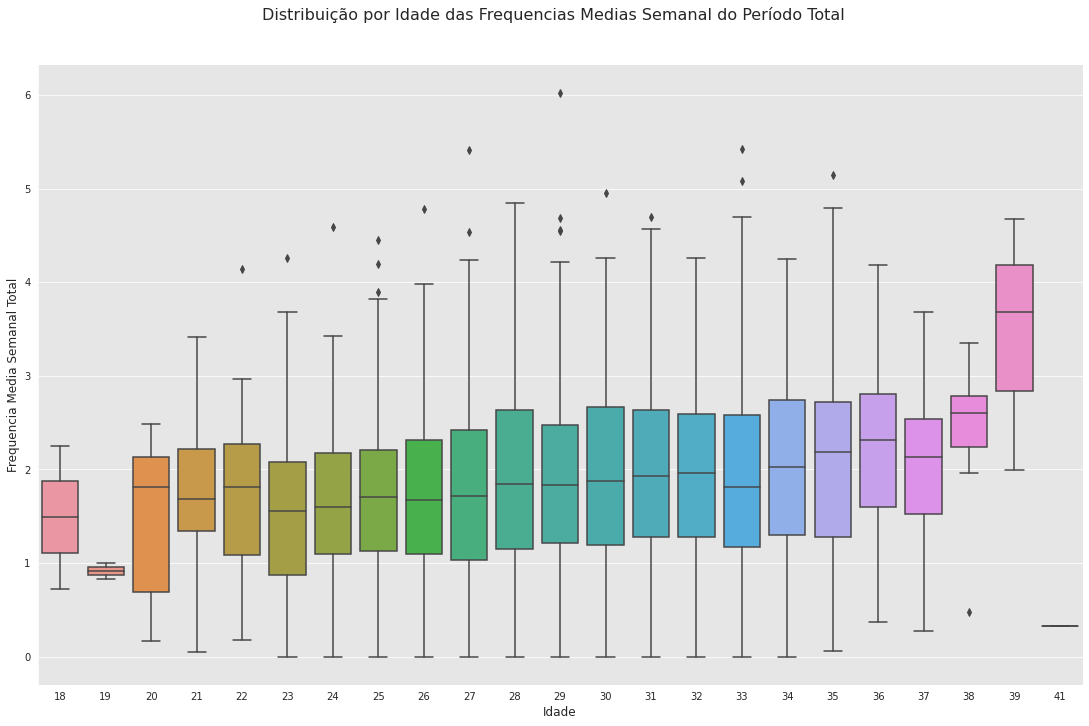

In [158]:
z = sns.catplot(data=gym, x="age", y="avg_class_freq_total", kind="box", height=10, aspect=1.5)
z.set_ylabels('Frequencia Media Semanal Total', fontsize=12)
z.set_xlabels('Idade', fontsize=12)
z.fig.subplots_adjust(top=0.9)
z.fig.suptitle('Distribuição por Idade das Frequencias Medias Semanal do Período Total', fontsize=16)
plt.show()

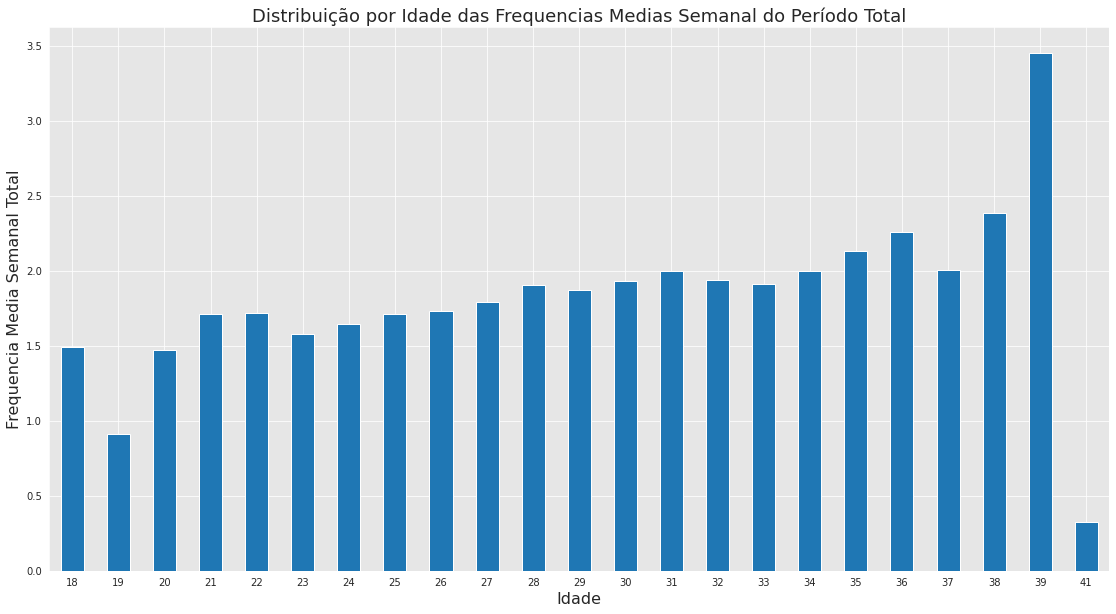

In [159]:
fig, axes = plt.subplots(figsize=(19,10))
axes = (gym_gender_avg_fr_total.groupby(['age'])['avg_class_freq_total'].mean()).plot.bar()

axes.set_ylabel('Frequencia Media Semanal Total', fontsize=16)
axes.set_xlabel('Idade', fontsize=16)
axes.set_title('Distribuição por Idade das Frequencias Medias Semanal do Período Total', fontsize=18)
plt.xticks(rotation=0)
plt.show()

De acordo com o gráfico boxplot acima plotado das frequencias médias totais por idade, erifica-se  comportamento de frequencia percentual dos usuários. Nota-se uma grande variação dos percentuais dos 18 aos 22 anos, onde 50% dos usuários possuem frequencia média em torno de 1,5x/semana. A

#### Visão geral

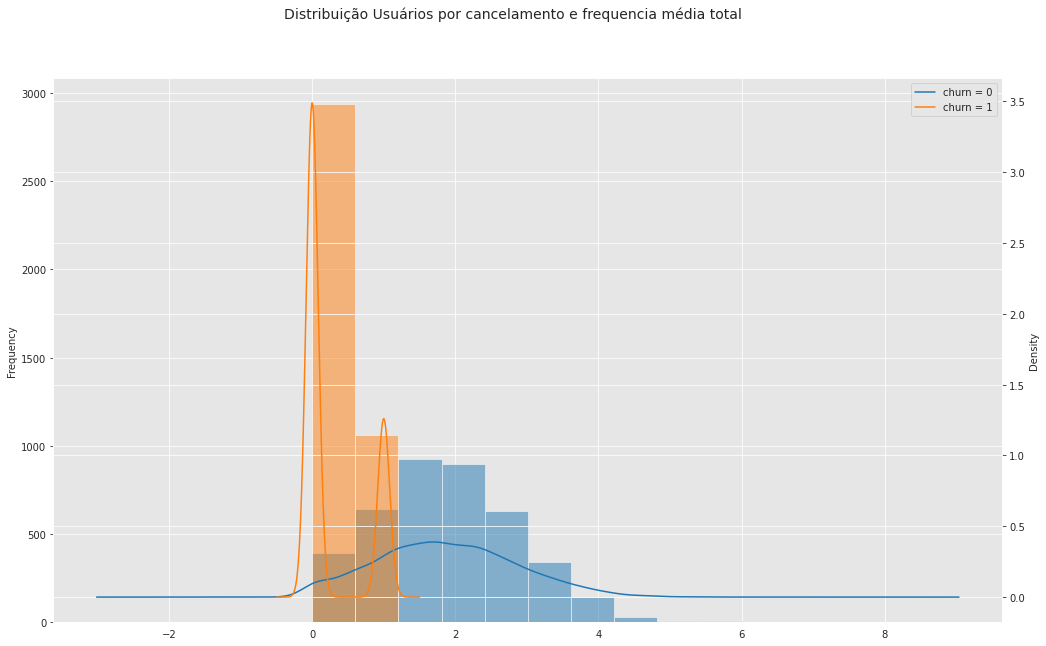

In [160]:
#Plotando as informações 'avg_class_freq_current_month' e 'churn'

gym_avg_tot = gym_gender_avg_fr_total.copy(deep=True)
gym_avg_tot = gym_avg_tot.filter(['avg_class_freq_total','churn'])

fig, ax = plt.subplots(figsize=(17,10))
gym_avg_tot.plot.hist(ax=ax, alpha=0.5,legend=False)
ax2 = ax.twinx()
gym_avg_tot.plot.kde(ax=ax2, legend=False)
plt.legend(["churn = 0", "churn = 1"], loc ="upper right")
plt.suptitle('Distribuição Usuários por cancelamento e frequencia média total', fontsize=14)
plt.show()

Acima verifica-se os dados plotados entre as informações 'avg_class_freq_total' e 'churn' onde nota-se  distribuição entre cancelamentos e frequencia média semanal dos usuários. Percebe-se que os cancelaments se concentram praticamente nos usuários com frequencia entre 1x e 1,5x por semana.

#### Separando por Gênero Masculino e Frequencia Média Semanal do Período Total

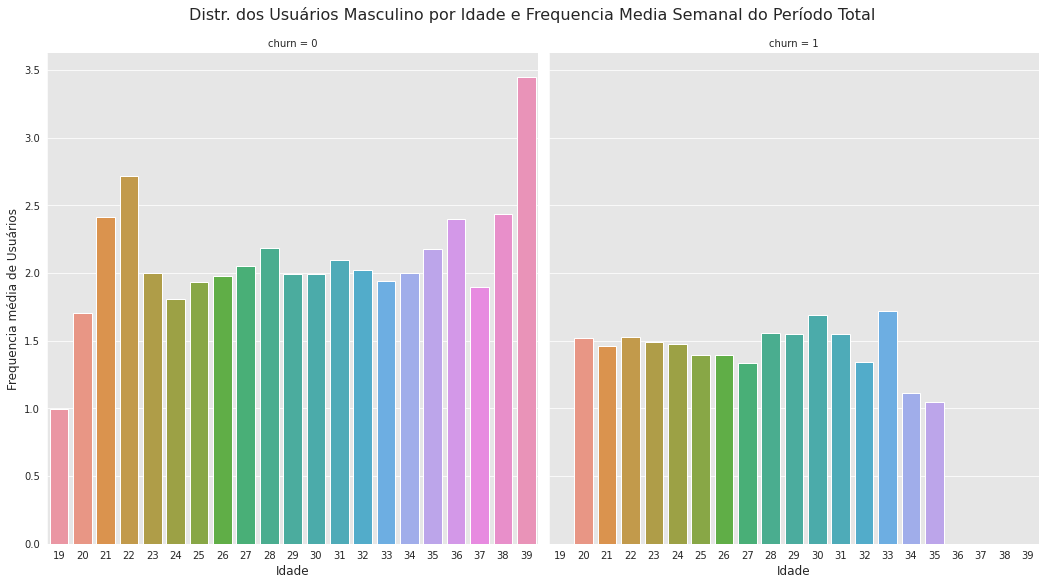

In [161]:

gym_gender_m_avg_fr_total = gym_gender_avg_fr_total[gym_gender_avg_fr_total['gender_m'] == 1].groupby(['age','churn'])['avg_class_freq_total'].mean().reset_index()

a = sns.catplot(data=gym_gender_m_avg_fr_total, x="age", y="avg_class_freq_total", col="churn",kind="bar", height=8, aspect=.9)
a.set_ylabels('Frequencia média de Usuários', fontsize=12)
a.set_xlabels('Idade', fontsize=12)
a.fig.subplots_adjust(top=0.9)
a.fig.suptitle('Distr. dos Usuários Masculino por Idade e Frequencia Media Semanal do Período Total', fontsize=16)
plt.show()

Acima tem-se  gráfico plotado da frequencia semanal total dos usuários masculino. Nota-se uma maior frequencia nos extremos do gráfico (22 anos e 39 anos) e apartir dos 26 anos há um certo equilibrio nas freuencia média semanal total. Já nos usuários que cancelaram, a frequencia média semanal é em torno de 1,5x/semana.  

#### Separando por Gênero Feminino e Frequencia Média Semanal do Período Total

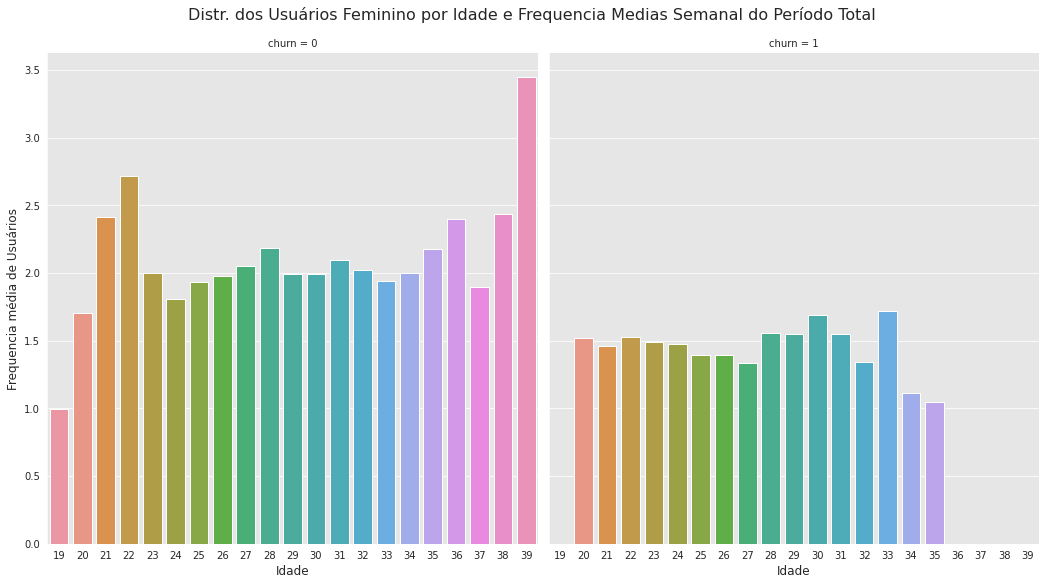

In [162]:

gym_gender_f_avg_fr_total = gym_gender_avg_fr_total[gym_gender_avg_fr_total['gender_f'] == 1].groupby(['age','churn'])['avg_class_freq_total'].mean().reset_index()

a = sns.catplot(data=gym_gender_m_avg_fr_total, x="age", y="avg_class_freq_total", col="churn",kind="bar", height=8, aspect=.9)
a.set_ylabels('Frequencia média de Usuários', fontsize=12)
a.set_xlabels('Idade', fontsize=12)
a.fig.subplots_adjust(top=0.9)
a.fig.suptitle('Distr. dos Usuários Feminino por Idade e Frequencia Medias Semanal do Período Total', fontsize=16)
plt.show()

Acima tem-se  gráfico plotado da frequencia semanal total dos usuários feminino. Nota-se uma maior frequencia também nos extremos do gráfico (22 anos e 39 anos) e apartir dos 26 anos há um certo equilibrio nas freuencia média semanal total. Já nos usuários que cancelaram, a frequencia média semanal é em torno de 1,5x/semana, sendo um comportamento bem semelhando aos usuários masculino.  

### O gráfico de Correlação

Até o momento foi realizado uma análise com o intuito de verificar quais as características que possuem os usuários que cancelaram seus contratos. Mesmo com todas as informações acima, ainda não é possível saber quais características mais influenciam no cancelamento. Para isso, será plotado o gráfico de Correlação abaixo 

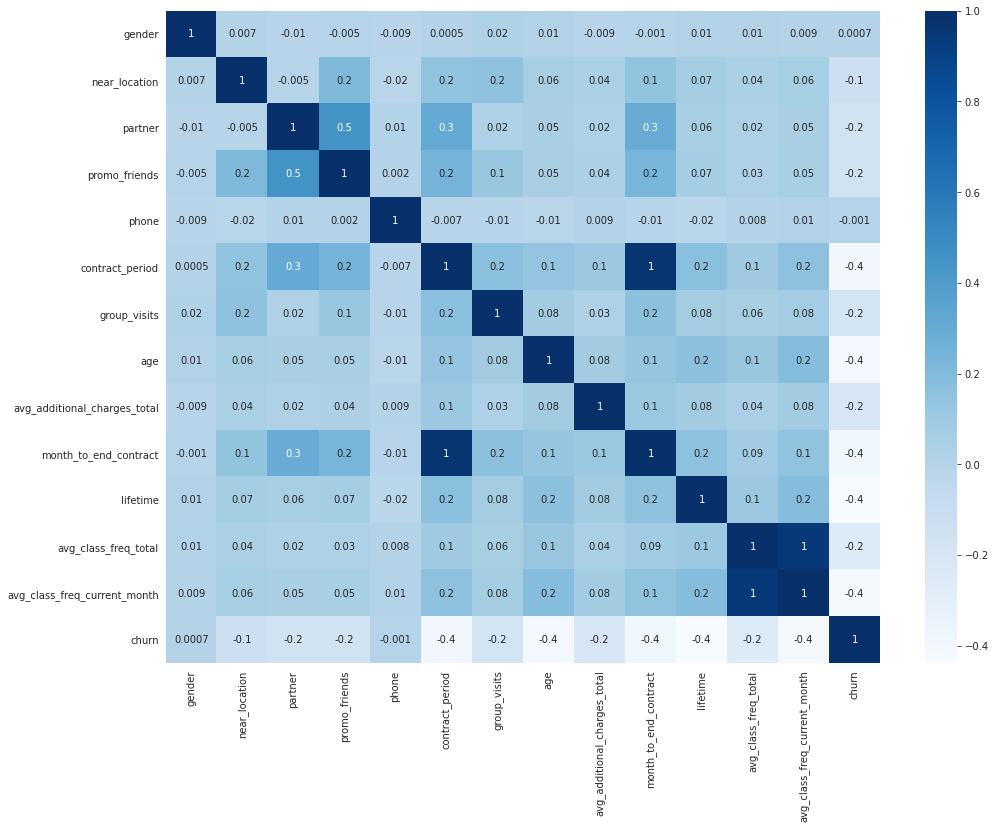

In [163]:
#Plotando o gráfico de correlação
gym_corr = gym
corr = gym_corr.corr()
plt.figure(figsize=(16,12))
sns.heatmap(corr, cmap="Blues",annot=True,fmt='.1g')
plt.show()

Acima tem-se o gráfico de Correlação de todas as variáveis do conjunto de dados. Na variável de interesse (Churn) nota-se a correlação da mesma com as demais varáveis, onde a maioria dos valores são negativos, indicando uma correlação de grandezas inversamente proporcionais. As variáveis com os maiores valores  negativos são: contract_period (período do contrato), age (idade), month_end_contract (meses para término do contrato), lifetime (tempo desde a primeira aula) e avg_freq_curr_month (freq. média no mês vigente), todas essas com valores *-0.4*. Isso indica que quant menor o valor dessas variáveis (quanto menor o tempo de cntrato ou quanto menor os meses para o término do contrato, por exemplo), maior as chances dos usuários cancelarem o plano.  

### Conclusão Prévia

Baseado em todos os tópios abordados acima, onde foram geradas tabelas e gráficos com as informações dos usuários agrupadas, pode-se traçar um perfil prévio típico de um usuário que possivelmente irá cancelar o plano:

 - **SEXO MASCULINO**
     - Idade: 27 a 29 anos
     - Não reside próximo à academia
     - Não participa de nenhuma Companhia Parceira
     - Não participa da Promoção do Amigo
     - Não fornece o Contato Telefônico
     - Não participa de Aulas em Grupo
     - Vigência de Contrato de até 1 mês
     - Até 3 meses para término do Contrato
     - Até 5 meses de Tempo de Utilização do Serviço
     - Gasta, em média 100,00 mensais em serviços diversos (valor menor que a média dos demais usuários
     - Frequentou em média 1x/semana no último mês (frequencia menor que a média dos demais usuários)
     - Frequentou em média 1,5x/semana em todo o período (frequecia menor que a média dos demais usuários) 
     
     
 - **SEXO FEMININO** 
     - Idade: 25 a 27 anos
     - Não reside próximo à academia
     - Não participa de nenhuma Companhia Parceira
     - Não participa da Promoção do Amigo
     - Não fornece o Contato Telefônico
     - Não participa de Aulas em Grupo
     - Vigência de Contrato de até 1 mês
     - Até 3 meses para término do Contrato
     - Até 5 meses de Tempo de Utilização do Serviço
     - Gasta, em média um pouco mais de 100,00 mensais em serviços diversos (valor menor que a média dos demais usuários
     - Frequentou em média 1,3x/semana no último mês (frequencia menor que a média dos demais usuários)
     - Frequentou em média  abaixo de 1,5x/semana em todo o período (frequecia menor que a média dos demais usuários)

## Prevendo a Rotatividade dos Clientes

In [164]:
#Reordenando o dataframe
gym[['gender','near_location', 'partner', 'lifetime','avg_class_freq_total','avg_class_freq_current_month','churn']]
gym

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_freq_total,avg_class_freq_current_month,churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,1,1,1,0,1,12,0,33,2.406023,12.0,8,2.284497,2.349070,0
3996,0,1,0,0,1,1,1,29,68.883764,1.0,1,1.277168,0.292859,1
3997,1,1,1,1,1,12,0,28,78.250542,11.0,2,2.786146,2.831439,0
3998,0,1,1,1,1,6,0,32,61.912657,5.0,3,1.630108,1.596237,0


### Aplicando o algoritmo Logistic Regression

Os algoritmos de Regressão Logística são aplicados quando há alguma relação entre os dados a serem analisados. A classificação tenta prever quala classe ou categoria  pertence, com base em suas características.   

In [165]:
# Separando os dados em características (a matriz X) e a variável objetivo (y)
X = gym.drop('churn', axis = 1)
y = gym['churn']

In [166]:
# Dividindo os dados em conjuntos de treino e de teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

Como visto acima no conjunto de dados, algumas colunas estão com as unidades de grandeza na casa das dezenas e centenas. Diante disso, será aplicado o método StandardScaler() que redimensiona para escalas compatíveis, de maneira que tenha todas as colunas apresentem média = 0 e desvio-padrão = 1

In [167]:
# Média e o desvio padrão da característica 'avg_additional_charges_total'
print('Média para treino', np.mean(X_train['avg_additional_charges_total']))
print('Padrão para treino', np.std(X_train['avg_additional_charges_total']))

Média para treino 147.21034941954434
Padrão para treino 97.22286386402241


In [168]:
# Padronizando os dados usando o método StandardScaler()

scaler = StandardScaler()
scaler.fit(X_train)
X_train_st = scaler.transform(X_train)
X_test_st = scaler.transform(X_test)

In [169]:
print('Média para treino padronizado', np.mean(X_train_st[:,0]))
print('Padrão para treino padronizado', np.std(X_train_st[:,0]))
print('Média para teste padronizado', np.mean(X_test_st[:,0]))
print('Padrão para teste padronizado', np.std(X_test_st[:,0]))

Média para treino padronizado 9.658940314238862e-17
Padrão para treino padronizado 0.9999999999999998
Média para teste padronizado 0.027503094272168318
Padrão para teste padronizado 0.9992088841371862


Como visto acima, o StandardScaler padronizou os valores das colunas, de forma que a média fique próximos a 0 e desvio-padrão = 1

In [170]:
# Definindo o algoritmo a ser aplicado
logistic_regr_model = LogisticRegression(max_iter=1000, random_state = 0)

In [171]:
# Treinando o Modelo
logistic_regr_model.fit(X_train_st, y_train)

LogisticRegression(max_iter=1000, random_state=0)

In [172]:
# Fazendo previsões com o modelo treinado
logistic_regr_probabilities = logistic_regr_model.predict_proba(X_test_st)[:,1]

In [173]:
# previsão binária
logistic_regr_predictions = logistic_regr_model.predict(X_test_st)

In [174]:
score = (recall_score(y_test, logistic_regr_predictions))

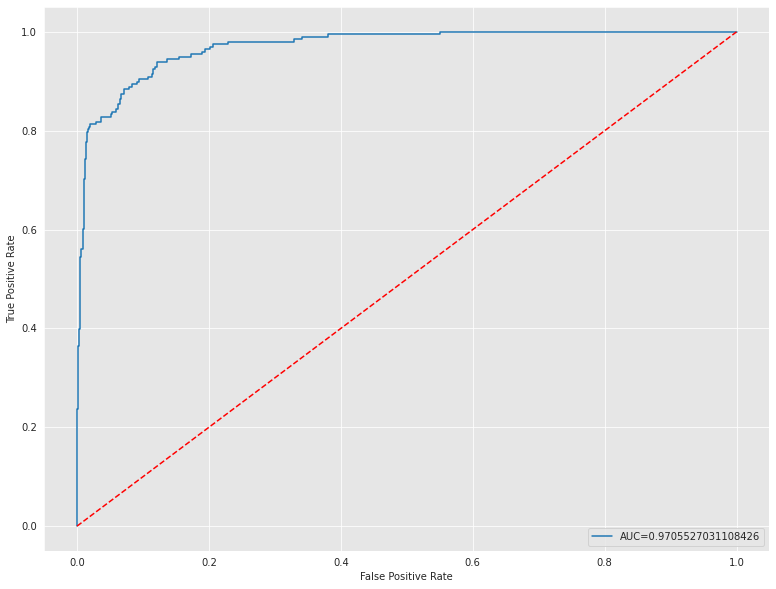

In [175]:
fpr, tpr, _ = metrics.roc_curve(y_test,  logistic_regr_probabilities)
auc = metrics.roc_auc_score(y_test, logistic_regr_probabilities)

#create ROC curve
plt.figure(figsize=(13,10))
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.plot([0, 1], [0, 1],'r--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

A curva ROC (Receiver Operating Characteristic) é um gráfico da taxa de Verdadeiros Positivos (True Positives Rates- TPR) contra a taxa de Falsos Positivos (False Positives Rates - FPR). Mostra a relação entre sensibilidade e especificidade no conjunto de dados, determinando, assim, o valor limite correto a ser aplicado. Essa seleção do limite a ser escolhido é baseada na compensação  entre TPR e FPR, considerando a natureza e aplicação do problema.A linha pontilhada em vermelho corresponde a um modelo que fez classificações aleatórias. Quanto mais longe a curva estiver dessa referência, melhor classificação o modelo está fazendo. No gráfico acima, dada a aplicação e natureza do problema, o valor de ROC_AUC = 0.97, considerado excelente. 

In [176]:
# Imprimindo todas as métricas
print('Métricas para a previsão automática feita com a previsão')
print('Acurácia: {:.2f}'.format(score))
print('Precisão: {:.2f}'.format(precision_score(y_test, logistic_regr_predictions)))
print('Sensibilidade: {:.2f}'.format(recall_score(y_test, logistic_regr_predictions)))
print('F1: {:.2f}\n'.format(f1_score(y_test, logistic_regr_predictions)))

Métricas para a previsão automática feita com a previsão
Acurácia: 0.83
Precisão: 0.85
Sensibilidade: 0.83
F1: 0.84



In [177]:
#Plotando a tabela com valores dos coeficientes
target_names = ['Clientes Ativos (Churn=0)', 'Clientes Cancelados (Churn=1)']
print(classification_report(y_test, logistic_regr_predictions, target_names=target_names))

                               precision    recall  f1-score   support

    Clientes Ativos (Churn=0)       0.94      0.95      0.95       602
Clientes Cancelados (Churn=1)       0.85      0.83      0.84       198

                     accuracy                           0.92       800
                    macro avg       0.90      0.89      0.89       800
                 weighted avg       0.92      0.92      0.92       800



Acima tem-se as tabelas com as métricas do desempenho do modelo, onde as mesmas podem ser usadas para avaliar o quão bem o modelo está fazendo previsões. 

- Acurácia (accuracy): mede a porcentagem de previsões corretas feitas pel modelo sobre o número total de instâncias ((TP + TN) / (Total Amostras))
- Precisão (precision): mede a proporção de previsões positivas verdadeiras (TP) de todas as previsões positivas feitas pelo modelo, indicando quantas das previsões positivas estavam corretas. É uma métria valiosa quando o custo dos falsos positivos (FP) é alto.  (TP / (TP + FP))
- Sensibilidade (recall): mede a proprção de previsões positivas verdadeiras de todas as instâncias positivas reais no conjunto de dados, indicando quão bem o modelo identifica instâncias positivas. O recall é essencial quando o custo dos falsos negativos (FN) é alto. (TP / (TP + FN))
- Escore-f1 (f1-score): média harmônica entre precisão e sensibilidade, proporcionando um equilíbrio entre as métricas. (2*(precisão * recall)/(precisão + recall))

Avaliando as métricas de desempenho no contexto do projeto (previsão de 'churn'), algumas observações:

- acurácia: na previsão de cancelamento do cliente, essa métrica fornece uma visão geral da correlação do classificador em prever se o cliente irá cancelar ou não;
- precisão: é importante para evitar falso positivo e esforço de retenção desnecessários em grupos de clientes onde o cancelamento não é previsto;
- sensibilidade: essencial para garantir que a maioria dos clientes que irão cancelar sejam corretamente identificados;
- escore-f1: verifica o equilíbrio do desempenho entre os clientes que irão cancelar e os que não irão.

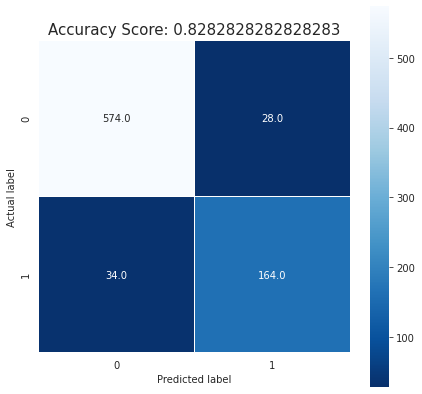

In [178]:
#Plotando a Matrix de Confusão
cm = metrics.confusion_matrix(y_test, logistic_regr_predictions)

plt.figure(figsize=(7,7))
sns.heatmap(cm, annot=True, fmt=".1f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);

Acima plotado tem-se a matriz de confusão, que resume o desempenho do modelo de classificação comparando os valores das instâncias previstos om os valores reais:
- **TRUE NEGATIVE (TN)**: instâncias que foram corretamente previstas como negativas pelo modelo (canto superior esquerdo - 574)
- **FALSE POSITIVE (FP)**: instâncias que foram incorretamente previstas como positivas pelo modelo, ou seja, quando são, de fato, negativas (canto superior direito - 28)
- **FALSE NEGATIVE (FN)**: instâncias que foram incorretamente previstas como negativas pelo modelo, ou seja, quando são, de fato, positivas (canto inferior esquerdo - 34)
- **TRUE POSITIVE (TP)**: instâncias que foram corretamente previstas como positivas pelo modelo (canto inferior direito - 164)

#### Alterando o Threshold

No modelo do sklearn o valor padrão do limiar (threshold) é 0.5, ou seja, se o score for maior que esse limiar, preve-se 1, caso contrário, 0. Uma maneira de verificar se o valor do limiar é o valor correto para o modelo, é alterando esse valor e vrificando o desempenho do modelo e seus resultados. Será alterado o valor para 0.4 e verificado o desempenho do modelo.

##### Limiar abaixo do padrão

In [179]:
# Alterando o limiar
threshold = 0.4

In [180]:
# calculando a previsão
custom_predictions = [0 if i<threshold else 1 for i in logistic_regr_probabilities]

In [181]:
# Imprimindo todas as métricas para a previsão com um novo threshold
print('Métricas para a previsão com limiar personalizado')
print('Acurácia para personalizado: {:.2f}'.format(accuracy_score(y_test, custom_predictions)))
print('Precisão para personalizado: {:.2f}'.format(precision_score(y_test, custom_predictions)))
print('Sensibilidade para personalizado: {:.2f}'.format(recall_score(y_test, custom_predictions)))
print('F1 para personalizado: {:.2f}'.format(f1_score(y_test, custom_predictions)))

Métricas para a previsão com limiar personalizado
Acurácia para personalizado: 0.92
Precisão para personalizado: 0.82
Sensibilidade para personalizado: 0.85
F1 para personalizado: 0.83


In [182]:

target_names = ['Clientes Ativos (Churn=0)', 'Clientes Cancelados (Churn=1)']
print(classification_report(y_test, custom_predictions, target_names=target_names))

                               precision    recall  f1-score   support

    Clientes Ativos (Churn=0)       0.95      0.94      0.94       602
Clientes Cancelados (Churn=1)       0.82      0.85      0.83       198

                     accuracy                           0.92       800
                    macro avg       0.88      0.89      0.89       800
                 weighted avg       0.92      0.92      0.92       800



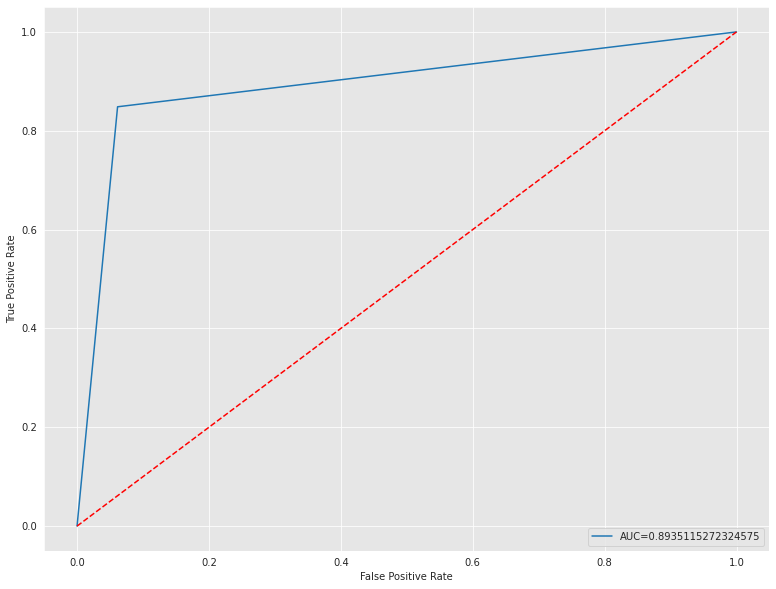

In [183]:
fpr, tpr, _ = metrics.roc_curve(y_test,  custom_predictions)
auc = metrics.roc_auc_score(y_test, custom_predictions)

#create ROC curve
plt.figure(figsize=(13,10))
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.plot([0, 1], [0, 1],'r--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

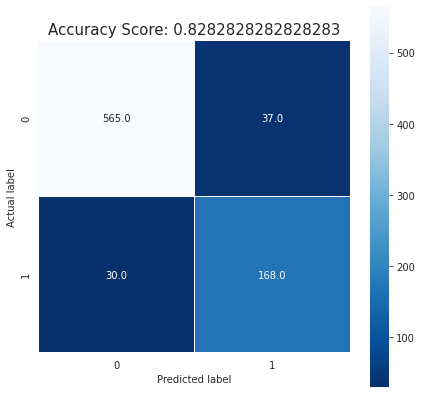

In [184]:
plt.figure(figsize=(7,7))
cm_custom = metrics.confusion_matrix(y_test, custom_predictions)

sns.heatmap(cm_custom, annot=True, fmt=".1f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);

Acima tem-se o desempenho do modelo com limiar (threshold) abaixo do valor padrão. Nota-se que houve uma pequena alteração dos valores:

                     limiar 0.5  - limiar 0.4
     precisão            0.85       0.82      - 3.58%
     sensibilidade       0.83       0.85      - 2.41%
     escore              0.84       0.83      - 1.20%

Como visto, houve um aumento de 2,4% na sensibilidade do modelo, porém houve uma piora no demais valores. Nouve uma piora também nos valores ROC

##### Limiar acima do padrão

In [185]:
# Alterando o limiar
threshold = 0.6

In [186]:
# calculando a previsão
custom_predictions = [0 if i<threshold else 1 for i in logistic_regr_probabilities]

In [187]:
# Imprimindo todas as métricas para a previsão com um novo threshold
print('Métricas para a previsão com limiar personalizado')
print('Acurácia para personalizado: {:.2f}'.format(accuracy_score(y_test, custom_predictions)))
print('Precisão para personalizado: {:.2f}'.format(precision_score(y_test, custom_predictions)))
print('Sensibilidade para personalizado: {:.2f}'.format(recall_score(y_test, custom_predictions)))
print('F1 para personalizado: {:.2f}'.format(f1_score(y_test, custom_predictions)))

Métricas para a previsão com limiar personalizado
Acurácia para personalizado: 0.93
Precisão para personalizado: 0.91
Sensibilidade para personalizado: 0.81
F1 para personalizado: 0.86


In [188]:

target_names = ['Clientes Ativos (Churn=0)', 'Clientes Cancelados (Churn=1)']
print(classification_report(y_test, custom_predictions, target_names=target_names))

                               precision    recall  f1-score   support

    Clientes Ativos (Churn=0)       0.94      0.97      0.96       602
Clientes Cancelados (Churn=1)       0.91      0.81      0.86       198

                     accuracy                           0.93       800
                    macro avg       0.93      0.89      0.91       800
                 weighted avg       0.93      0.93      0.93       800



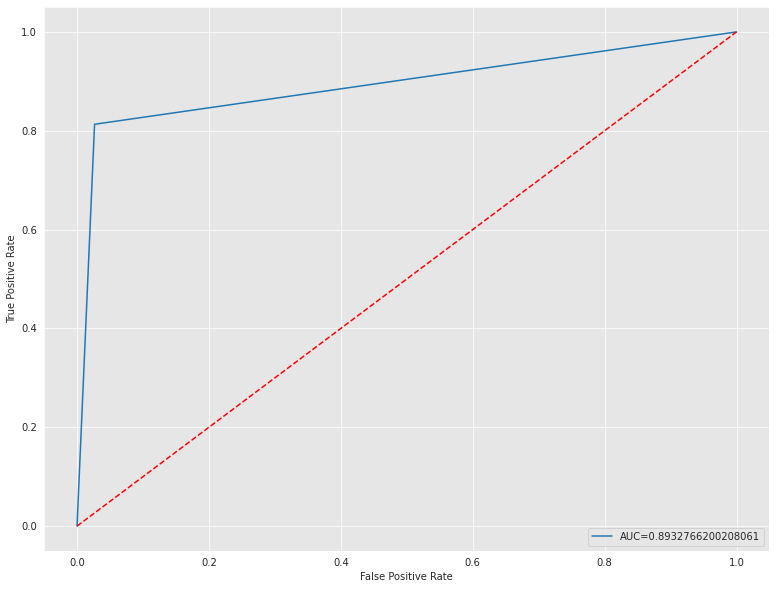

In [189]:
fpr, tpr, _ = metrics.roc_curve(y_test,  custom_predictions)
auc = metrics.roc_auc_score(y_test, custom_predictions)

#create ROC curve
plt.figure(figsize=(13,10))
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.plot([0, 1], [0, 1],'r--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

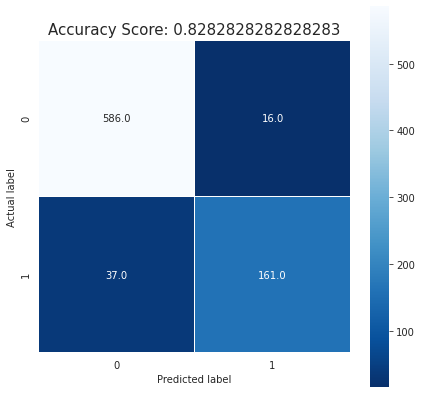

In [190]:
plt.figure(figsize=(7,7))
cm_custom = metrics.confusion_matrix(y_test, custom_predictions)

sns.heatmap(cm_custom, annot=True, fmt=".1f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);

Acima tem-se o desempenho do modelo com limiar (threshold) acima do valor padrão. Nota-se que houve uma pequena alteração dos valores:

                   limiar 0.5  - limiar 0.4
    precisão            0.85       0.91    - 7.1%
    sensibilidade       0.83       0.81    - 2.41%
    escore              0.84       0.86    - 2.38%

Como visto, houve um aumento de 7,1% na precisão do modelo, porém houve uma piora no demais valores. Houve uma piora também nos valores ROC. Aqui vale a pena verificar o contexto no negócio, pois uma melhora na precisão significa evitar falso positivo e esforço de retenção desnecessários em grupos de clientes onde o cancelamento não é previsto. Já sensibilidade (essencial para garantir que a maioria dos clientes que irão cancelar sejam corretamente identificados) e escore-f1(verifica o equilíbrio do desempenh entre os clientes que irão cancelar e os que não irão) apresentaram uma piora no desempenho. 

In [191]:
gym

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_freq_total,avg_class_freq_current_month,churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,1,1,1,0,1,12,0,33,2.406023,12.0,8,2.284497,2.349070,0
3996,0,1,0,0,1,1,1,29,68.883764,1.0,1,1.277168,0.292859,1
3997,1,1,1,1,1,12,0,28,78.250542,11.0,2,2.786146,2.831439,0
3998,0,1,1,1,1,6,0,32,61.912657,5.0,3,1.630108,1.596237,0


In [192]:
categoric_cols = gym[['gender','near_location','partner','promo_friends','phone','group_visits']]
numeric_cols = gym[['contract_period','age','avg_additional_charges_total','month_to_end_contract','lifetime','avg_class_freq_total','avg_class_freq_current_month']] 

#### Os Coeficientes

Com o intuito de verificar melhor desempenho e resultados do modelo, será feita uma análise dos coeficientes das variáveis afim de entender melhor a relação entre ambas e o objetivo do projeto, que é verificar os fatores que influenciam no cancelamento dos usuários. 

In [193]:
# Montando um dataframe e imprimindo as variáveis e coeficientes
coefficients = np.hstack((logistic_regr_model.intercept_, logistic_regr_model.coef_[0]))
print('intercept ', logistic_regr_model.intercept_[0])
cat_coeff = pd.DataFrame(data={'variable': gym.columns , 'coefficient': coefficients})
cat_coeff

intercept  -3.708476068746572


,variable,coefficient
0,gender,-3.708476
1,near_location,-0.013079
2,partner,-0.075644
3,promo_friends,-0.081512
4,phone,-0.275671
5,contract_period,0.004908
6,group_visits,-0.719095
7,age,-0.393453
8,avg_additional_charges_total,-1.091431
9,month_to_end_contract,-0.552164


Como foi aplicado o método StandardScaler ao modelo, as variáveis contínuas devem ser tratadas em termos de desvio-padrão.

In [194]:
num_coeff = pd.DataFrame(data={'variable': numeric_cols.columns, 'unit': np.sqrt(scaler.var_[6:])})
num_coeff

,variable,unit
0,contract_period,0.493251
1,age,3.236378
2,avg_additional_charges_total,97.222864
3,month_to_end_contract,4.188621
4,lifetime,3.786259
5,avg_class_freq_total,0.973583
6,avg_class_freq_current_month,1.056227


Como se está trabalhando com variáveis binárias (SIM / NÃO) usa-se as funções logarítmicas para expicar os resultados em termos de **log-odds** (Razão de Chances ou Possibilidade de Chances)
$$
 ln \frac{p}{1-p}\
$$

onde p é a probabilidade de o desfecho ocorrer, a fim de determinar as chances logarítmicas correspondentes do desfecho, que então é modelado com uma combinação linear das variáveis explicativas. Assim os coeficientes do modelo podem então ser interpretados para entender a direção e a força das relações entre as variáveis explicativas e a variável resposta.

Partindo do pressuposto de que não há multicolinearidade entre as variáveis, ou seja, as variáveis são independentes entre si, será analisado as variáveis no contexto do negócio proposto:

 - para as variáveis binárias, verificando a matrix de correlação, toma-se como exemplo a variável **group_visits** (aulas em grupo). Mantendo-se todas as demais variáveis fixas e aplicando exp^(-0,719085) = 0,4871, significando que a chance de cancelamento de um usuário que frequentou aulas em grupo é 0,48x menor do que os usuários que não participaram de aulas em grupo.
 
 - para as variáveis numéricas,como foram dimensionadas pelo método StandardScaler, deve-se analisá-las em termos de desvio-padrão. Mantendo-se todas as demais variáveis fixas,  toma-se como exemplo a variável **lifetime** (tempo de utilização do serviço) temos que exp^(-0,534026) = 0,5862, significando que um aumento em uma unidade de desvio-padrão em lifetime reduz as chances de cancelamento 0,58x

### Aplicando o algoritmo Random Forest Classifier

O método RandomForest consiste em várias árvores de decisão, onde cada uma delas produz uma previsão. Quando executada uma tarefa de classificação, cada uma das árvores de decisão do método "vota" em uma das classes pertencentes à entrada. Quando todas as árvores chegam em uma conclusão, o método contará qual classe teve o voto mais populoso e essa classe será o que o método produzirá como previsão.

In [195]:
# define o algoritmo para o novo modelo de floresta aleatória
random_forest_model = RandomForestClassifier(n_estimators = 400, random_state = 0)

In [196]:
# treine o modelo de floresta aleatória
random_forest_model.fit(X_train_st, y_train)

RandomForestClassifier(n_estimators=400, random_state=0)

In [197]:
# use o modelo treinado para fazer previsões
random_forest_predictions = random_forest_model.predict(X_test_st)
random_forest_probabilities = random_forest_model.predict_proba(X_test_st)[:,1]

In [198]:
score = (recall_score(y_test, random_forest_predictions))

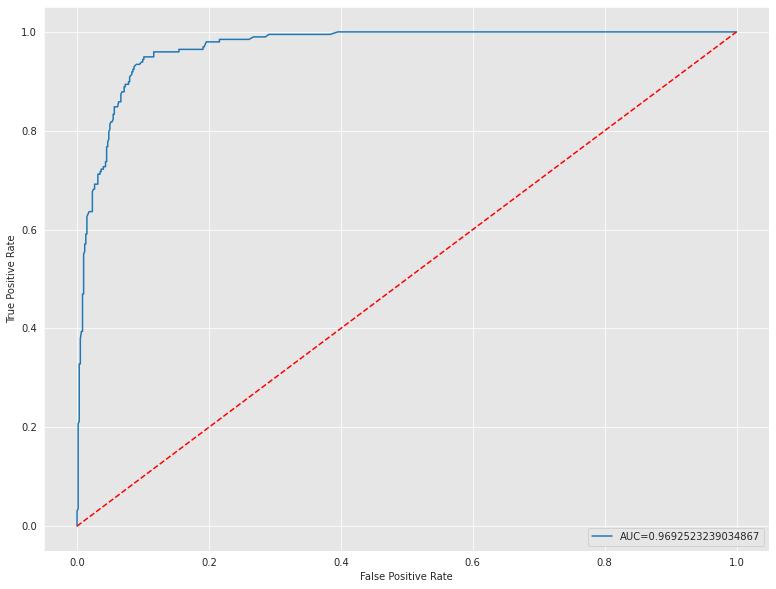

In [199]:
fpr, tpr, _ = metrics.roc_curve(y_test,  random_forest_probabilities)
auc = metrics.roc_auc_score(y_test, random_forest_probabilities)

#create ROC curve
plt.figure(figsize=(13,10))
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.plot([0, 1], [0, 1],'r--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)

plt.show()

A curva ROC (Receiver Operating Characteristic) é um gráfico da taxa de Verdadeiros Positivos (True Positives Rates- TPR) contra a taxa de Falsos Positivos (False Positives Rates - FPR). Mostra a relação entre sensibilidade e especificidade no conjunto de dados, determinando, assim, o valor limite correto a ser aplicado. Essa seleção do limite a ser escolhido é baseada na compensação  entre TPR e FPR, considerando a natureza e aplicação do problema.A linha pontilhada em vermelho corresponde a um modelo que fez classificações aleatórias. Quanto mais longe a curva estiver dessa referência, melhor classificação o modelo está fazendo. No gráfico acima, dada a aplicação e natureza do problema, o valor de ROC_AUC = 0.9679, considerado excelente. 

In [200]:
# Imprimindo todas as métricas
print('Métricas para a previsão automática feita com a previsão')
print('Acurácia: {:.2f}'.format(score))
print('Precisão: {:.2f}'.format(precision_score(y_test, random_forest_predictions)))
print('Sensibilidade: {:.2f}'.format(recall_score(y_test, random_forest_predictions)))
print('F1: {:.2f}\n'.format(f1_score(y_test, random_forest_predictions)))

Métricas para a previsão automática feita com a previsão
Acurácia: 0.82
Precisão: 0.84
Sensibilidade: 0.82
F1: 0.83



In [201]:
#Plotando a tabela com valores dos coeficientes
target_names = ['Clientes Ativos (Churn=0)', 'Clientes Cancelados (Churn=1)']
print(classification_report(y_test, random_forest_predictions, target_names=target_names))

                               precision    recall  f1-score   support

    Clientes Ativos (Churn=0)       0.94      0.95      0.94       602
Clientes Cancelados (Churn=1)       0.84      0.82      0.83       198

                     accuracy                           0.92       800
                    macro avg       0.89      0.88      0.89       800
                 weighted avg       0.92      0.92      0.92       800



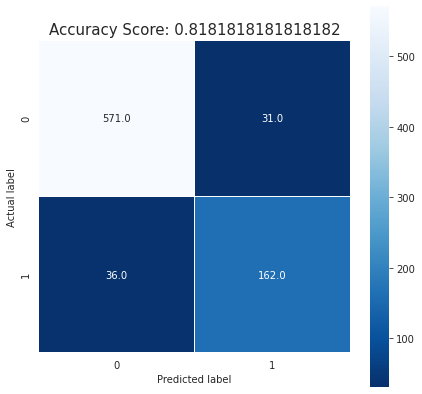

In [202]:
#Plotando a Matrix de Confusão
cm = metrics.confusion_matrix(y_test, random_forest_predictions)

plt.figure(figsize=(7,7))
sns.heatmap(cm, annot=True, fmt=".1f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);

Acima tem-se o a tabela com o desempenho do modelo bem como a matrix de confusão. Comparando os valores com  o método LogisticRegression com threshold = 0.5(padrão) percebe-se:

                   Log.Regression  - R.Forester
    precisão            0.85           0.84    - 1.20%
    sensibilidade       0.83           0.82    - 1.20%
    escore              0.84           0.83    - 1.20%

Como visto, houve uma piora em 1% comparando o desempenho dos dois modelos. Houve uma piora também nos valores ROC (0,13%). Vale ressaltar que o algoritmo RandomForest foi aplicado em seu modo 'padrão', sendo interessante em outro momento, explorar as demais funcionalidades e ajustes do algoritmo afim de se ajustar ao modelo de negócio proposto.

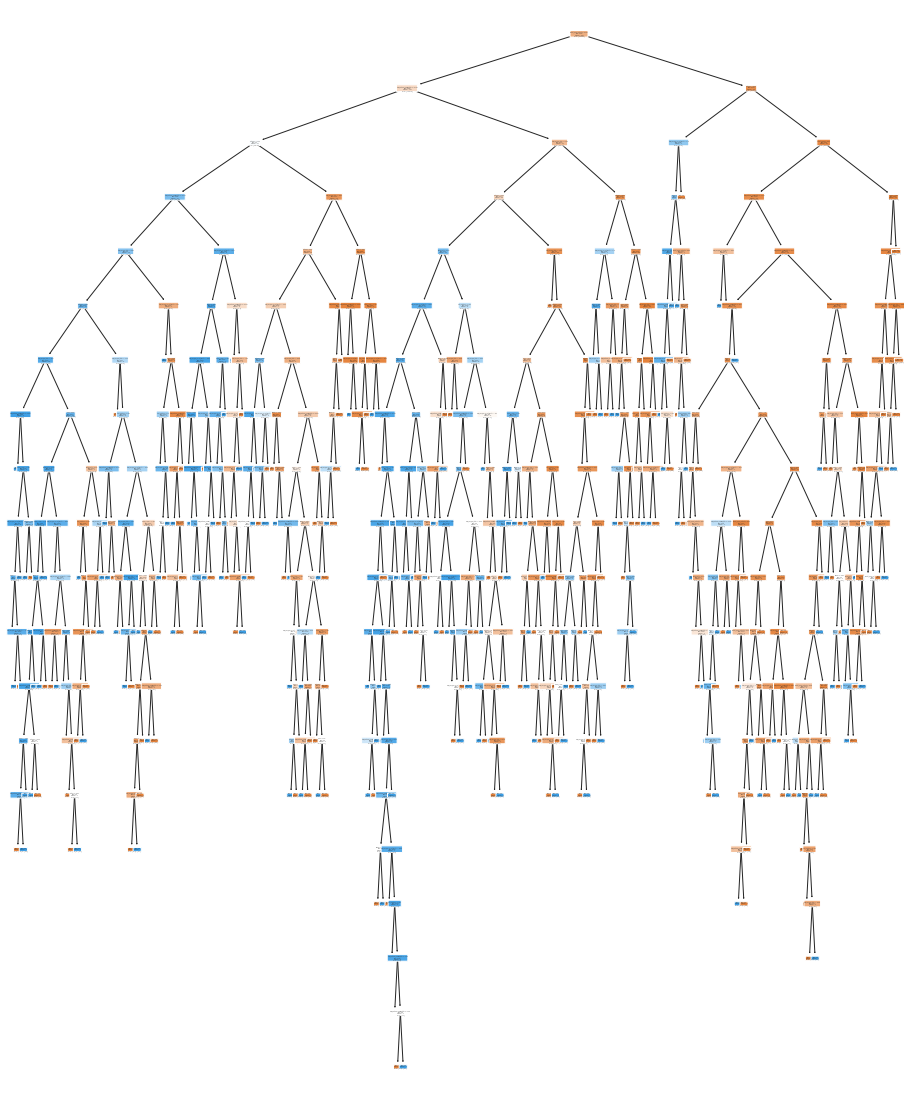

In [203]:
#Plotando a aróre aleatória do conjunto de dados
features = X.columns.values
fig = plt.figure(figsize=(16, 20))
tree.plot_tree(random_forest_model.estimators_[0], feature_names=features, filled=True, impurity=True, rounded=True)
plt.show()

Acima tem-se uma visão geral do ordenamento das variáveis do algoritmo RandomForest.

In [204]:
#Ordenando as variáveis de aordo com o algoritmo
pd.DataFrame(random_forest_model.feature_importances_, index=X_train.columns).sort_values(by=0, ascending=False)

,0
lifetime,0.283791
avg_class_freq_current_month,0.180126
avg_class_freq_total,0.127533
age,0.116873
avg_additional_charges_total,0.090599
month_to_end_contract,0.073012
contract_period,0.061276
group_visits,0.015689
partner,0.011990
gender,0.011850


Acima uma tabela gerada das variáveis em ordem de importência pelo algoritmo, ou seja, de todas as variáveis quais as que os algoritmo mais leva em consideração no momento da previsão ou quais variáveis são mais acessadas por cada árvore individualmente. Aqui vale a pena um maior aprofundamento sobre essa hierarquia que é gerada pelo modelo e a variável-alvo, ou seja, se esse ordenamento tem relação com uma maior prbabilidade de 'churn' pelo usuário ou não. 

## Agrupamento de Clientes

In [205]:
# padronize os dados
gym_cluster = gym
x = gym.values #returns a numpy array

sc_scaler = StandardScaler()
x_scaled = sc_scaler.fit_transform(x)
gym_cluster = pd.DataFrame(x_scaled)
gym_cluster.columns = ['gender', 'near_location', 'partner', 'promo_friends', 'phone',
       'contract_period', 'group_visits', 'age',
       'avg_additional_charges_total', 'month_to_end_contract', 'lifetime',
       'avg_class_freq_total', 'avg_class_freq_current_month', 'churn']
gym_cluster

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_freq_total,avg_class_freq_current_month,churn
0,0.979706,0.427881,1.026861,1.497161,-3.059852,0.289890,1.194032,-0.056554,-1.377531,0.161605,-0.193329,-1.911920,-1.678472,-0.600839
1,-1.020715,0.427881,-0.973842,-0.667931,0.326813,1.608822,1.194032,0.557327,-0.350213,1.831941,0.873680,0.045176,0.136014,-0.600839
2,-1.020715,0.427881,1.026861,-0.667931,0.326813,-0.809219,-0.837498,-0.363494,-0.181592,-0.792873,-0.460081,-0.020493,-0.029019,-0.600839
3,-1.020715,0.427881,1.026861,1.497161,0.326813,1.608822,1.194032,1.171208,-0.874722,1.831941,-0.460081,1.364655,1.510450,-0.600839
4,0.979706,0.427881,1.026861,1.497161,0.326813,-0.809219,-0.837498,-0.977375,0.533700,-0.792873,-0.193329,-0.787076,-0.614542,-0.600839
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,0.979706,0.427881,1.026861,-0.667931,0.326813,1.608822,-0.837498,1.171208,-1.500232,1.831941,1.140432,0.417105,0.552842,-0.600839
3996,-1.020715,0.427881,-0.973842,-0.667931,0.326813,-0.809219,1.194032,-0.056554,-0.810225,-0.792873,-0.726833,-0.619110,-1.400294,1.664340
3997,0.979706,0.427881,1.026861,1.497161,0.326813,1.608822,-0.837498,-0.363494,-0.713002,1.593322,-0.460081,0.933139,1.011031,-0.600839
3998,-1.020715,0.427881,1.026861,1.497161,0.326813,0.289890,-0.837498,0.864268,-0.882582,0.161605,-0.193329,-0.256049,-0.162252,-0.600839


In [206]:
#Aplicando o algiritmo K-Means
km = KMeans(n_clusters=5,random_state=0)
labels = km.fit_predict(gym_cluster)
gym_cluster['labels_cluster'] = labels
gym_cluster_km = gym_cluster.groupby(['labels_cluster']).mean().T.reset_index()
gym_cluster_km

labels_cluster,index,0,1,2,3,4
0,gender,-0.013150,-0.034849,-0.004667,0.021877,0.017294
1,near_location,-2.337100,0.251239,0.427881,0.418508,0.339466
2,partner,-0.054401,0.554726,-0.325624,-0.409237,0.515053
3,promo_friends,-0.504753,0.489419,-0.206431,-0.216564,0.471260
4,phone,0.046666,0.053054,0.000934,0.002497,-0.101442
5,contract_period,-0.574042,1.267481,-0.689000,-0.615292,0.918364
6,group_visits,-0.408039,0.211375,-0.253526,0.081855,0.249134
7,age,-0.203253,0.238781,-0.692867,0.323220,0.166960
8,avg_additional_charges_total,-0.147415,0.154757,-0.350523,0.114641,0.165696
9,month_to_end_contract,-0.566097,1.229948,-0.673418,-0.603190,0.914574


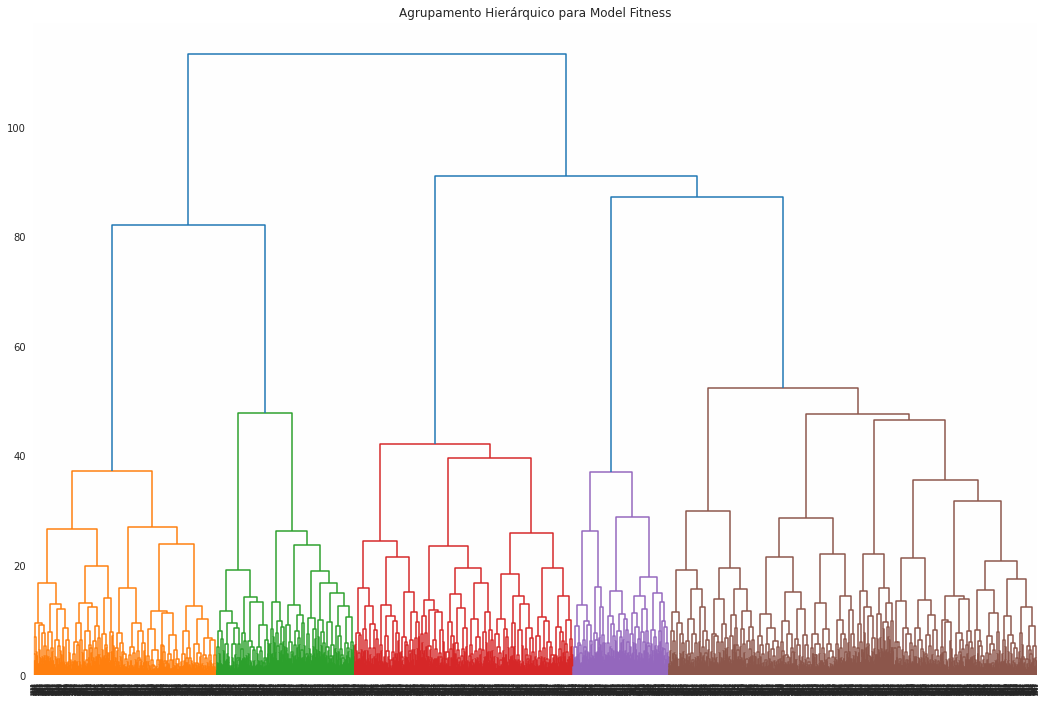

In [207]:
#Plotando o dendograma do conjunto de dados
linked = linkage(x_scaled, method = 'ward')
plt.figure(figsize=(18, 12))  
dendrogram(linked, orientation='top')
plt.title('Agrupamento Hierárquico para Model Fitness')
plt.show() 

Acima foi plotado o dendograma  do conjunto de dados agrupado pelos clusters gerados pelo algoritmo K-Means clustering. Para uma visão geral o dendograma é útil, porém uma visão mais detalhada dos clusters não é possível. Sendo assim, será plotado clusters separados para uma melhor visualização e análise dos dados.

In [208]:
gym_cluster

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_freq_total,avg_class_freq_current_month,churn,labels_cluster
0,0.979706,0.427881,1.026861,1.497161,-3.059852,0.289890,1.194032,-0.056554,-1.377531,0.161605,-0.193329,-1.911920,-1.678472,-0.600839,4
1,-1.020715,0.427881,-0.973842,-0.667931,0.326813,1.608822,1.194032,0.557327,-0.350213,1.831941,0.873680,0.045176,0.136014,-0.600839,1
2,-1.020715,0.427881,1.026861,-0.667931,0.326813,-0.809219,-0.837498,-0.363494,-0.181592,-0.792873,-0.460081,-0.020493,-0.029019,-0.600839,3
3,-1.020715,0.427881,1.026861,1.497161,0.326813,1.608822,1.194032,1.171208,-0.874722,1.831941,-0.460081,1.364655,1.510450,-0.600839,1
4,0.979706,0.427881,1.026861,1.497161,0.326813,-0.809219,-0.837498,-0.977375,0.533700,-0.792873,-0.193329,-0.787076,-0.614542,-0.600839,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,0.979706,0.427881,1.026861,-0.667931,0.326813,1.608822,-0.837498,1.171208,-1.500232,1.831941,1.140432,0.417105,0.552842,-0.600839,1
3996,-1.020715,0.427881,-0.973842,-0.667931,0.326813,-0.809219,1.194032,-0.056554,-0.810225,-0.792873,-0.726833,-0.619110,-1.400294,1.664340,2
3997,0.979706,0.427881,1.026861,1.497161,0.326813,1.608822,-0.837498,-0.363494,-0.713002,1.593322,-0.460081,0.933139,1.011031,-0.600839,1
3998,-1.020715,0.427881,1.026861,1.497161,0.326813,0.289890,-0.837498,0.864268,-0.882582,0.161605,-0.193329,-0.256049,-0.162252,-0.600839,4


/tmp/ipykernel_73/3574808545.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels = gym_cluster_km["index"], rotation = 90)


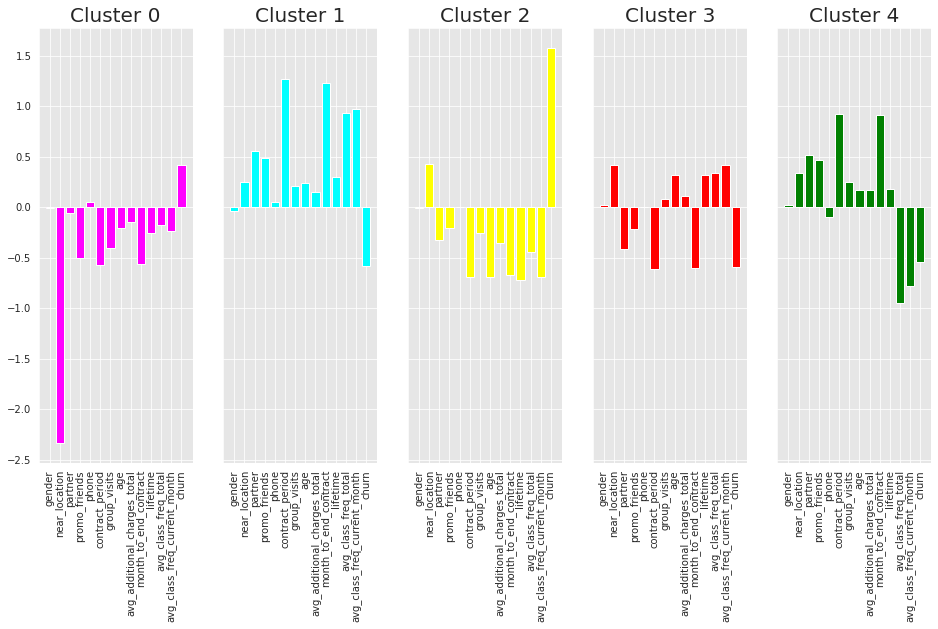

In [209]:
#Plotando os clusters separadamente
colors = ['magenta', 'cyan', 'yellow', 'red','green']

fig, ax = plt.subplots(1,5,figsize = (16,8),sharey = True, sharex = True)
axis = ax.flatten()

for i, col in enumerate(gym_cluster_km):
    if col !="index":
        ax=axis[i-1]
        ax.bar(height = gym_cluster_km[col], x=gym_cluster_km['index'], color = colors [i-1])
        ax.set_xticklabels(labels = gym_cluster_km["index"], rotation = 90)
        ax.set_title(f"Cluster {col}", fontsize = 20)       

In [210]:
gym_cluster.groupby('labels_cluster').size()

labels_cluster
0     544
1     767
2     821
3    1180
4     688
dtype: int64

Acima nota-se pelos gráficos plotados dos clusters separados a disposição das variáveis em cada cluster.

- *Cluster 0*: a variável com maior valor negativo (influência) é **'near_location'** (usuários que moram próximos à academia) se destacam das demais variáveis. Nota-se também que praticamente todas as variáveis estão negativas e somente 'churn' está positivo, indicando a possibilidade de variáveis inversamente proporcionais, ou seja qunto menor as variáveis, maior a chance de cancelamento do usuário, o que confirma o exposto no tópico 2 com a matriz de correlação;
- *Cluster 1*: aqui percebe=se o inverso do cluster 0, onde nota-se todas as variáveis positivas e a variável 'churn' (cancelamento) negativa, ou seja, quanto maior o valor essas variáveis, menor a chance de cancelamento. Aqui verifica-se  que o algoritmo atribuiu um valor maior à **'contract_period', 'month_to_end_contract', 'avg_class_freq_total' e 'avg_class_freq_month'** como as variáveis de maior influência no não cancelamento de um usuário;
- *Cluster 2*: nota-se aqui a que o algoritmo verificou o cenário de maior chance de cancelamento: todas as variáveis negativas ou seja, são usuários com o pior perfil para a academia.
- *Cluster 3* e *Cluster 4*: são usuários com perfis próximos, porém com algumas caracterísiticas diferentes, como por exemplo no cluster 3 mesmo o usuário tendo um contrato curto (**'contract_period'**) e faltando poucos meses para terminar o contrato (**'month_to_end_contract'**) as chances de cancelamento desse usuário são baixas. O mesmo se aplica ao Cluster 4, onde tem-se um usuário com perfil de baixa frequencia semanal no mês (**'avg_class_freq_month'**) e baia frequencia semanal total (**'avg_class_freq_total'**), as chances de cancelamento desses usuários são baixas.

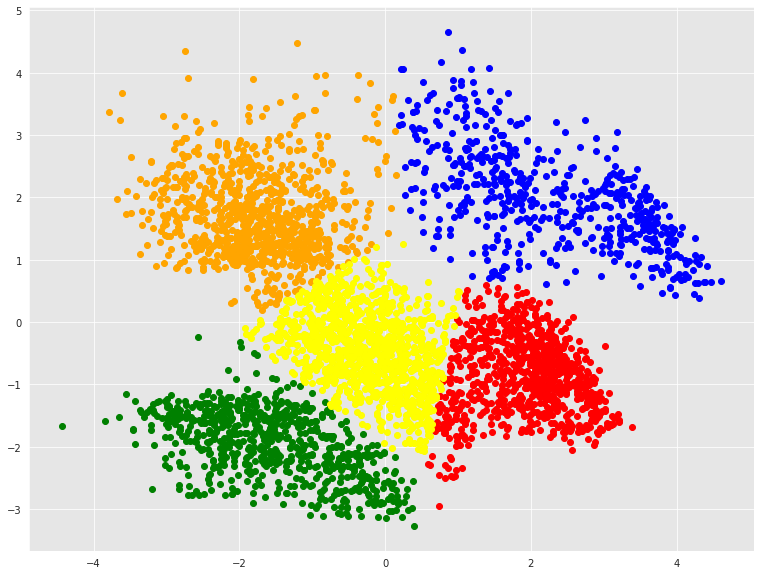

In [211]:
#Reduzindo o onjunto de dados para 2D 
pca = PCA(2)
gym_cluster_pca = pca.fit_transform(gym_cluster)

kmeans = KMeans(n_clusters= 5, random_state=0)
label = kmeans.fit_predict(gym_cluster_pca)
 

#Filtrando os clusters
filtered_label0 = gym_cluster_pca[label == 0]
filtered_label1 = gym_cluster_pca[label == 1]
filtered_label2 = gym_cluster_pca[label == 2]
filtered_label3 = gym_cluster_pca[label == 3]
filtered_label4 = gym_cluster_pca[label == 4]

 
#Plotting the results
plt.figure(figsize=(13,10))
plt.scatter(filtered_label0[:,0] , filtered_label0[:,1] , color = 'red')
plt.scatter(filtered_label1[:,0] , filtered_label1[:,1] , color = 'orange')
plt.scatter(filtered_label2[:,0] , filtered_label2[:,1] , color = 'green')
plt.scatter(filtered_label3[:,0] , filtered_label3[:,1] , color = 'yellow')
plt.scatter(filtered_label4[:,0] , filtered_label4[:,1] , color = 'blue')
plt.show()

Acima foi plotado o gráfico de agrupamento por cluster dos usuários, afim de uma compreensão visual do agrupamento dos clusters e dos usuários. Para uma melhor compreensão, o conjunto de dados foi reduzido para 2D com o método PCA.

## Conclusão

O objetivo do projeto é desenvolver uma estratégia de retenção de clientes baseado no conjunto de dados contendo o comortamento dos usuários do mês anterior.

No Capitulo 1 foi carregado a base de dados e bibliotecas que seriam utilizadas na análise.

No Capítulo 2 iniciou-se a Exploração dos Dados, onde foi verificado valores nulos/ausentes, os tipos dos dados nas colunas, renomeação e reorganização das colunas para uma melhor análise. Iniciou-se também a análise aprofundada do comportamento dos usuários e o cancelamento, onde foram verificados gênero e churn, localidade e churn, participa de companhias parceiras e churn, participa da promoção do amigo e churn, forneceu contato telefônico e churn, participa de aulas em grupo e churn, vigência do contrato e churn, meses para expirar o contrato e churn, tempo de utilização do serviço e churn, alor médio gasto com produtos diversos e churn, frequencia média semanal no mês e churn e frequencia média semanal total e churn, onde todas as variáveis foram verificados tanto os usuários do sexo masculino como feminino. Feito todo esse levantamento com o intuito de se obter uma prévia do perfil médio de um usuário que cancela o contrato. Isso posto, tem-se que:

 - *PERFIL MÉDIO DO USUÁRIO MASCULINO:* tem entre 27 e 29 anos, reside longe da academia, não faz parte de companhias parceiras, não participa da promoção do amigo, não forneceu contato telefônico, não participa de aulas em grupo, opta por contratos de curta vigência (até 1 mês),  até 3 meses para expirar o contrato, com tempo de utiliação do serviço de até 5 meses, gasta uma média de 100.00 com produtos/serviços diversos, frequentou a academia menos de 1x/semana no último mês e possui ua frequencia média total de 1,5x/semana.
 
 - *PERFIL MÉDIO DO USUÁRIO FEMININO:* tem entre 25 e 27 anos, reside longe da academia, não faz parte de companhias parceiras, não participa da promoção do amigo, não forneceu contato telefônico, não participa de aulas em grupo, opta por contratos de curta vigência (até 1 mês),  até 3 meses para expirar o contrato, com tempo de utiliação do serviço de até 5 meses, gasta uma média de 150.00 com produtos/serviços diversos, frequentou a academia menos de 1,3x/semana no último mês e possui ua frequencia média total de 1,5x/semana.
  
No capítulo 3 é apresentado a aplicação dos algoritmos supervisionados com o objetivo de prever um possível cancelamento dos  usuários, começando pelo **LogisticRegression**, onde foi verificado vários desempenhos do modelo alterando alguns parâmetros afim de se ajustar ao proposto no negócio. Durante o ajuste e verificação de vários cenários, algumas métricas melhoraram e outras pioraram. Tendo sempre como premissa o cenário do négócio, onde:

- acurácia: na previsão de cancelamento do cliente, essa métrica fornece uma visão geral da correlação do classificador em prever se o cliente irá cancelar ou não;
- precisão: é importante para evitar falso positivo e esforço de retenção desnecessários em grupos de clientes onde o cancelamento não é previsto;
- sensibilidade: essencial para garantir que a maioria dos clientes que irão cancelar sejam corretamente identificados;
- escore-f1: verifica o equilíbrio do desempenho entre os clientes que irão cancelar e os que não irão.

tem-se que os padrões default do modelo fornecem um resultado satisfatório ao proposto pelo projeto, sem prejudicar as demais métricas. Aqui cabe sempre uma análise mais aprofundada das demais métricas, afim de encontrar um modelos com um melhor ajuste e resultado. Também foi aplicado o algorítmo **RandomForestClassifier**, que aresentou um desempenho cerca de 1% pior em seus parâmetros. Aqui foi utilizado o modelo em seu modo 'default', ou seja, valendo-se também de uma análise mas aprofundada com ajustes de suas métricas, é possível chegar a valores melhores.

NO capítulo 4 foi aplicado outro algoritmo para análisar o conjunto de dados, porém sendo não supervisionado, o **K-Means**, onde,  em princípio, foi gerado um dendograma através do Cluster Hierarchy, onde tem-se uma visualização de como o algoritmo verifica cada usuário em relação às variáveis e os agrupa conforme seus respectivos comportamentos. Porém, para uma análise mais aprofundada, optou-se por plotar os clusters separadamente, de acordo com as variáveis e valores atribuídos pelo algoritmo, onde foi possível ter uma visão mais detalhada das variáveis que influenciam em um cancelamento e suas respectivas importãncias, atestando, assim, a análise prévia feita no capítulo 2 sobre o comportamento dos usuários. Foi plotado também o gráfico do tipo scatter com a visualização dos cluester.

Com isso, seguem algumas recomendações a serem adotadas para aumentar a retenção de usuários pela academia:

 - maximizar a venda de contratos com vigência acima de 6 meses, concedendo descontos ou promoções em outras aulas disponíveis;
 - incentivar uma maior frequencia semanal dos usuários, com adoção de algum tipo de prêmio ou desconto por assiduidade;
 - incentivar os usuários a fornecerem seus dados completos no momento da assinatura do contrato (assegurando-lhes o total compromisso com a LGPD);
 - promover aulas ao ar-livre (parques ou praças) para promover o engajamento através de aulas em grupo;
 - realizar promoções por faixa etária e gênero dos usuários, afim de atrair a faixa dos 18 aos 22 anos, onde a taxa de cancelamento é proporcionamente menor.